In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import collections
import utils
import seaborn as sns

In [2]:
qa_lm_df = pd.read_csv("../judgements/judgements_eli5_HQ_20250311_213806.csv")
qa_human_df = pd.read_csv("../annotation/HumanAnnotationQuestionAnswering_corrected.csv")
qa_combo_filtered_df = pd.read_csv("../judgements/judgements_eli5_combined_with_humans.csv")


In [4]:
qa_lm_df.columns

Index(['question_id', 'question', 'response_id', 'response_model', 'response',
       'judgement_id', 'judge_model', 'judgement_criteria_id', 'criteria',
       'judge_reasoning', 'judge_rating'],
      dtype='object')

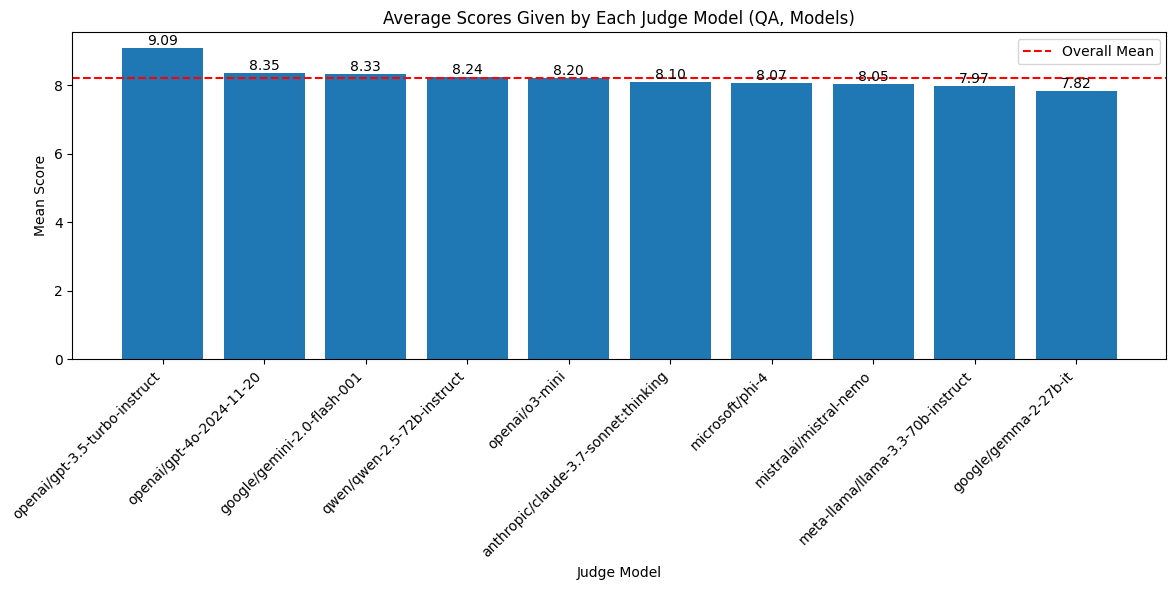


Mean scores by judge model:
judge_model
openai/gpt-3.5-turbo-instruct           9.09
openai/gpt-4o-2024-11-20                8.35
google/gemini-2.0-flash-001             8.33
qwen/qwen-2.5-72b-instruct              8.24
openai/o3-mini                          8.20
anthropic/claude-3.7-sonnet:thinking    8.10
microsoft/phi-4                         8.07
mistralai/mistral-nemo                  8.05
meta-llama/llama-3.3-70b-instruct       7.97
google/gemma-2-27b-it                   7.82
Name: judge_rating, dtype: float64


In [6]:
# Which models give high/low scores?

# First, let's consider the LM judge dataframe (GIVEN scores)

# Calculate mean scores by judge model
judge_scores = qa_lm_df.groupby('judge_model')['judge_rating'].mean().round(2)
judge_scores = judge_scores.sort_values(ascending=False)

# Create bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(judge_scores)), judge_scores)
plt.xticks(range(len(judge_scores)), judge_scores.index, rotation=45, ha='right')
plt.axhline(y=qa_lm_df['judge_rating'].mean(), color='r', linestyle='--', label='Overall Mean')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom')

plt.title('Average Scores Given by Each Judge Model (QA, Models)')
plt.ylabel('Mean Score')
plt.xlabel('Judge Model')
plt.legend()
plt.tight_layout()
plt.show()

print("\nMean scores by judge model:")
print(judge_scores)

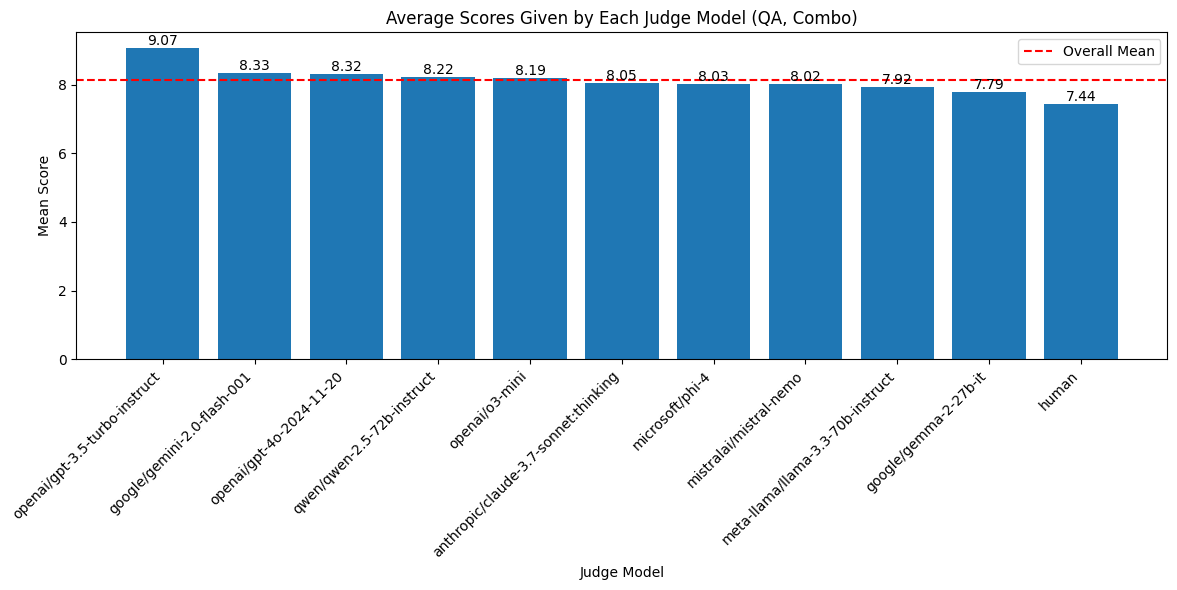


Mean scores by judge model:
judge_model
openai/gpt-3.5-turbo-instruct           9.07
google/gemini-2.0-flash-001             8.33
openai/gpt-4o-2024-11-20                8.32
qwen/qwen-2.5-72b-instruct              8.22
openai/o3-mini                          8.19
anthropic/claude-3.7-sonnet:thinking    8.05
microsoft/phi-4                         8.03
mistralai/mistral-nemo                  8.02
meta-llama/llama-3.3-70b-instruct       7.92
google/gemma-2-27b-it                   7.79
human                                   7.44
Name: judge_rating, dtype: float64


In [7]:
# Now, let's consider the combo subset with human judgements (GIVEN scores)

# Calculate mean scores by judge model
judge_scores = qa_combo_filtered_df.groupby('judge_model')['judge_rating'].mean().round(2)
judge_scores = judge_scores.sort_values(ascending=False)

# Create bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(judge_scores)), judge_scores)
plt.xticks(range(len(judge_scores)), judge_scores.index, rotation=45, ha='right')
plt.axhline(y=qa_combo_filtered_df['judge_rating'].mean(), color='r', linestyle='--', label='Overall Mean')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom')

plt.title('Average Scores Given by Each Judge Model (QA, Combo)')
plt.ylabel('Mean Score')
plt.xlabel('Judge Model')
plt.legend()
plt.tight_layout()
plt.show()

print("\nMean scores by judge model:")
print(judge_scores)




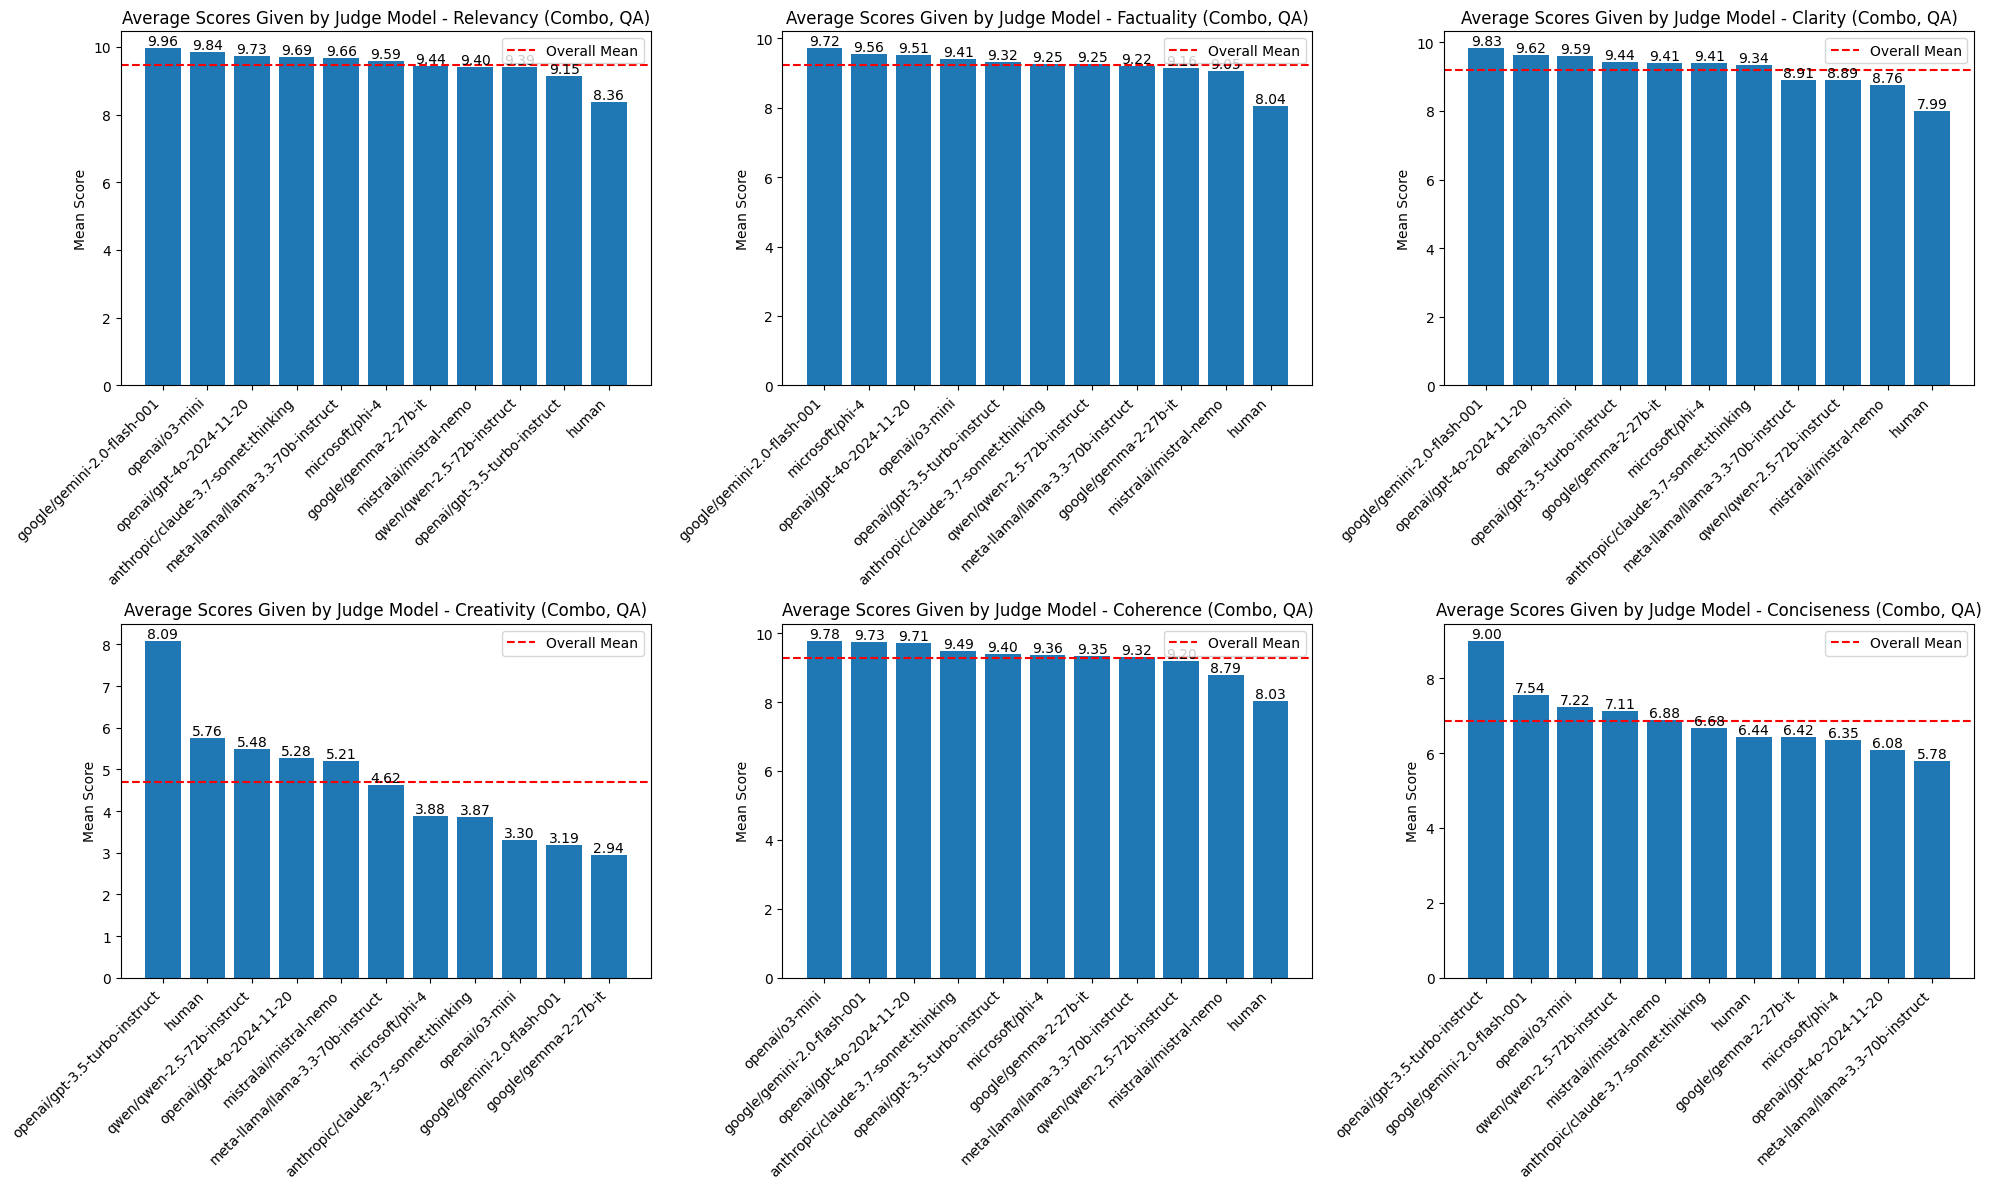


Mean scores by judge model for Relevancy:
judge_model
anthropic/claude-3.7-sonnet:thinking    9.69
google/gemini-2.0-flash-001             9.96
google/gemma-2-27b-it                   9.44
human                                   8.36
meta-llama/llama-3.3-70b-instruct       9.66
microsoft/phi-4                         9.59
mistralai/mistral-nemo                  9.40
openai/gpt-3.5-turbo-instruct           9.15
openai/gpt-4o-2024-11-20                9.73
openai/o3-mini                          9.84
qwen/qwen-2.5-72b-instruct              9.39
Name: judge_rating, dtype: float64

Mean scores by judge model for Factuality:
judge_model
anthropic/claude-3.7-sonnet:thinking    9.25
google/gemini-2.0-flash-001             9.72
google/gemma-2-27b-it                   9.16
human                                   8.04
meta-llama/llama-3.3-70b-instruct       9.22
microsoft/phi-4                         9.56
mistralai/mistral-nemo                  9.05
openai/gpt-3.5-turbo-instruct           9.32

In [12]:
# And now let's do it for every criteria
# This is on the combo DF

# Create subplots for each criteria
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

# Get unique criteria
criteria_list = qa_combo_filtered_df['criteria'].unique()

for idx, criteria in enumerate(criteria_list):
    # Filter data for this criteria
    criteria_df = qa_combo_filtered_df[qa_combo_filtered_df['criteria'] == criteria]
    
    # Calculate mean scores by judge model for this criteria
    judge_scores = criteria_df.groupby('judge_model')['judge_rating'].mean().round(2)
    judge_scores = judge_scores.sort_values(ascending=False)
    
    # Create bar plot
    bars = axes[idx].bar(range(len(judge_scores)), judge_scores)
    axes[idx].set_xticks(range(len(judge_scores)))
    axes[idx].set_xticklabels(judge_scores.index, rotation=45, ha='right')
    
    # Add horizontal line for mean
    axes[idx].axhline(y=criteria_df['judge_rating'].mean(), 
                      color='r', linestyle='--', label='Overall Mean')
    
    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        axes[idx].text(bar.get_x() + bar.get_width()/2., height,
                      f'{height:.2f}',
                      ha='center', va='bottom')
    
    # Add titles and labels
    axes[idx].set_title(f'Average Scores Given by Judge Model - {criteria} (Combo, QA)')
    axes[idx].set_ylabel('Mean Score')
    # axes[idx].set_xlabel('Judge Model')
    axes[idx].legend()

plt.tight_layout()
plt.show()

# Print mean scores by criteria and judge model
for criteria in criteria_list:
    criteria_df = qa_combo_filtered_df[qa_combo_filtered_df['criteria'] == criteria]
    judge_scores = criteria_df.groupby('judge_model')['judge_rating'].mean().round(2)
    print(f"\nMean scores by judge model for {criteria}:")
    print(judge_scores)


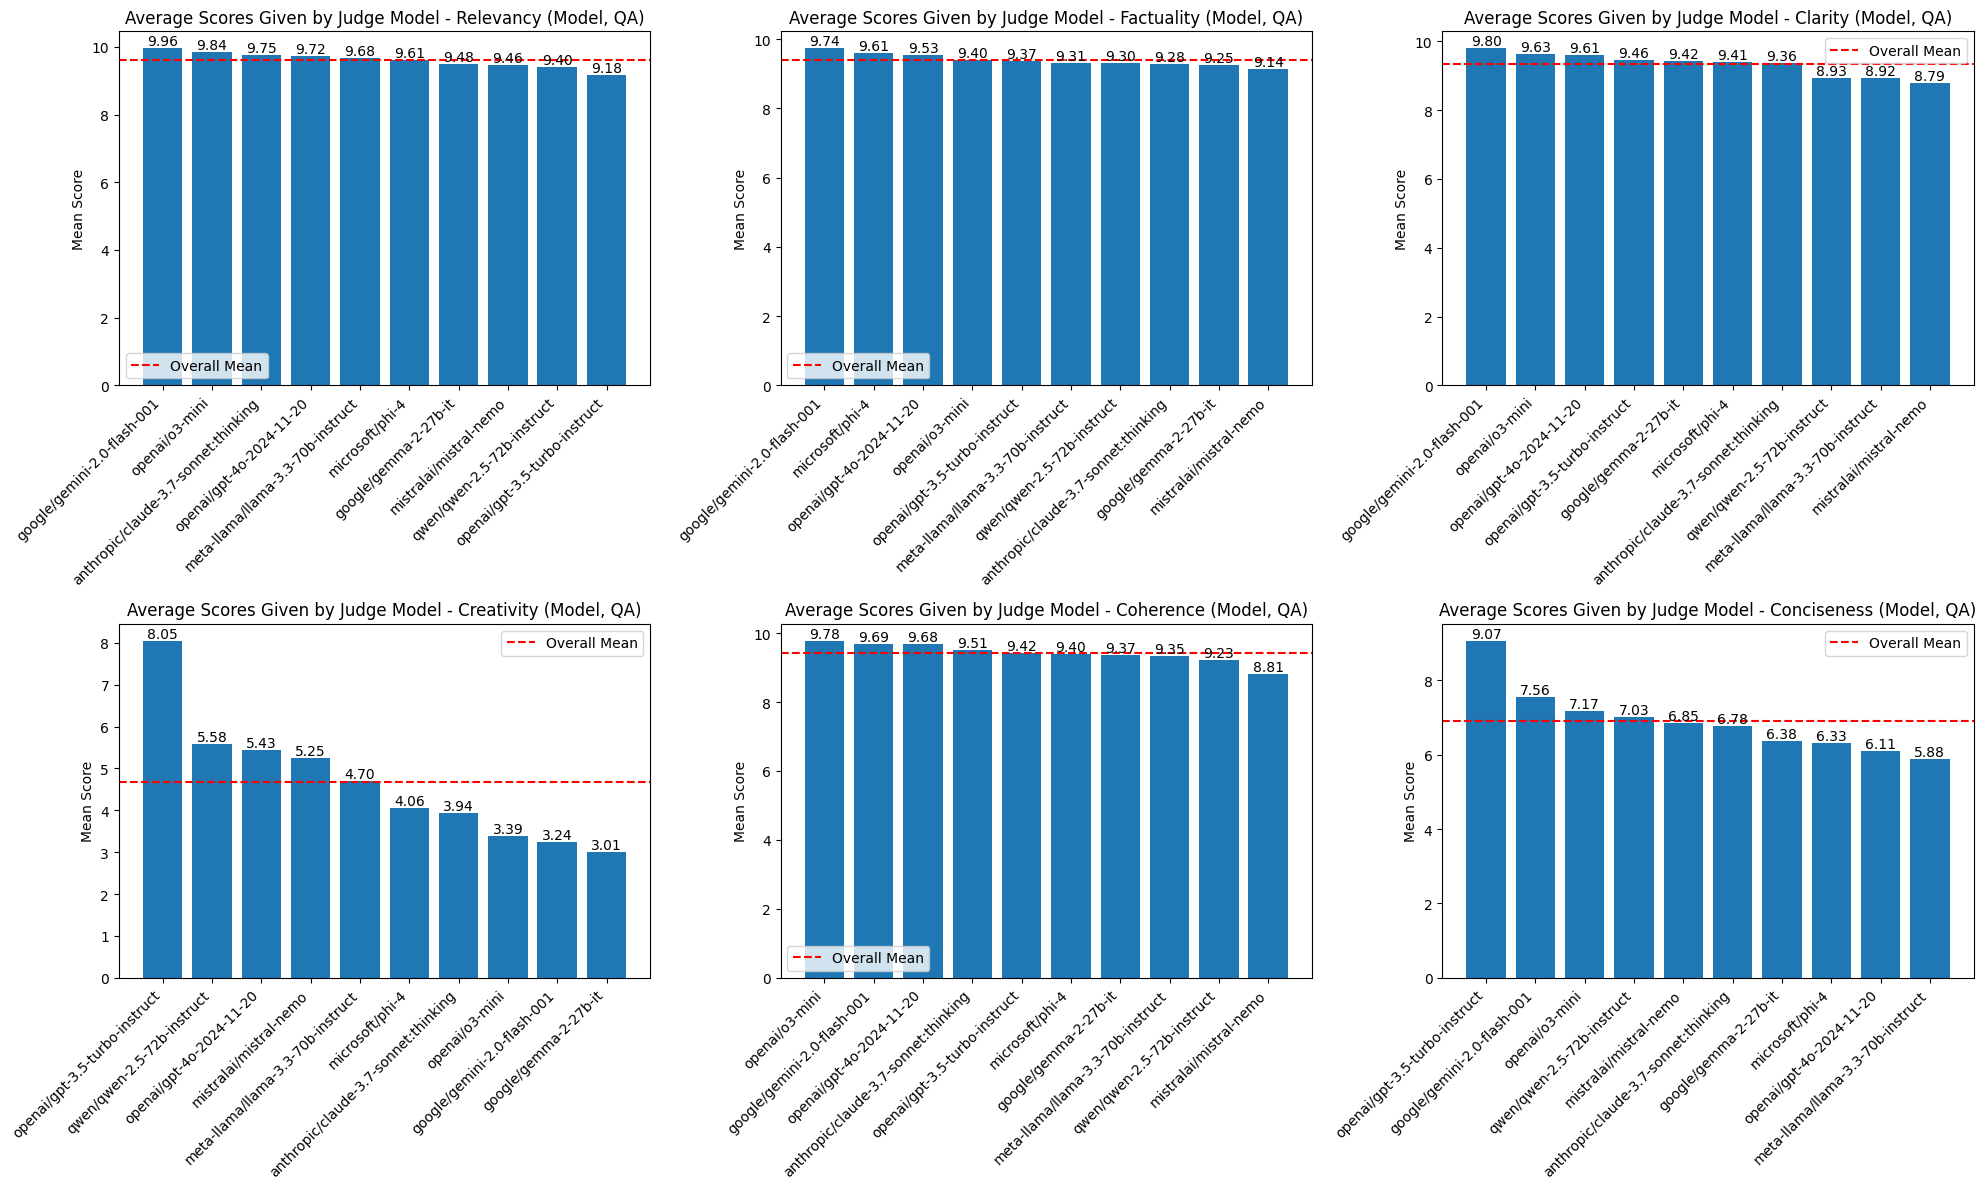


Mean scores by judge model for Relevancy:
judge_model
anthropic/claude-3.7-sonnet:thinking    9.75
google/gemini-2.0-flash-001             9.96
google/gemma-2-27b-it                   9.48
meta-llama/llama-3.3-70b-instruct       9.68
microsoft/phi-4                         9.61
mistralai/mistral-nemo                  9.46
openai/gpt-3.5-turbo-instruct           9.18
openai/gpt-4o-2024-11-20                9.72
openai/o3-mini                          9.84
qwen/qwen-2.5-72b-instruct              9.40
Name: judge_rating, dtype: float64

Mean scores by judge model for Factuality:
judge_model
anthropic/claude-3.7-sonnet:thinking    9.28
google/gemini-2.0-flash-001             9.74
google/gemma-2-27b-it                   9.25
meta-llama/llama-3.3-70b-instruct       9.31
microsoft/phi-4                         9.61
mistralai/mistral-nemo                  9.14
openai/gpt-3.5-turbo-instruct           9.37
openai/gpt-4o-2024-11-20                9.53
openai/o3-mini                          9.40

In [5]:
# And now let's do it for every criteria
# This is on the combo DF

# Create subplots for each criteria
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

# Get unique criteria
criteria_list = qa_lm_df['criteria'].unique()

for idx, criteria in enumerate(criteria_list):
    # Filter data for this criteria
    criteria_df = qa_lm_df[qa_lm_df['criteria'] == criteria]
    
    # Calculate mean scores by judge model for this criteria
    judge_scores = criteria_df.groupby('judge_model')['judge_rating'].mean().round(2)
    judge_scores = judge_scores.sort_values(ascending=False)
    
    # Create bar plot
    bars = axes[idx].bar(range(len(judge_scores)), judge_scores)
    axes[idx].set_xticks(range(len(judge_scores)))
    axes[idx].set_xticklabels(judge_scores.index, rotation=45, ha='right')
    
    # Add horizontal line for mean
    axes[idx].axhline(y=criteria_df['judge_rating'].mean(), 
                      color='r', linestyle='--', label='Overall Mean')
    
    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        axes[idx].text(bar.get_x() + bar.get_width()/2., height,
                      f'{height:.2f}',
                      ha='center', va='bottom')
    
    # Add titles and labels
    axes[idx].set_title(f'Average Scores Given by Judge Model - {criteria} (Model, QA)')
    axes[idx].set_ylabel('Mean Score')
    # axes[idx].set_xlabel('Judge Model')
    axes[idx].legend()

plt.tight_layout()
plt.show()

# Print mean scores by criteria and judge model
for criteria in criteria_list:
    criteria_df = qa_lm_df[qa_lm_df['criteria'] == criteria]
    judge_scores = criteria_df.groupby('judge_model')['judge_rating'].mean().round(2)
    print(f"\nMean scores by judge model for {criteria}:")
    print(judge_scores)


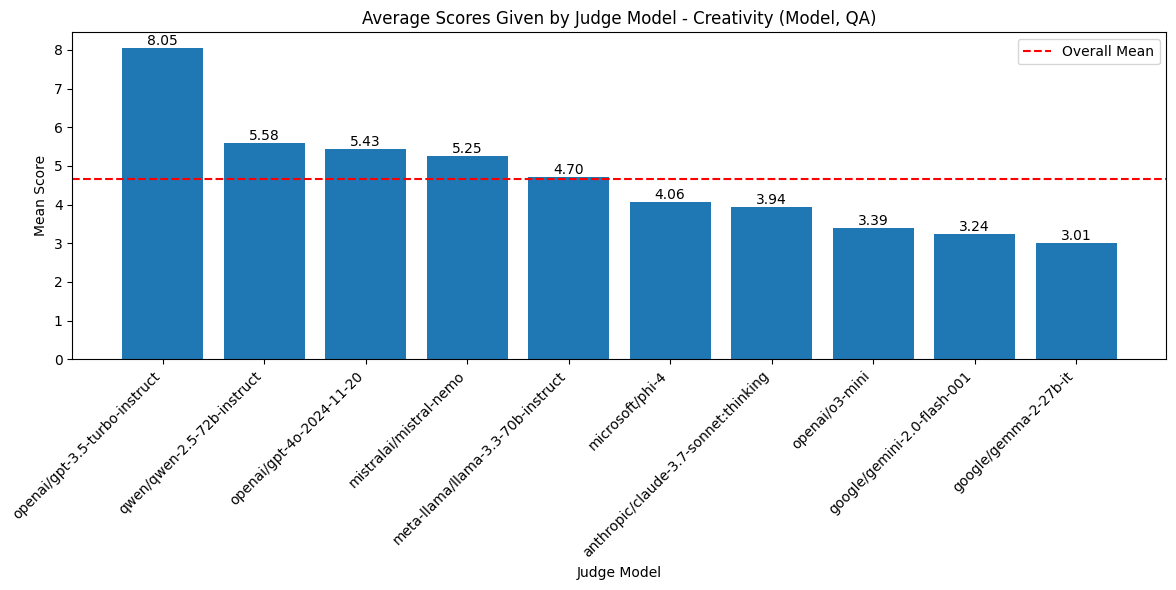


Mean scores by judge model for Creativity:
judge_model
openai/gpt-3.5-turbo-instruct           8.05
qwen/qwen-2.5-72b-instruct              5.58
openai/gpt-4o-2024-11-20                5.43
mistralai/mistral-nemo                  5.25
meta-llama/llama-3.3-70b-instruct       4.70
microsoft/phi-4                         4.06
anthropic/claude-3.7-sonnet:thinking    3.94
openai/o3-mini                          3.39
google/gemini-2.0-flash-001             3.24
google/gemma-2-27b-it                   3.01
Name: judge_rating, dtype: float64


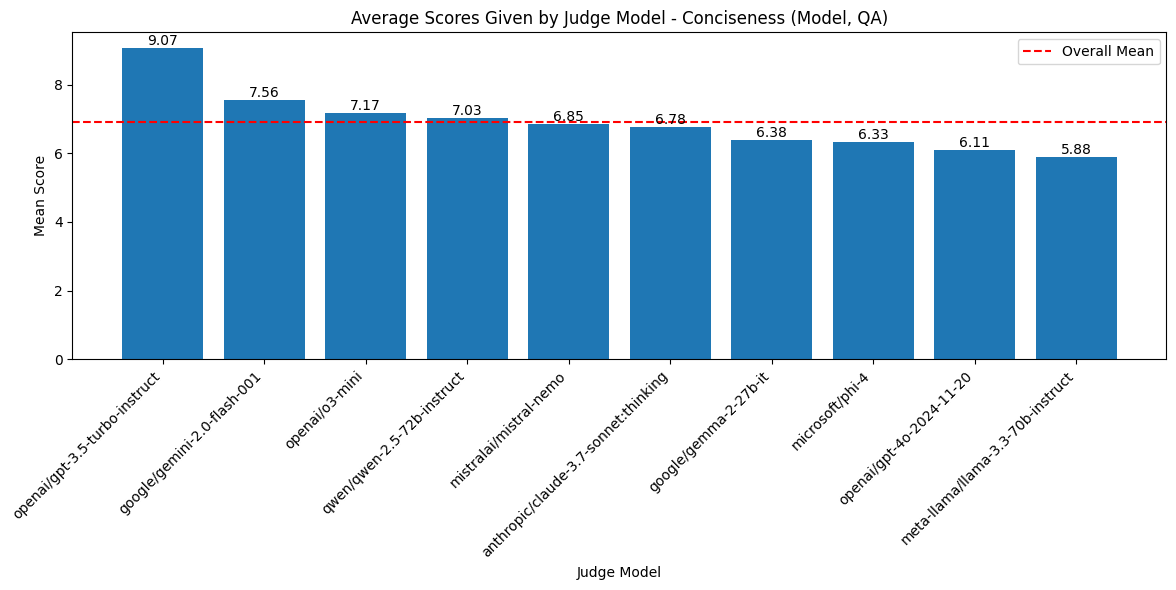


Mean scores by judge model for Conciseness:
judge_model
openai/gpt-3.5-turbo-instruct           9.07
google/gemini-2.0-flash-001             7.56
openai/o3-mini                          7.17
qwen/qwen-2.5-72b-instruct              7.03
mistralai/mistral-nemo                  6.85
anthropic/claude-3.7-sonnet:thinking    6.78
google/gemma-2-27b-it                   6.38
microsoft/phi-4                         6.33
openai/gpt-4o-2024-11-20                6.11
meta-llama/llama-3.3-70b-instruct       5.88
Name: judge_rating, dtype: float64


In [9]:
# Filter for just Creativity and Conciseness criteria
criteria_subset = ['Creativity', 'Conciseness']

for criteria in criteria_subset:
    # Filter data for this criteria
    criteria_df = qa_lm_df[qa_lm_df['criteria'] == criteria]
    
    # Calculate mean scores by judge model for this criteria
    judge_scores = criteria_df.groupby('judge_model')['judge_rating'].mean().round(2)
    judge_scores = judge_scores.sort_values(ascending=False)
    
    # Create bar plot
    plt.figure(figsize=(12,6))
    bars = plt.bar(range(len(judge_scores)), judge_scores)
    plt.xticks(range(len(judge_scores)), judge_scores.index, rotation=45, ha='right')
    
    # Add horizontal line for mean
    plt.axhline(y=criteria_df['judge_rating'].mean(), color='r', linestyle='--', label='Overall Mean')
    
    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom')
    
    plt.title(f'Average Scores Given by Judge Model - {criteria} (Model, QA)')
    plt.ylabel('Mean Score')
    plt.xlabel('Judge Model')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Print mean scores
    print(f"\nMean scores by judge model for {criteria}:")
    print(judge_scores)


In [7]:
# Get average scores given by each judge model for each criteria
judge_models = qa_lm_df['judge_model'].unique()

for judge_model in judge_models:
    model_scores = qa_lm_df[qa_lm_df['judge_model'] == judge_model].groupby('criteria')['judge_rating'].mean().round(2)
    
    print(f"\nAverage scores given by {judge_model} for each criteria:")
    print(model_scores)



Average scores given by anthropic/claude-3.7-sonnet:thinking for each criteria:
criteria
Clarity        9.36
Coherence      9.51
Conciseness    6.78
Creativity     3.94
Factuality     9.28
Relevancy      9.75
Name: judge_rating, dtype: float64

Average scores given by google/gemini-2.0-flash-001 for each criteria:
criteria
Clarity        9.80
Coherence      9.69
Conciseness    7.56
Creativity     3.24
Factuality     9.74
Relevancy      9.96
Name: judge_rating, dtype: float64

Average scores given by google/gemma-2-27b-it for each criteria:
criteria
Clarity        9.42
Coherence      9.37
Conciseness    6.38
Creativity     3.01
Factuality     9.25
Relevancy      9.48
Name: judge_rating, dtype: float64

Average scores given by openai/gpt-4o-2024-11-20 for each criteria:
criteria
Clarity        9.61
Coherence      9.68
Conciseness    6.11
Creativity     5.43
Factuality     9.53
Relevancy      9.72
Name: judge_rating, dtype: float64

Average scores given by meta-llama/llama-3.3-70b-instru

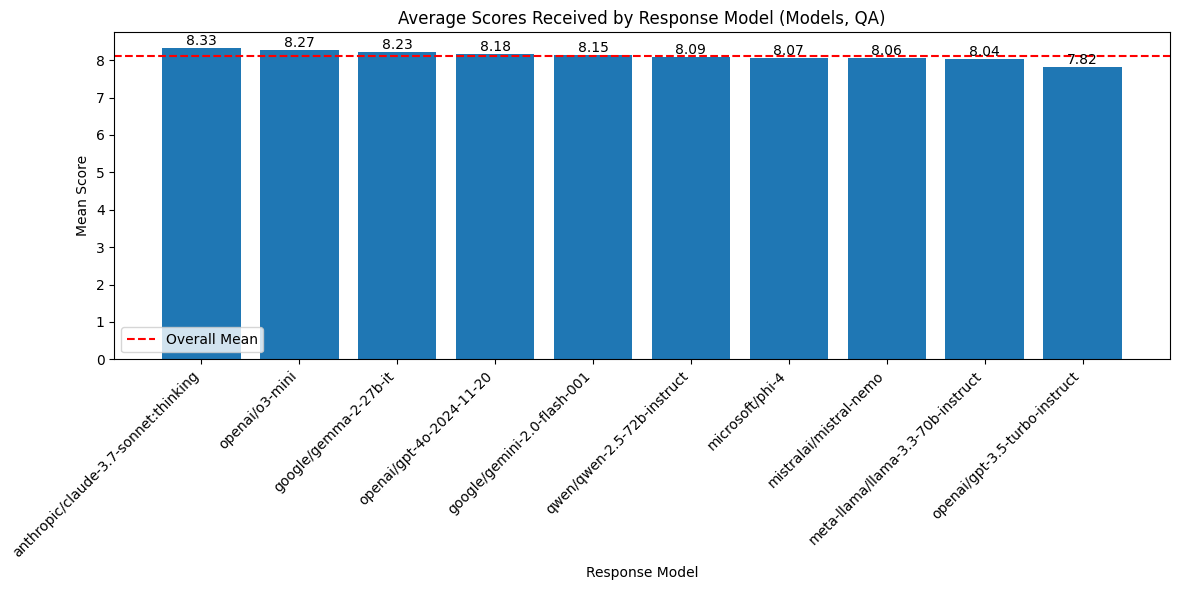


Mean scores received by response model:
response_model
anthropic/claude-3.7-sonnet:thinking    8.33
openai/o3-mini                          8.27
google/gemma-2-27b-it                   8.23
openai/gpt-4o-2024-11-20                8.18
google/gemini-2.0-flash-001             8.15
qwen/qwen-2.5-72b-instruct              8.09
microsoft/phi-4                         8.07
mistralai/mistral-nemo                  8.06
meta-llama/llama-3.3-70b-instruct       8.04
openai/gpt-3.5-turbo-instruct           7.82
Name: judge_rating, dtype: float64


In [11]:
# Which models receive high scores? Which models receive low scores?

# Calculate mean scores received by each response model
model_scores = qa_combo_filtered_df.groupby('response_model')['judge_rating'].mean().round(2)
model_scores = model_scores.sort_values(ascending=False)

# Create bar plot
plt.figure(figsize=(12,6))
bars = plt.bar(range(len(model_scores)), model_scores)
plt.xticks(range(len(model_scores)), model_scores.index, rotation=45, ha='right')

# Add horizontal line for mean
plt.axhline(y=model_scores.mean(), color='r', linestyle='--', label='Overall Mean')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom')

plt.title('Average Scores Received by Response Model (Models, QA)')
plt.ylabel('Mean Score')
plt.xlabel('Response Model')
plt.legend()

plt.tight_layout()
plt.show()

# Print mean scores
print("\nMean scores received by response model:")
print(model_scores)


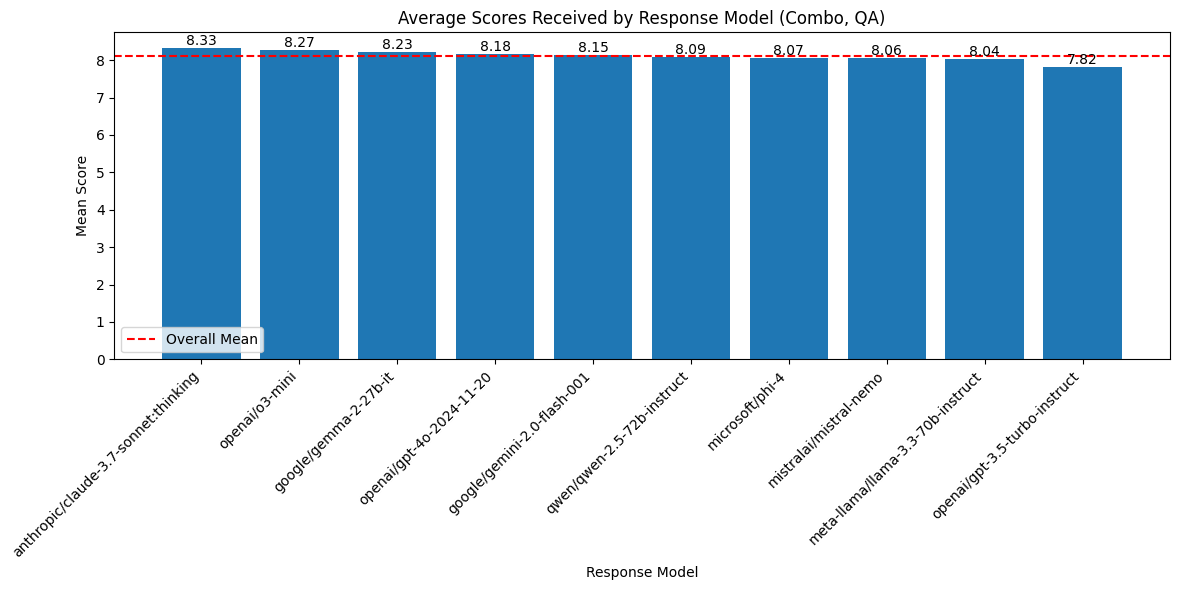


Mean scores received by response model (all data):
response_model
anthropic/claude-3.7-sonnet:thinking    8.33
openai/o3-mini                          8.27
google/gemma-2-27b-it                   8.23
openai/gpt-4o-2024-11-20                8.18
google/gemini-2.0-flash-001             8.15
qwen/qwen-2.5-72b-instruct              8.09
microsoft/phi-4                         8.07
mistralai/mistral-nemo                  8.06
meta-llama/llama-3.3-70b-instruct       8.04
openai/gpt-3.5-turbo-instruct           7.82
Name: judge_rating, dtype: float64


In [18]:
# Calculate mean scores received by each response model in combo df
combo_model_scores = qa_combo_filtered_df.groupby('response_model')['judge_rating'].mean().round(2)
combo_model_scores = combo_model_scores.sort_values(ascending=False)

# Create bar plot
plt.figure(figsize=(12,6))
bars = plt.bar(range(len(combo_model_scores)), combo_model_scores)
plt.xticks(range(len(combo_model_scores)), combo_model_scores.index, rotation=45, ha='right')

# Add horizontal line for mean
plt.axhline(y=combo_model_scores.mean(), color='r', linestyle='--', label='Overall Mean')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom')

plt.title('Average Scores Received by Response Model (Combo, QA)')
plt.ylabel('Mean Score')
plt.xlabel('Response Model')
plt.legend()

plt.tight_layout()
plt.show()

# Print mean scores
print("\nMean scores received by response model (all data):")
print(combo_model_scores)


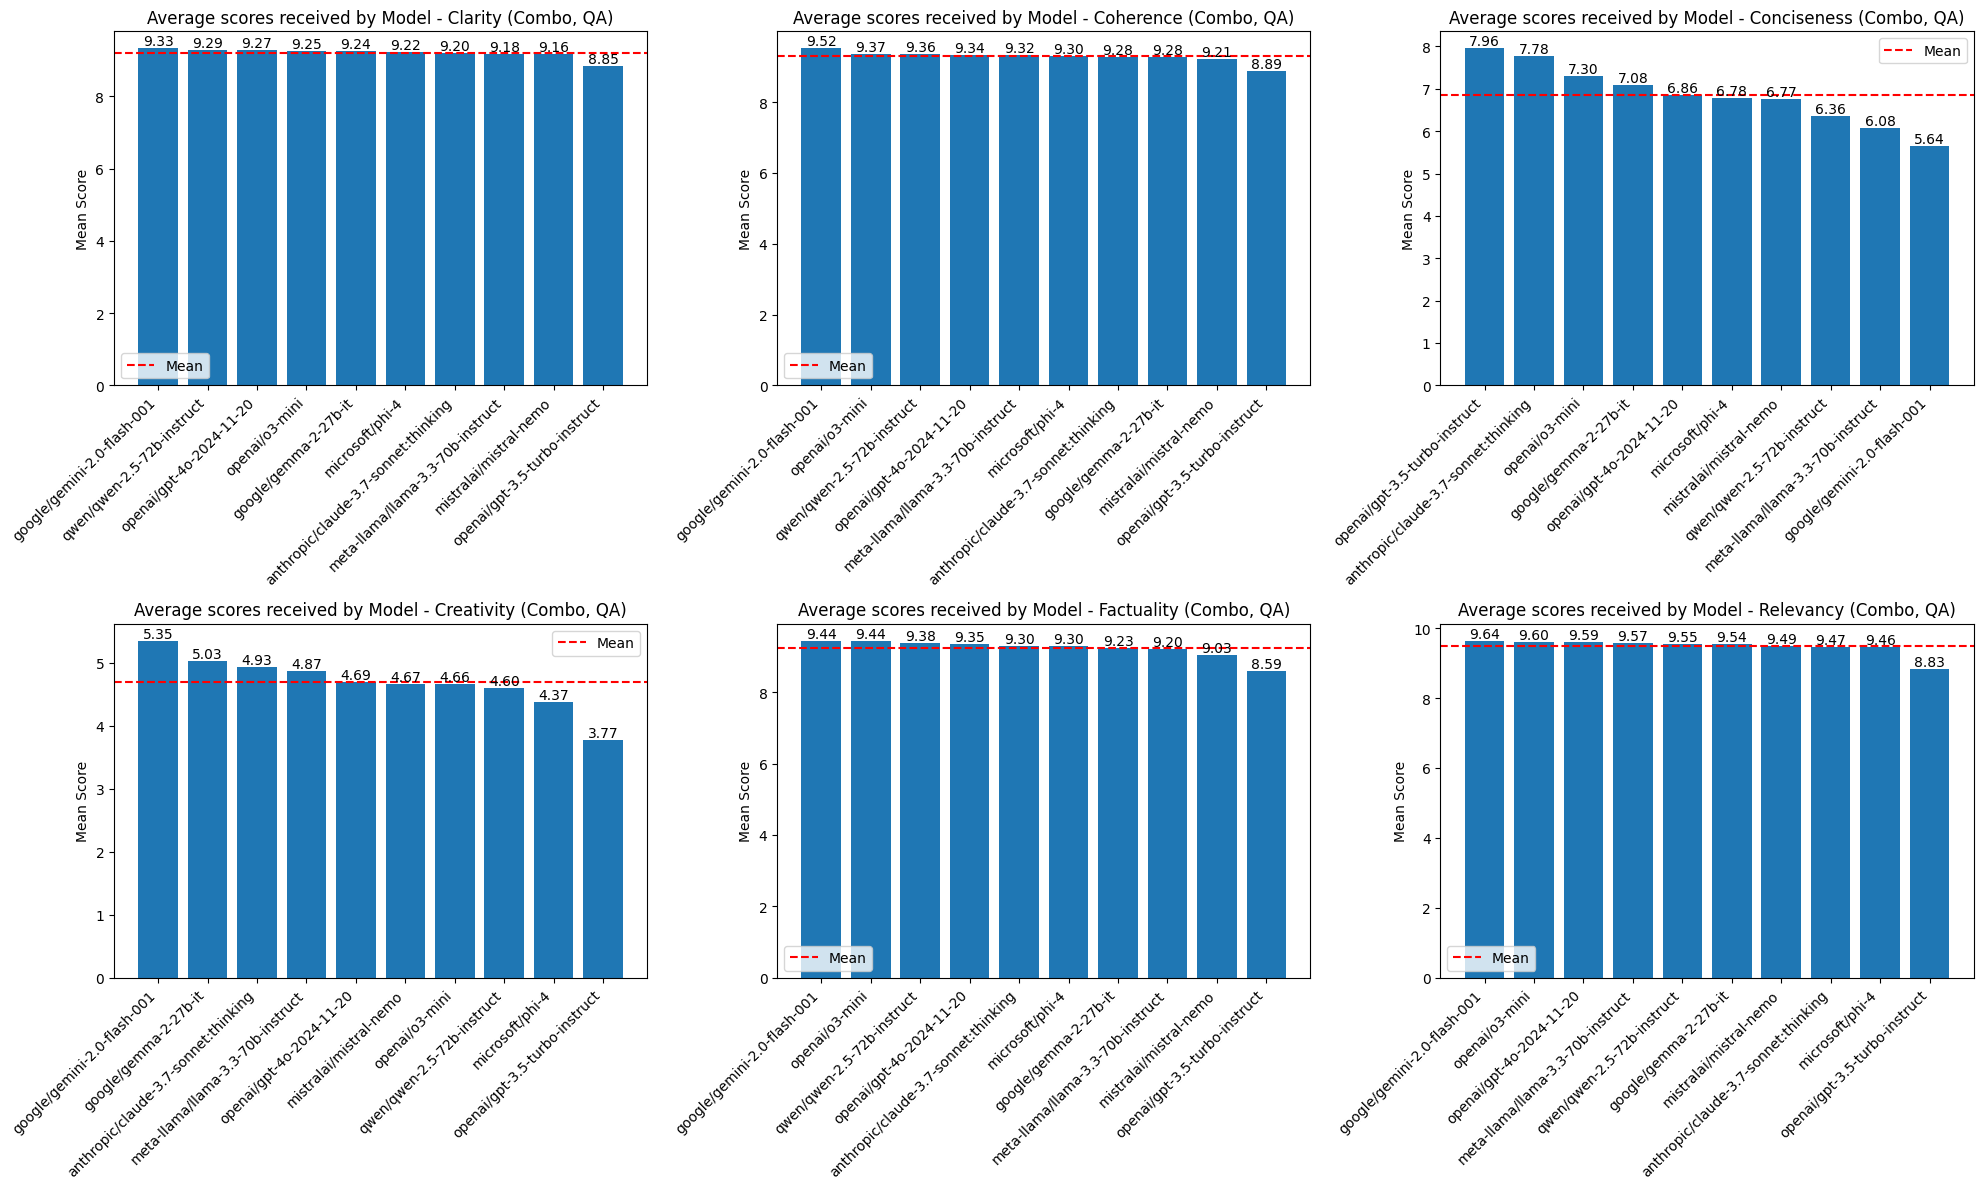


Mean scores by response model and criteria:
criteria                              Clarity  Coherence  Conciseness  \
response_model                                                          
anthropic/claude-3.7-sonnet:thinking     9.20       9.28         7.78   
google/gemini-2.0-flash-001              9.33       9.52         5.64   
google/gemma-2-27b-it                    9.24       9.28         7.08   
meta-llama/llama-3.3-70b-instruct        9.18       9.32         6.08   
microsoft/phi-4                          9.22       9.30         6.78   
mistralai/mistral-nemo                   9.16       9.21         6.77   
openai/gpt-3.5-turbo-instruct            8.85       8.89         7.96   
openai/gpt-4o-2024-11-20                 9.27       9.34         6.86   
openai/o3-mini                           9.25       9.37         7.30   
qwen/qwen-2.5-72b-instruct               9.29       9.36         6.36   

criteria                              Creativity  Factuality  Relevancy  
resp

In [17]:
# Calculate mean scores by response model and criteria
criteria_scores = qa_combo_filtered_df.groupby(['response_model', 'criteria'])['judge_rating'].mean().round(2)
criteria_scores = criteria_scores.unstack()

# Create 6 subplots, one for each criteria
fig, axes = plt.subplots(2, 3, figsize=(20,12))
axes = axes.flatten()

for i, criteria in enumerate(criteria_scores.columns):
    ax = axes[i]
    scores = criteria_scores[criteria].sort_values(ascending=False)
    
    # Create bar plot
    bars = ax.bar(range(len(scores)), scores)
    ax.set_xticks(range(len(scores)))
    ax.set_xticklabels(scores.index, rotation=45, ha='right')
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom')
    
    # Add mean line
    ax.axhline(y=scores.mean(), color='r', linestyle='--', label='Mean')
    
    ax.set_title(f'Average scores received by Model - {criteria} (Combo, QA)')
    ax.set_ylabel('Mean Score')
    # ax.set_xlabel('Response Model')
    ax.legend()

plt.tight_layout()
plt.show()

# Print mean scores by criteria
print("\nMean scores by response model and criteria:")
print(criteria_scores)


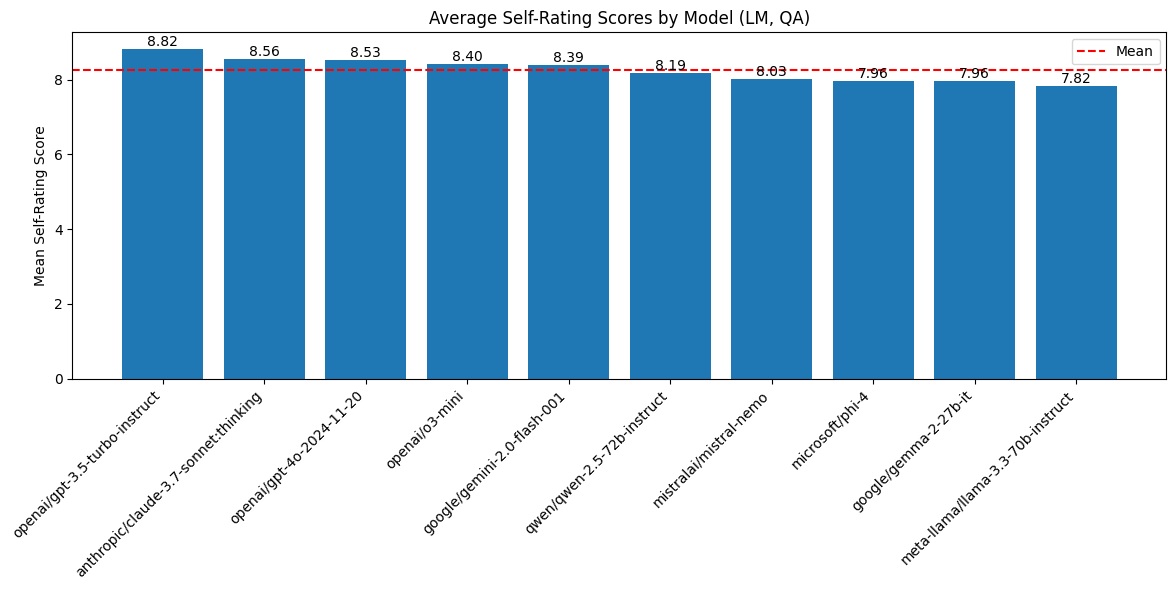


Mean self-rating scores by model:
judge_model
openai/gpt-3.5-turbo-instruct           8.82
anthropic/claude-3.7-sonnet:thinking    8.56
openai/gpt-4o-2024-11-20                8.53
openai/o3-mini                          8.40
google/gemini-2.0-flash-001             8.39
qwen/qwen-2.5-72b-instruct              8.19
mistralai/mistral-nemo                  8.02
microsoft/phi-4                         7.96
google/gemma-2-27b-it                   7.96
meta-llama/llama-3.3-70b-instruct       7.82
Name: judge_rating, dtype: float64


In [19]:
# Get rows where judge_model matches response_model
self_ratings = qa_lm_df[qa_lm_df['judge_model'] == qa_lm_df['response_model']]

# Calculate mean self-rating scores for each model
self_rating_scores = self_ratings.groupby('judge_model')['judge_rating'].mean().sort_values(ascending=False)

# Create bar plot
plt.figure(figsize=(12,6))
bars = plt.bar(range(len(self_rating_scores)), self_rating_scores)
plt.xticks(range(len(self_rating_scores)), self_rating_scores.index, rotation=45, ha='right')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}',
            ha='center', va='bottom')

# Add mean line
plt.axhline(y=self_rating_scores.mean(), color='r', linestyle='--', label='Mean')

plt.title('Average Self-Rating Scores by Model (LM, QA)')
plt.ylabel('Mean Self-Rating Score') 
plt.legend()
plt.tight_layout()
plt.show()

print("\nMean self-rating scores by model:")
print(self_rating_scores.round(2))


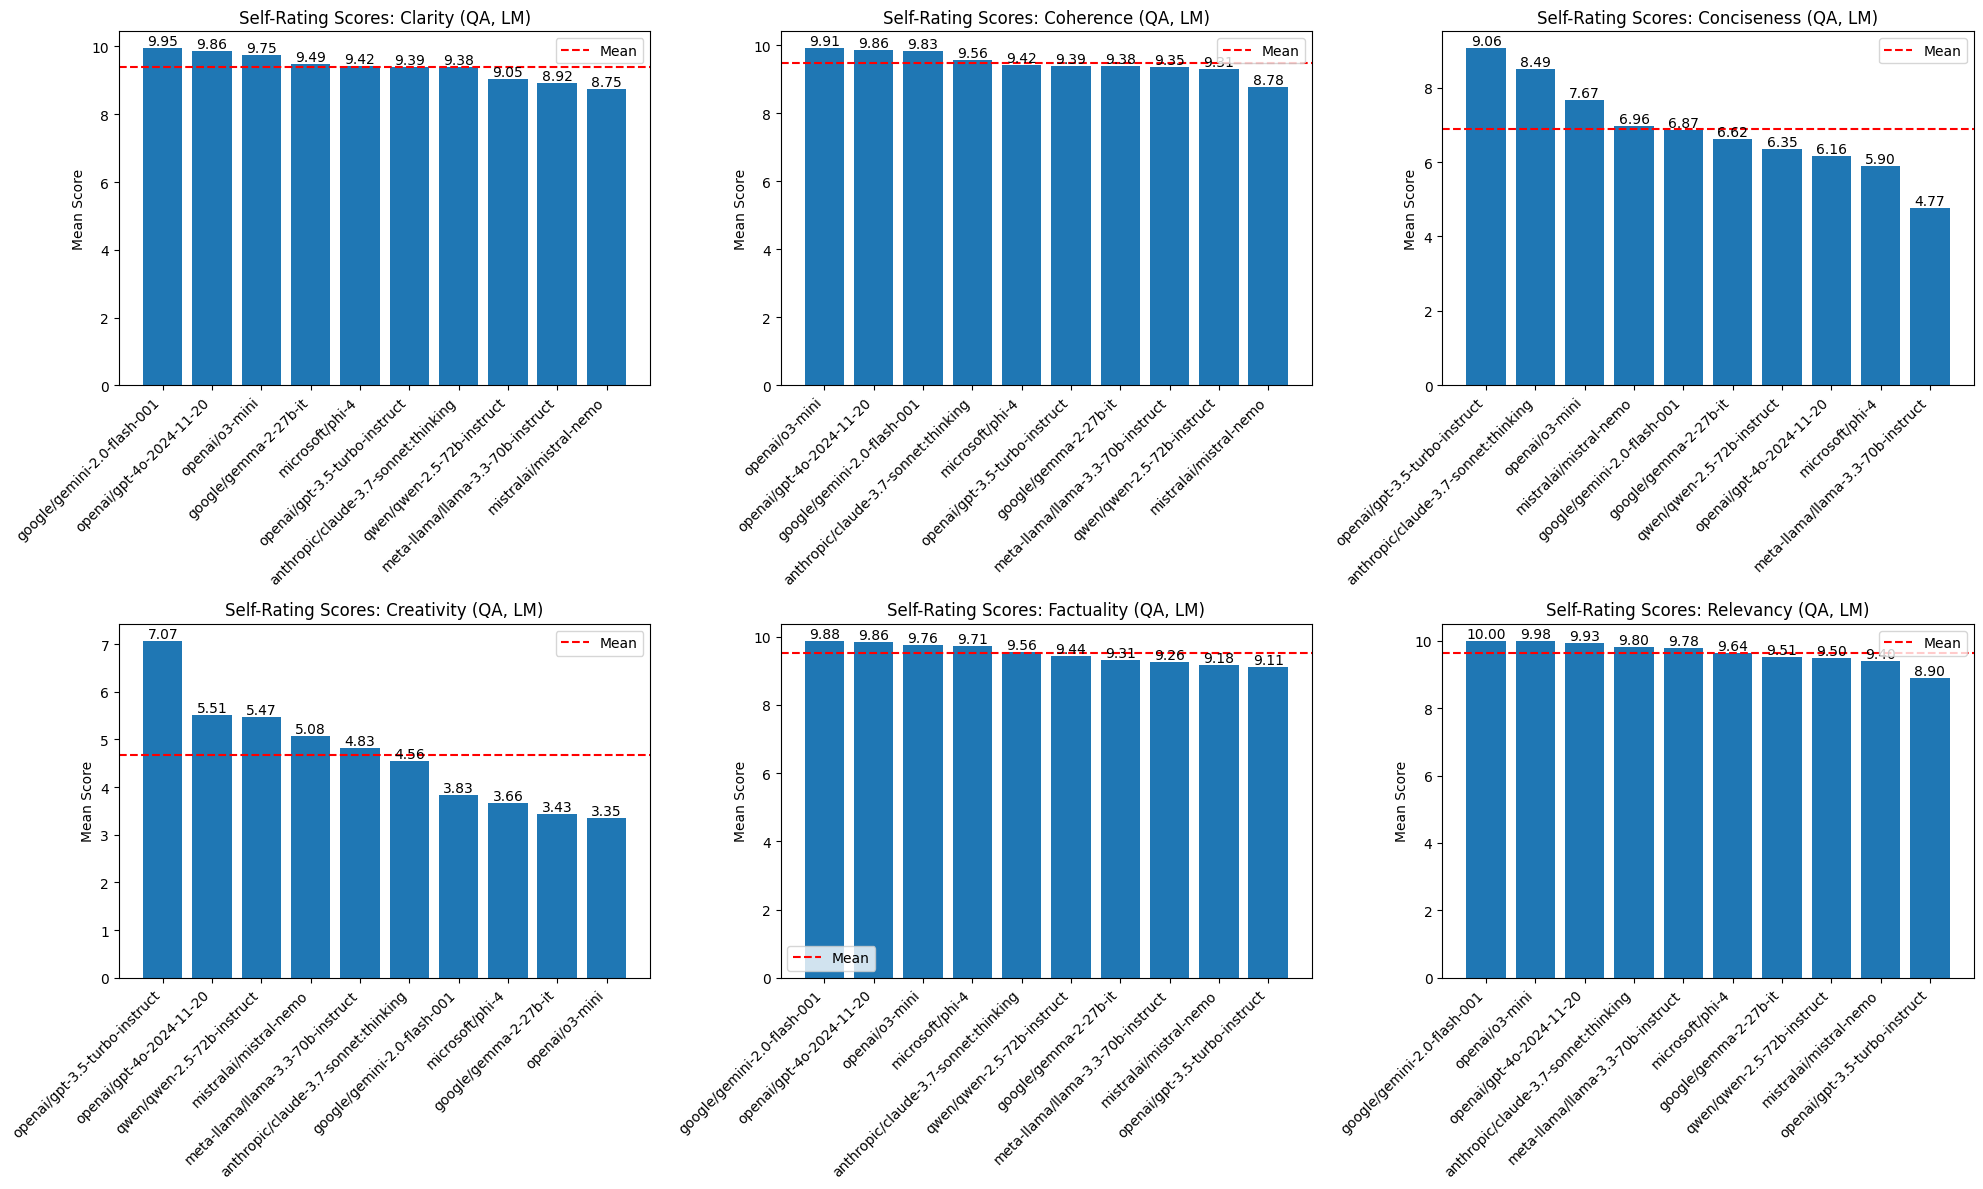


Mean self-rating scores by model and criteria:
criteria                              Clarity  Coherence  Conciseness  \
judge_model                                                             
anthropic/claude-3.7-sonnet:thinking     9.38       9.56         8.49   
google/gemini-2.0-flash-001              9.95       9.83         6.87   
google/gemma-2-27b-it                    9.49       9.38         6.62   
meta-llama/llama-3.3-70b-instruct        8.92       9.35         4.77   
microsoft/phi-4                          9.42       9.42         5.90   
mistralai/mistral-nemo                   8.75       8.78         6.96   
openai/gpt-3.5-turbo-instruct            9.39       9.39         9.06   
openai/gpt-4o-2024-11-20                 9.86       9.86         6.16   
openai/o3-mini                           9.75       9.91         7.67   
qwen/qwen-2.5-72b-instruct               9.05       9.31         6.35   

criteria                              Creativity  Factuality  Relevancy  
j

In [20]:
# Get self-ratings where judge_model matches response_model
self_ratings = qa_lm_df[qa_lm_df['judge_model'] == qa_lm_df['response_model']]

# Break down self-ratings by criteria
self_ratings_by_criteria = self_ratings.groupby(['judge_model', 'criteria'])['judge_rating'].mean().unstack()

# Create subplots for each criteria
fig, axes = plt.subplots(2, 3, figsize=(20,12))
axes = axes.flatten()

# Plot bar chart for each criteria
for i, criteria in enumerate(self_ratings_by_criteria.columns):
    ax = axes[i]
    scores = self_ratings_by_criteria[criteria].sort_values(ascending=False)
    
    bars = ax.bar(range(len(scores)), scores)
    ax.set_xticks(range(len(scores)))
    ax.set_xticklabels(scores.index, rotation=45, ha='right')
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom')
    
    # Add mean line
    ax.axhline(y=scores.mean(), color='r', linestyle='--', label='Mean')
    
    ax.set_title(f'Self-Rating Scores: {criteria} (QA, LM)')
    ax.set_ylabel('Mean Score')
    ax.legend()

plt.tight_layout()
plt.show()

print("\nMean self-rating scores by model and criteria:")
print(self_ratings_by_criteria.round(2))


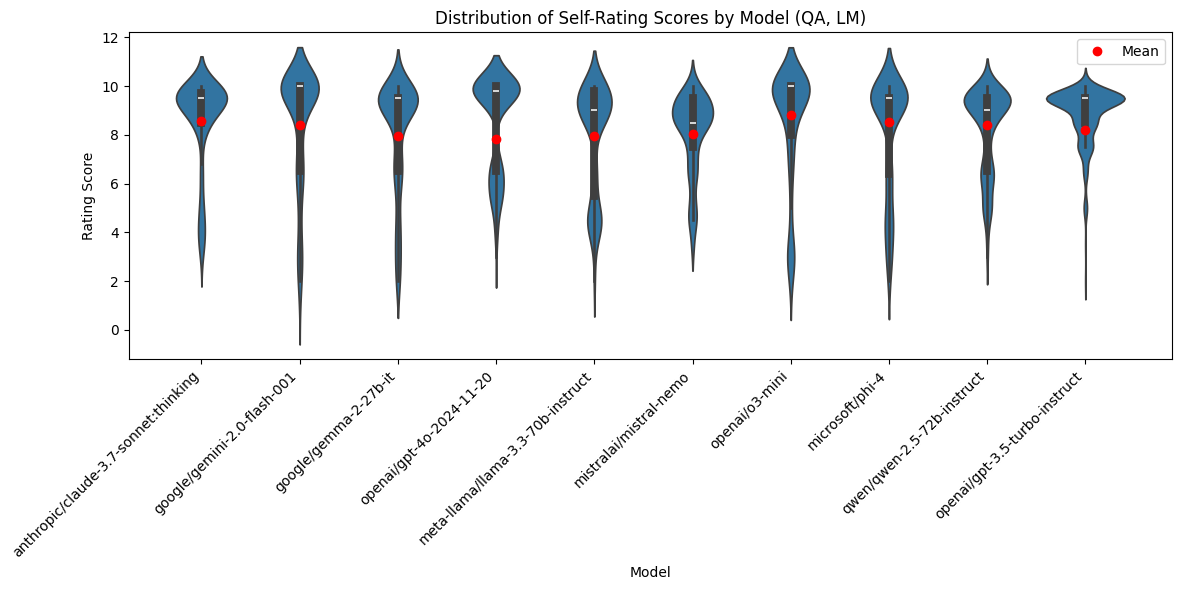


Summary statistics of self-rating scores by model:
                                      count  mean   std  min   25%   50%  \
judge_model                                                                
anthropic/claude-3.7-sonnet:thinking  300.0  8.56  1.91  3.0  8.50   9.5   
google/gemini-2.0-flash-001           300.0  8.39  2.49  1.0  6.50  10.0   
google/gemma-2-27b-it                 300.0  7.96  2.35  2.0  6.50   9.5   
meta-llama/llama-3.3-70b-instruct     300.0  7.82  2.27  2.0  5.50   9.0   
microsoft/phi-4                       300.0  7.96  2.44  2.0  6.38   9.5   
mistralai/mistral-nemo                300.0  8.02  1.67  3.5  7.50   8.5   
openai/gpt-3.5-turbo-instruct         300.0  8.82  1.16  2.0  8.50   9.5   
openai/gpt-4o-2024-11-20              300.0  8.53  1.98  3.0  6.50   9.8   
openai/o3-mini                        300.0  8.40  2.49  2.0  8.00  10.0   
qwen/qwen-2.5-72b-instruct            300.0  8.19  1.76  3.0  6.50   9.0   

                                   

In [21]:
# Get self-ratings where judge_model matches response_model
self_ratings = qa_lm_df[qa_lm_df['judge_model'] == qa_lm_df['response_model']]

# Plot distribution of self-rating scores by model
plt.figure(figsize=(12,6))

# Create violin plot
sns.violinplot(data=self_ratings, x='judge_model', y='judge_rating')

plt.title('Distribution of Self-Rating Scores by Model (QA, LM)')
plt.xlabel('Model')
plt.ylabel('Rating Score')
plt.xticks(rotation=45, ha='right')

# Add mean points
means = self_ratings.groupby('judge_model')['judge_rating'].mean()
plt.plot(range(len(means)), means, 'ro', label='Mean')

plt.legend()
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary statistics of self-rating scores by model:")
print(self_ratings.groupby('judge_model')['judge_rating'].describe().round(2))


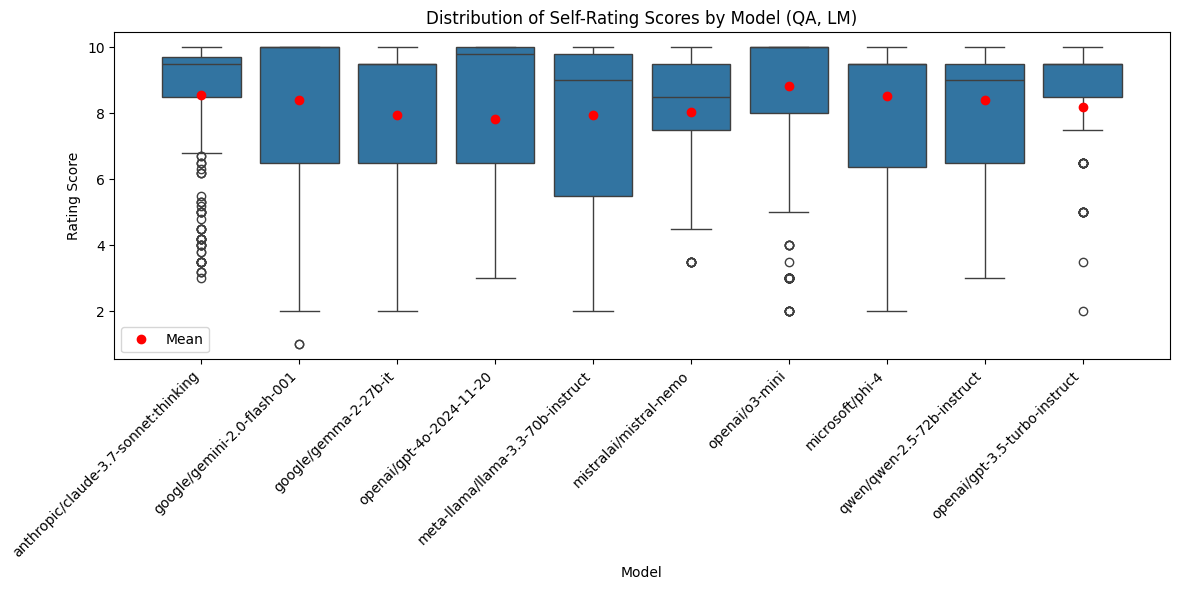


Summary statistics of self-rating scores by model:
                                      count  mean   std  min   25%   50%  \
judge_model                                                                
anthropic/claude-3.7-sonnet:thinking  300.0  8.56  1.91  3.0  8.50   9.5   
google/gemini-2.0-flash-001           300.0  8.39  2.49  1.0  6.50  10.0   
google/gemma-2-27b-it                 300.0  7.96  2.35  2.0  6.50   9.5   
meta-llama/llama-3.3-70b-instruct     300.0  7.82  2.27  2.0  5.50   9.0   
microsoft/phi-4                       300.0  7.96  2.44  2.0  6.38   9.5   
mistralai/mistral-nemo                300.0  8.02  1.67  3.5  7.50   8.5   
openai/gpt-3.5-turbo-instruct         300.0  8.82  1.16  2.0  8.50   9.5   
openai/gpt-4o-2024-11-20              300.0  8.53  1.98  3.0  6.50   9.8   
openai/o3-mini                        300.0  8.40  2.49  2.0  8.00  10.0   
qwen/qwen-2.5-72b-instruct            300.0  8.19  1.76  3.0  6.50   9.0   

                                   

In [22]:
# Get self-ratings where judge_model matches response_model
self_ratings = qa_lm_df[qa_lm_df['judge_model'] == qa_lm_df['response_model']]

# Plot distribution of self-rating scores by model
plt.figure(figsize=(12,6))

# Create violin plot
sns.boxplot(data=self_ratings, x='judge_model', y='judge_rating')

plt.title('Distribution of Self-Rating Scores by Model (QA, LM)')
plt.xlabel('Model')
plt.ylabel('Rating Score')
plt.xticks(rotation=45, ha='right')

# Add mean points
means = self_ratings.groupby('judge_model')['judge_rating'].mean()
plt.plot(range(len(means)), means, 'ro', label='Mean')

plt.legend()
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary statistics of self-rating scores by model:")
print(self_ratings.groupby('judge_model')['judge_rating'].describe().round(2))


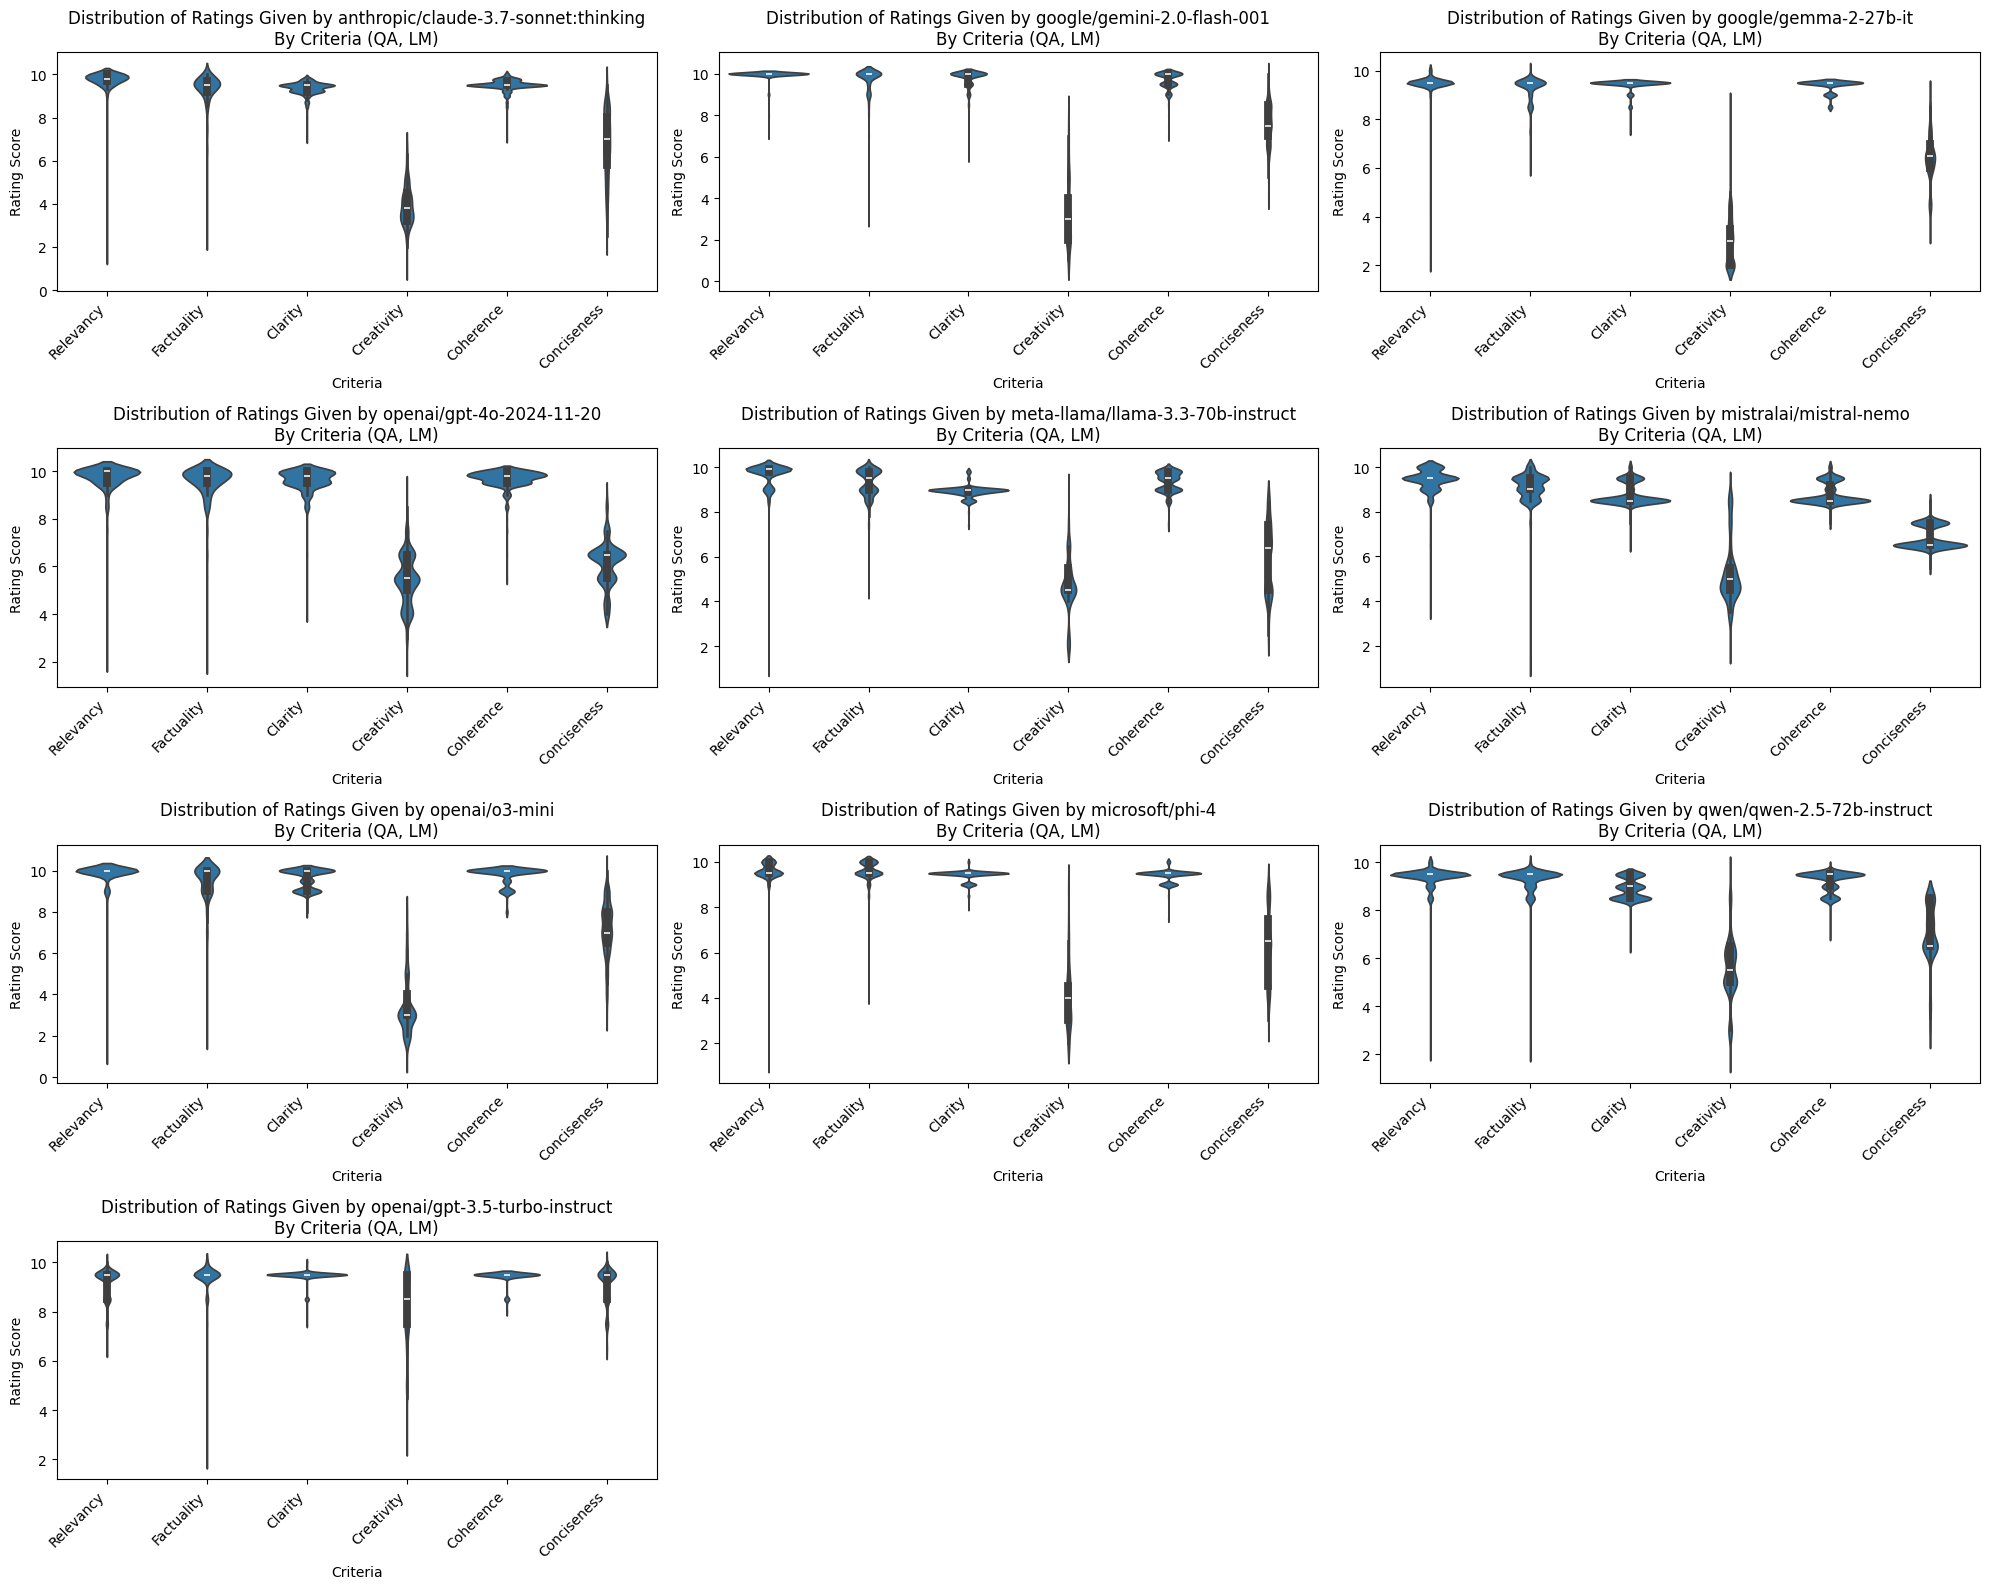


Summary statistics of ratings given by each model per criteria:
                                                  count  mean   std  min  \
judge_model                          criteria                              
anthropic/claude-3.7-sonnet:thinking Clarity      500.0  9.36  0.30  7.0   
                                     Coherence    500.0  9.51  0.26  7.0   
                                     Conciseness  500.0  6.78  1.49  2.5   
                                     Creativity   500.0  3.94  0.90  1.0   
                                     Factuality   500.0  9.28  0.92  2.4   
                                     Relevancy    500.0  9.75  0.51  1.5   
google/gemini-2.0-flash-001          Clarity      500.0  9.80  0.41  6.0   
                                     Coherence    500.0  9.69  0.40  7.0   
                                     Conciseness  500.0  7.56  0.90  4.0   
                                     Creativity   500.0  3.24  1.62  1.0   
                       

In [24]:

## Which models are most consistent in their given ratings?

# Create figure with subplots for each model's given ratings per criteria
plt.figure(figsize=(20,16))

# Get unique models and criteria
models = qa_lm_df['judge_model'].unique()
criteria_list = qa_lm_df['criteria'].unique()

# Create subplot for each model-criteria combination
for i, model in enumerate(models):
    model_ratings = qa_lm_df[qa_lm_df['judge_model'] == model]
    
    plt.subplot(4, 3, i+1)
    
    # Create violin plot with criteria on x-axis
    sns.violinplot(data=model_ratings, x='criteria', y='judge_rating')
    
    plt.title(f'Distribution of Ratings Given by {model}\nBy Criteria (QA, LM)')
    plt.ylabel('Rating Score')
    plt.xlabel('Criteria')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Print summary statistics grouped by model and criteria
print("\nSummary statistics of ratings given by each model per criteria:")
print(qa_lm_df.groupby(['judge_model', 'criteria'])['judge_rating'].describe().round(2))



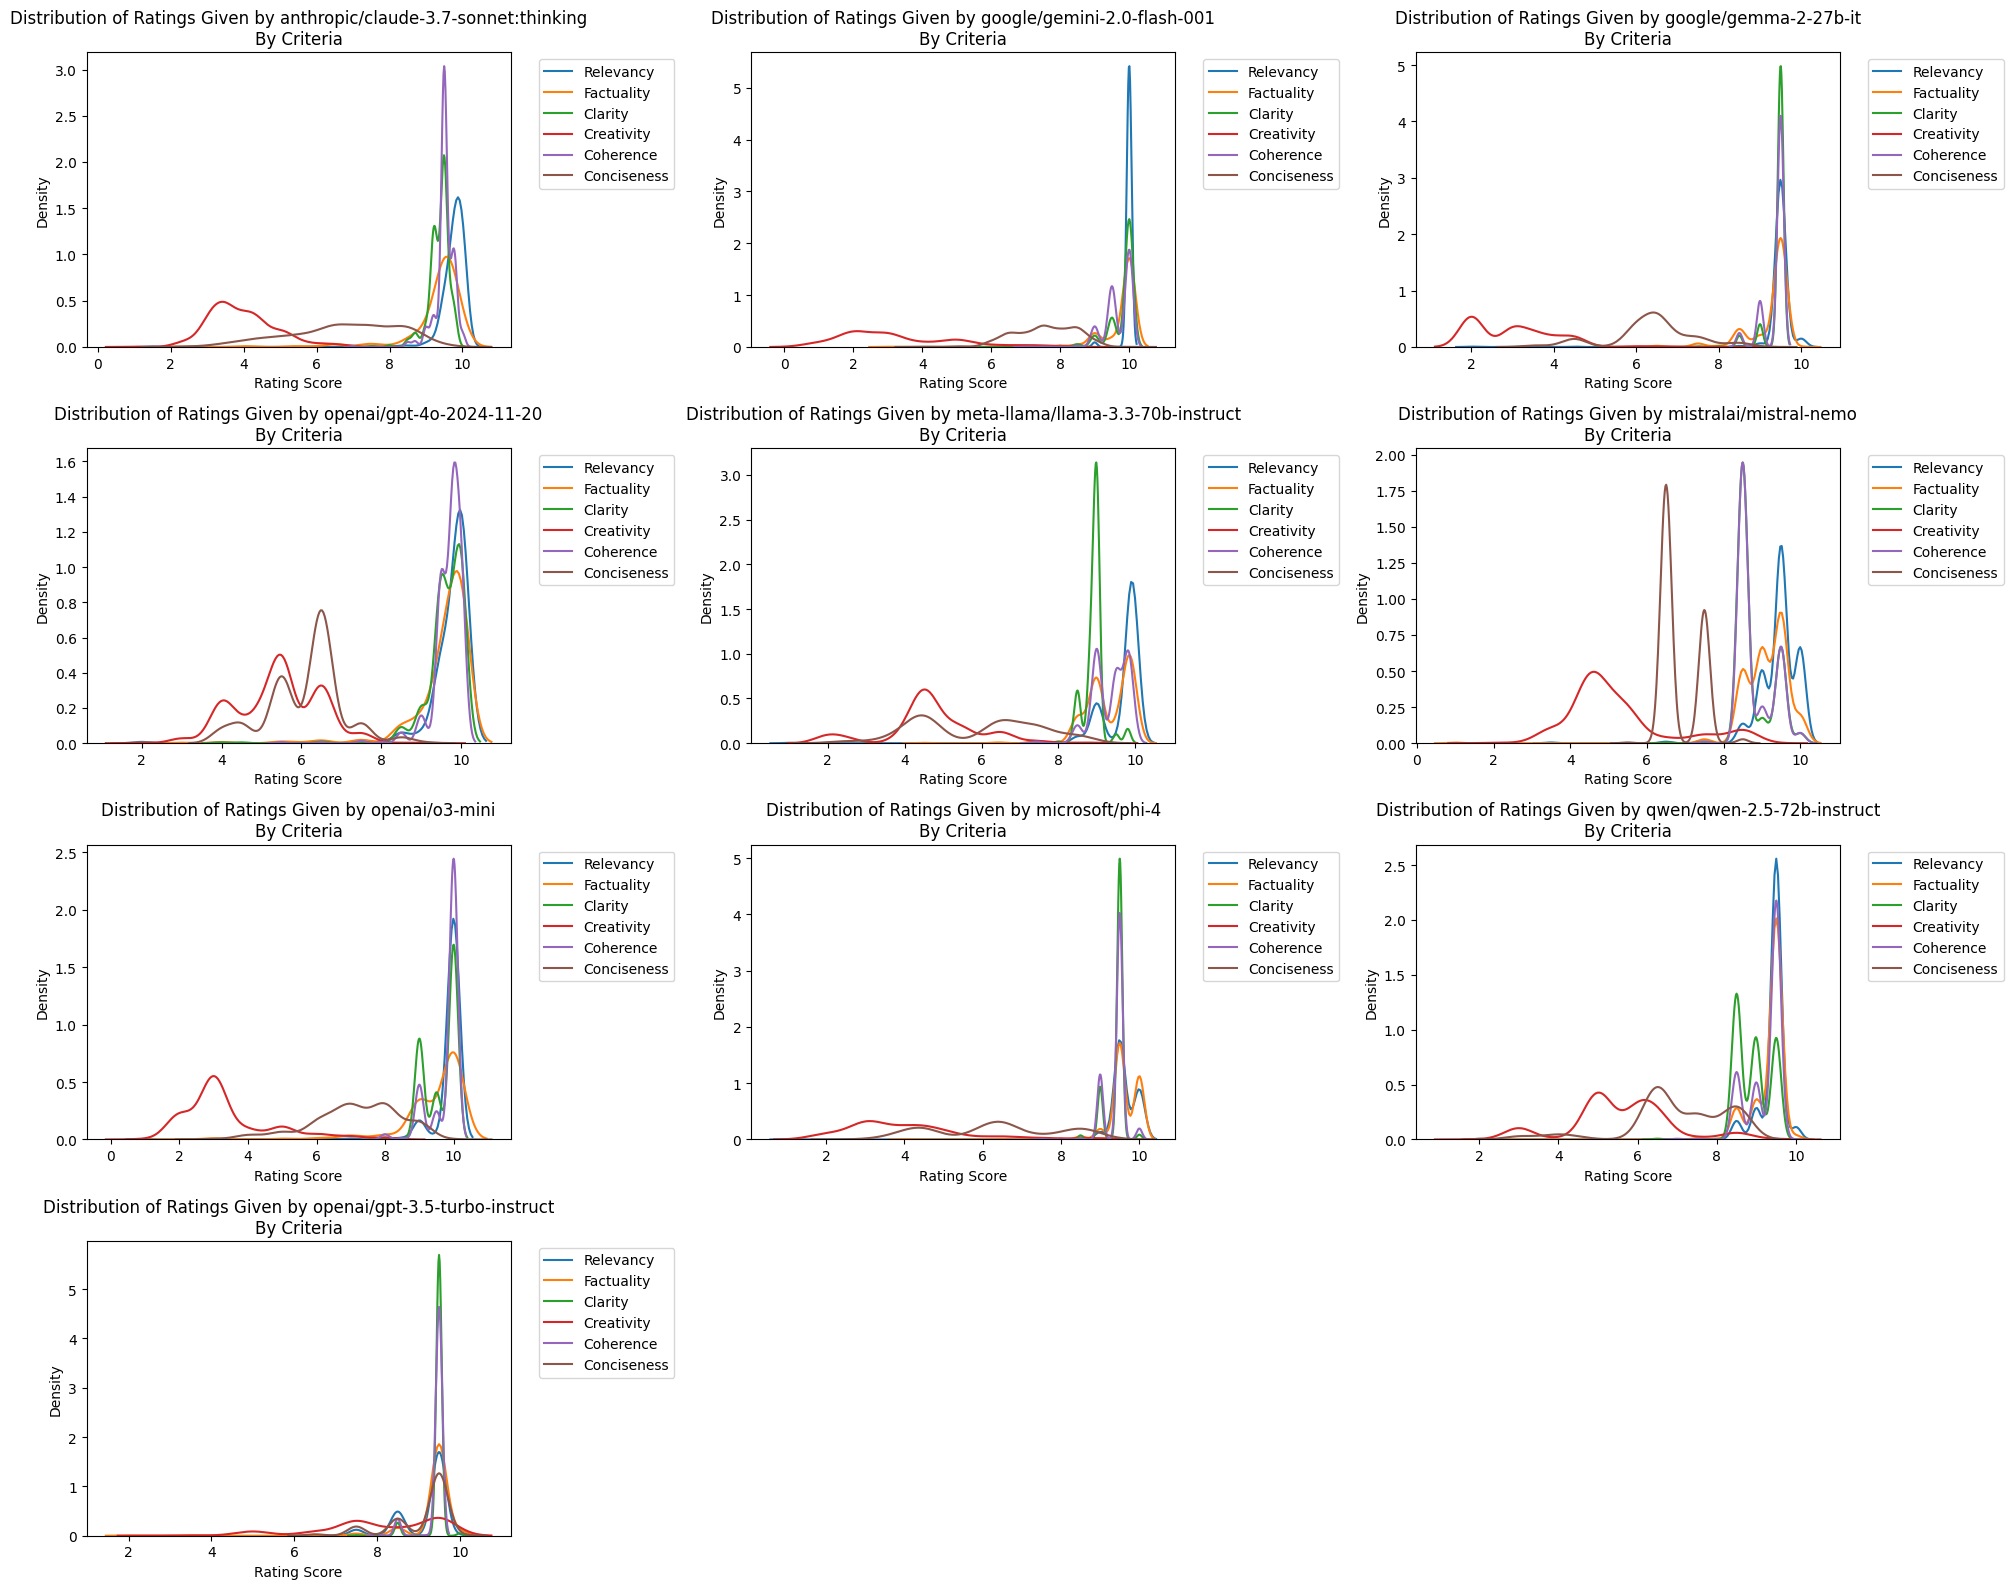


Summary statistics of ratings given by each model per criteria:
                                                  count  mean   std  min  \
judge_model                          criteria                              
anthropic/claude-3.7-sonnet:thinking Clarity      500.0  9.36  0.30  7.0   
                                     Coherence    500.0  9.51  0.26  7.0   
                                     Conciseness  500.0  6.78  1.49  2.5   
                                     Creativity   500.0  3.94  0.90  1.0   
                                     Factuality   500.0  9.28  0.92  2.4   
                                     Relevancy    500.0  9.75  0.51  1.5   
google/gemini-2.0-flash-001          Clarity      500.0  9.80  0.41  6.0   
                                     Coherence    500.0  9.69  0.40  7.0   
                                     Conciseness  500.0  7.56  0.90  4.0   
                                     Creativity   500.0  3.24  1.62  1.0   
                       

In [26]:
# Create figure with subplots for each model's given ratings per criteria
plt.figure(figsize=(20,16))

# Get unique models and criteria
models = qa_lm_df['judge_model'].unique()
criteria_list = qa_lm_df['criteria'].unique()

# Create subplot for each model-criteria combination
for i, model in enumerate(models):
    model_ratings = qa_lm_df[qa_lm_df['judge_model'] == model]
    
    plt.subplot(4, 3, i+1)
    
    # Create KDE plot for each criteria
    for criteria in criteria_list:
        criteria_ratings = model_ratings[model_ratings['criteria'] == criteria]['judge_rating']
        sns.kdeplot(data=criteria_ratings, label=criteria)
    
    plt.title(f'Distribution of Ratings Given by {model}\nBy Criteria')
    plt.ylabel('Density')
    plt.xlabel('Rating Score')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Print summary statistics grouped by model and criteria
print("\nSummary statistics of ratings given by each model per criteria:")
print(qa_lm_df.groupby(['judge_model', 'criteria'])['judge_rating'].describe().round(2))


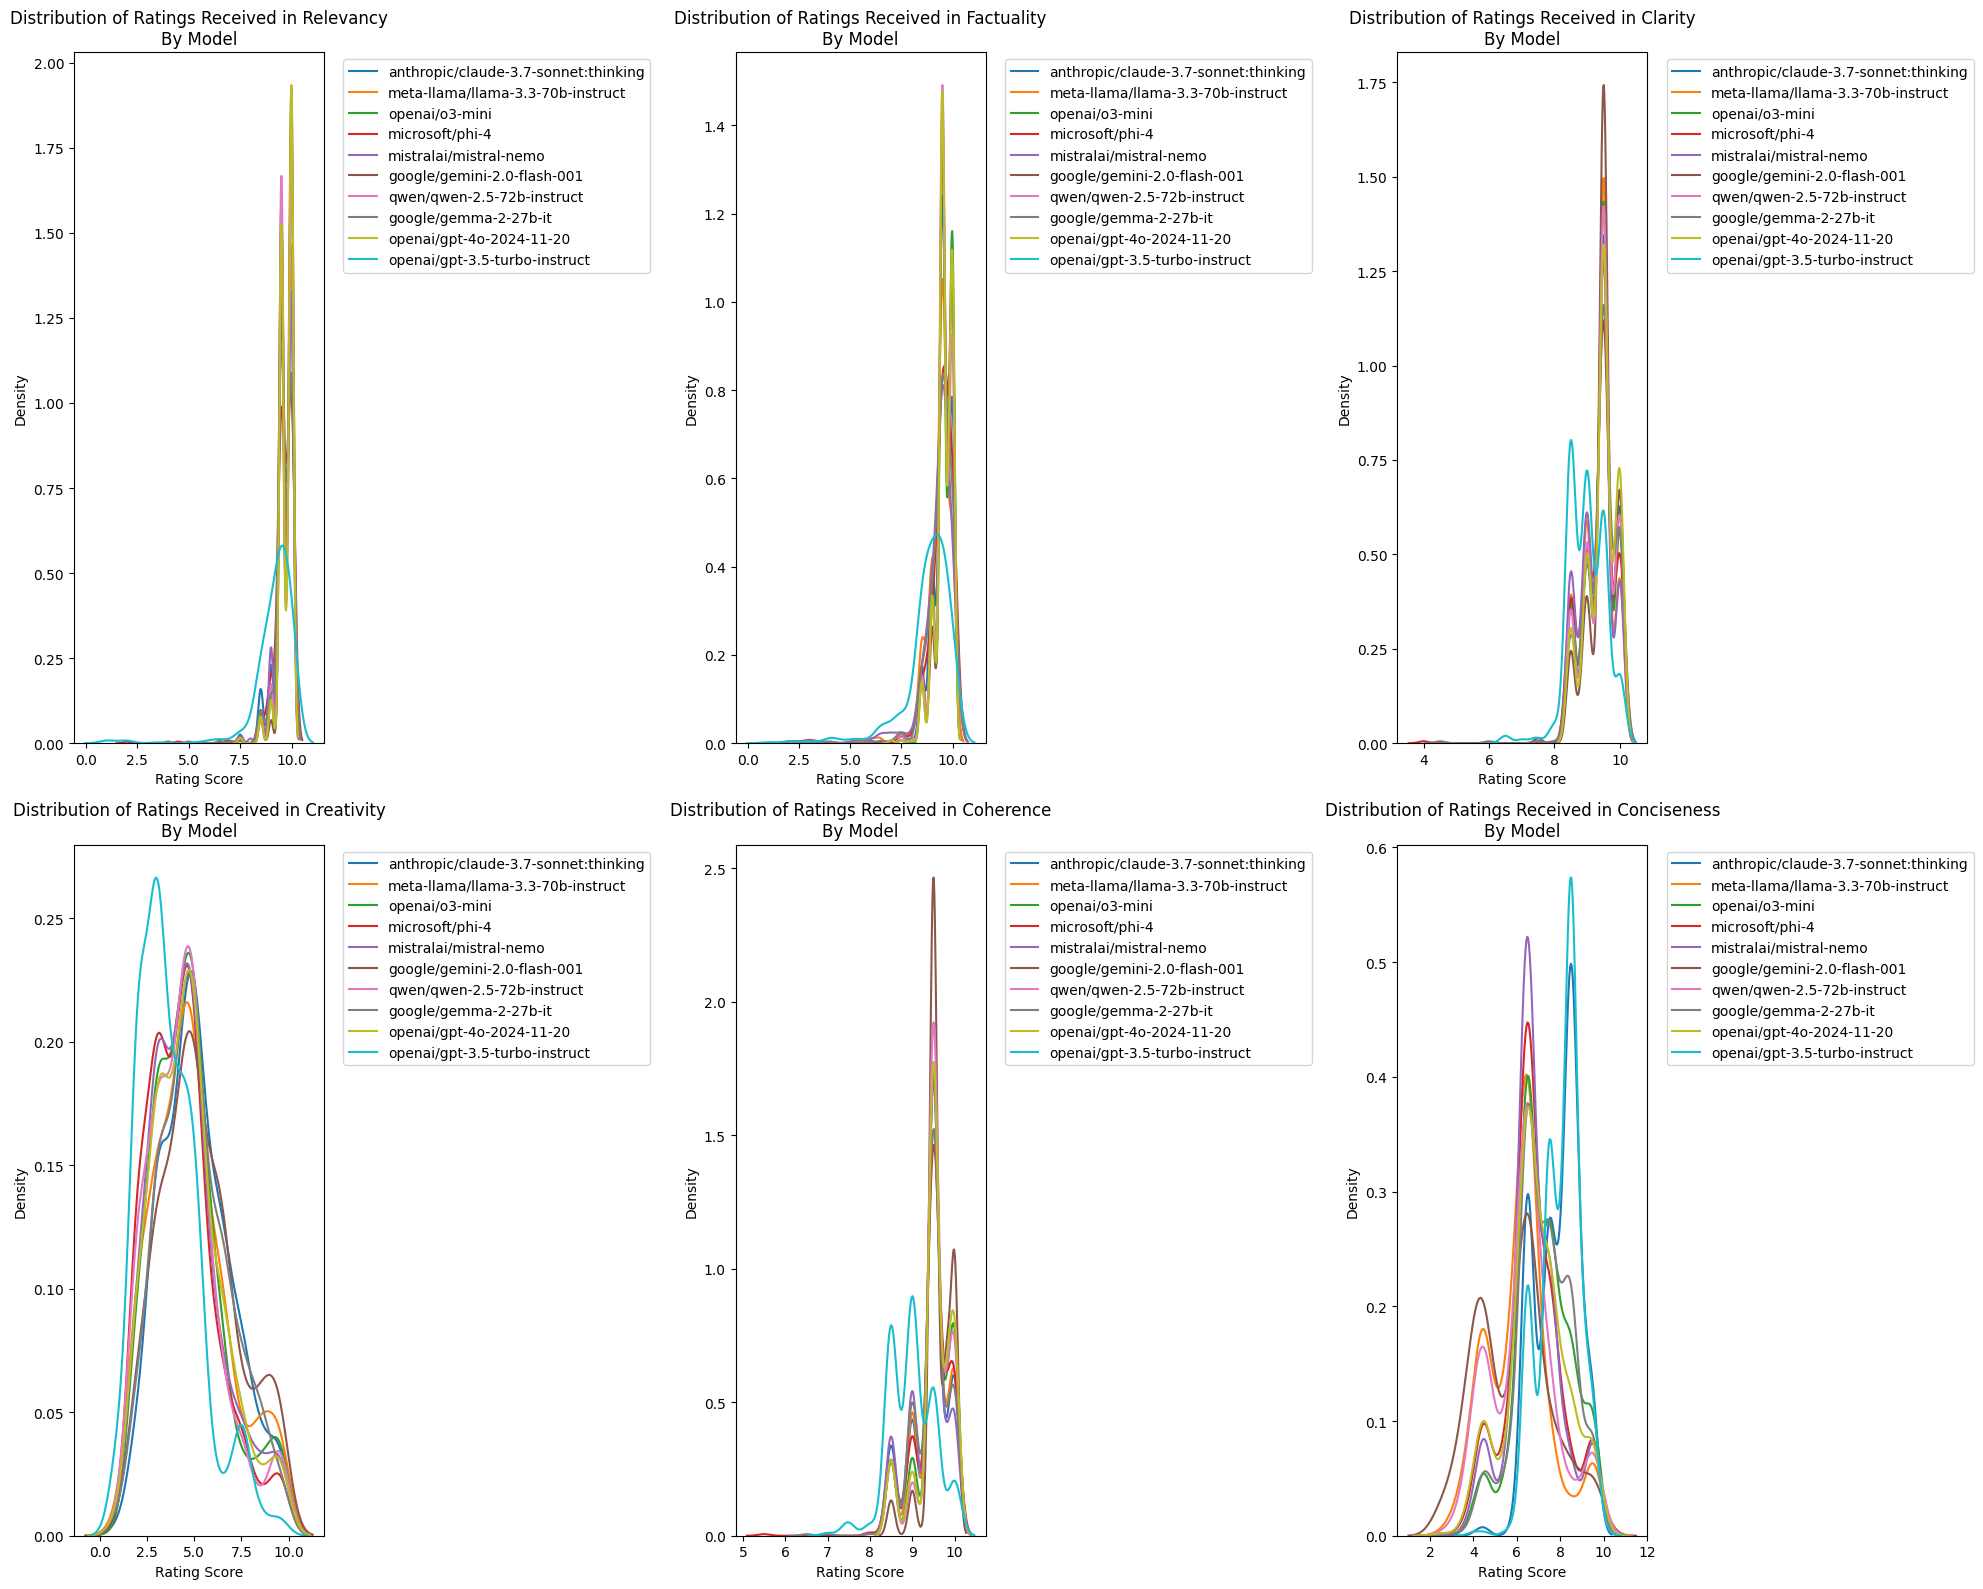


Summary statistics of ratings received by each model per criteria:
                                                  count  mean   std  min  \
criteria    response_model                                                 
Clarity     anthropic/claude-3.7-sonnet:thinking  500.0  9.39  0.46  8.5   
            google/gemini-2.0-flash-001           500.0  9.45  0.42  7.5   
            google/gemma-2-27b-it                 500.0  9.38  0.53  4.5   
            meta-llama/llama-3.3-70b-instruct     500.0  9.33  0.45  7.5   
            microsoft/phi-4                       500.0  9.33  0.53  4.0   
            mistralai/mistral-nemo                500.0  9.29  0.47  7.5   
            openai/gpt-3.5-turbo-instruct         500.0  8.97  0.57  6.5   
            openai/gpt-4o-2024-11-20              500.0  9.43  0.45  8.5   
            openai/o3-mini                        500.0  9.37  0.45  8.5   
            qwen/qwen-2.5-72b-instruct            500.0  9.39  0.45  8.5   
Coherence   anthropi

In [27]:
# Create figure with subplots for each criteria showing distribution of received ratings by model
plt.figure(figsize=(20,16))

# Get unique models and criteria
models = qa_lm_df['response_model'].unique()
criteria_list = qa_lm_df['criteria'].unique()

# Create subplot for each criteria
for i, criteria in enumerate(criteria_list):
    criteria_ratings = qa_lm_df[qa_lm_df['criteria'] == criteria]
    
    plt.subplot(2, 3, i+1)
    
    # Create KDE plot for each model's received ratings
    for model in models:
        model_ratings = criteria_ratings[criteria_ratings['response_model'] == model]['judge_rating']
        sns.kdeplot(data=model_ratings, label=model)
    
    plt.title(f'Distribution of Ratings Received in {criteria}\nBy Model')
    plt.ylabel('Density')
    plt.xlabel('Rating Score')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Print summary statistics grouped by criteria and model
print("\nSummary statistics of ratings received by each model per criteria:")
print(qa_lm_df.groupby(['criteria', 'response_model'])['judge_rating'].describe().round(2))


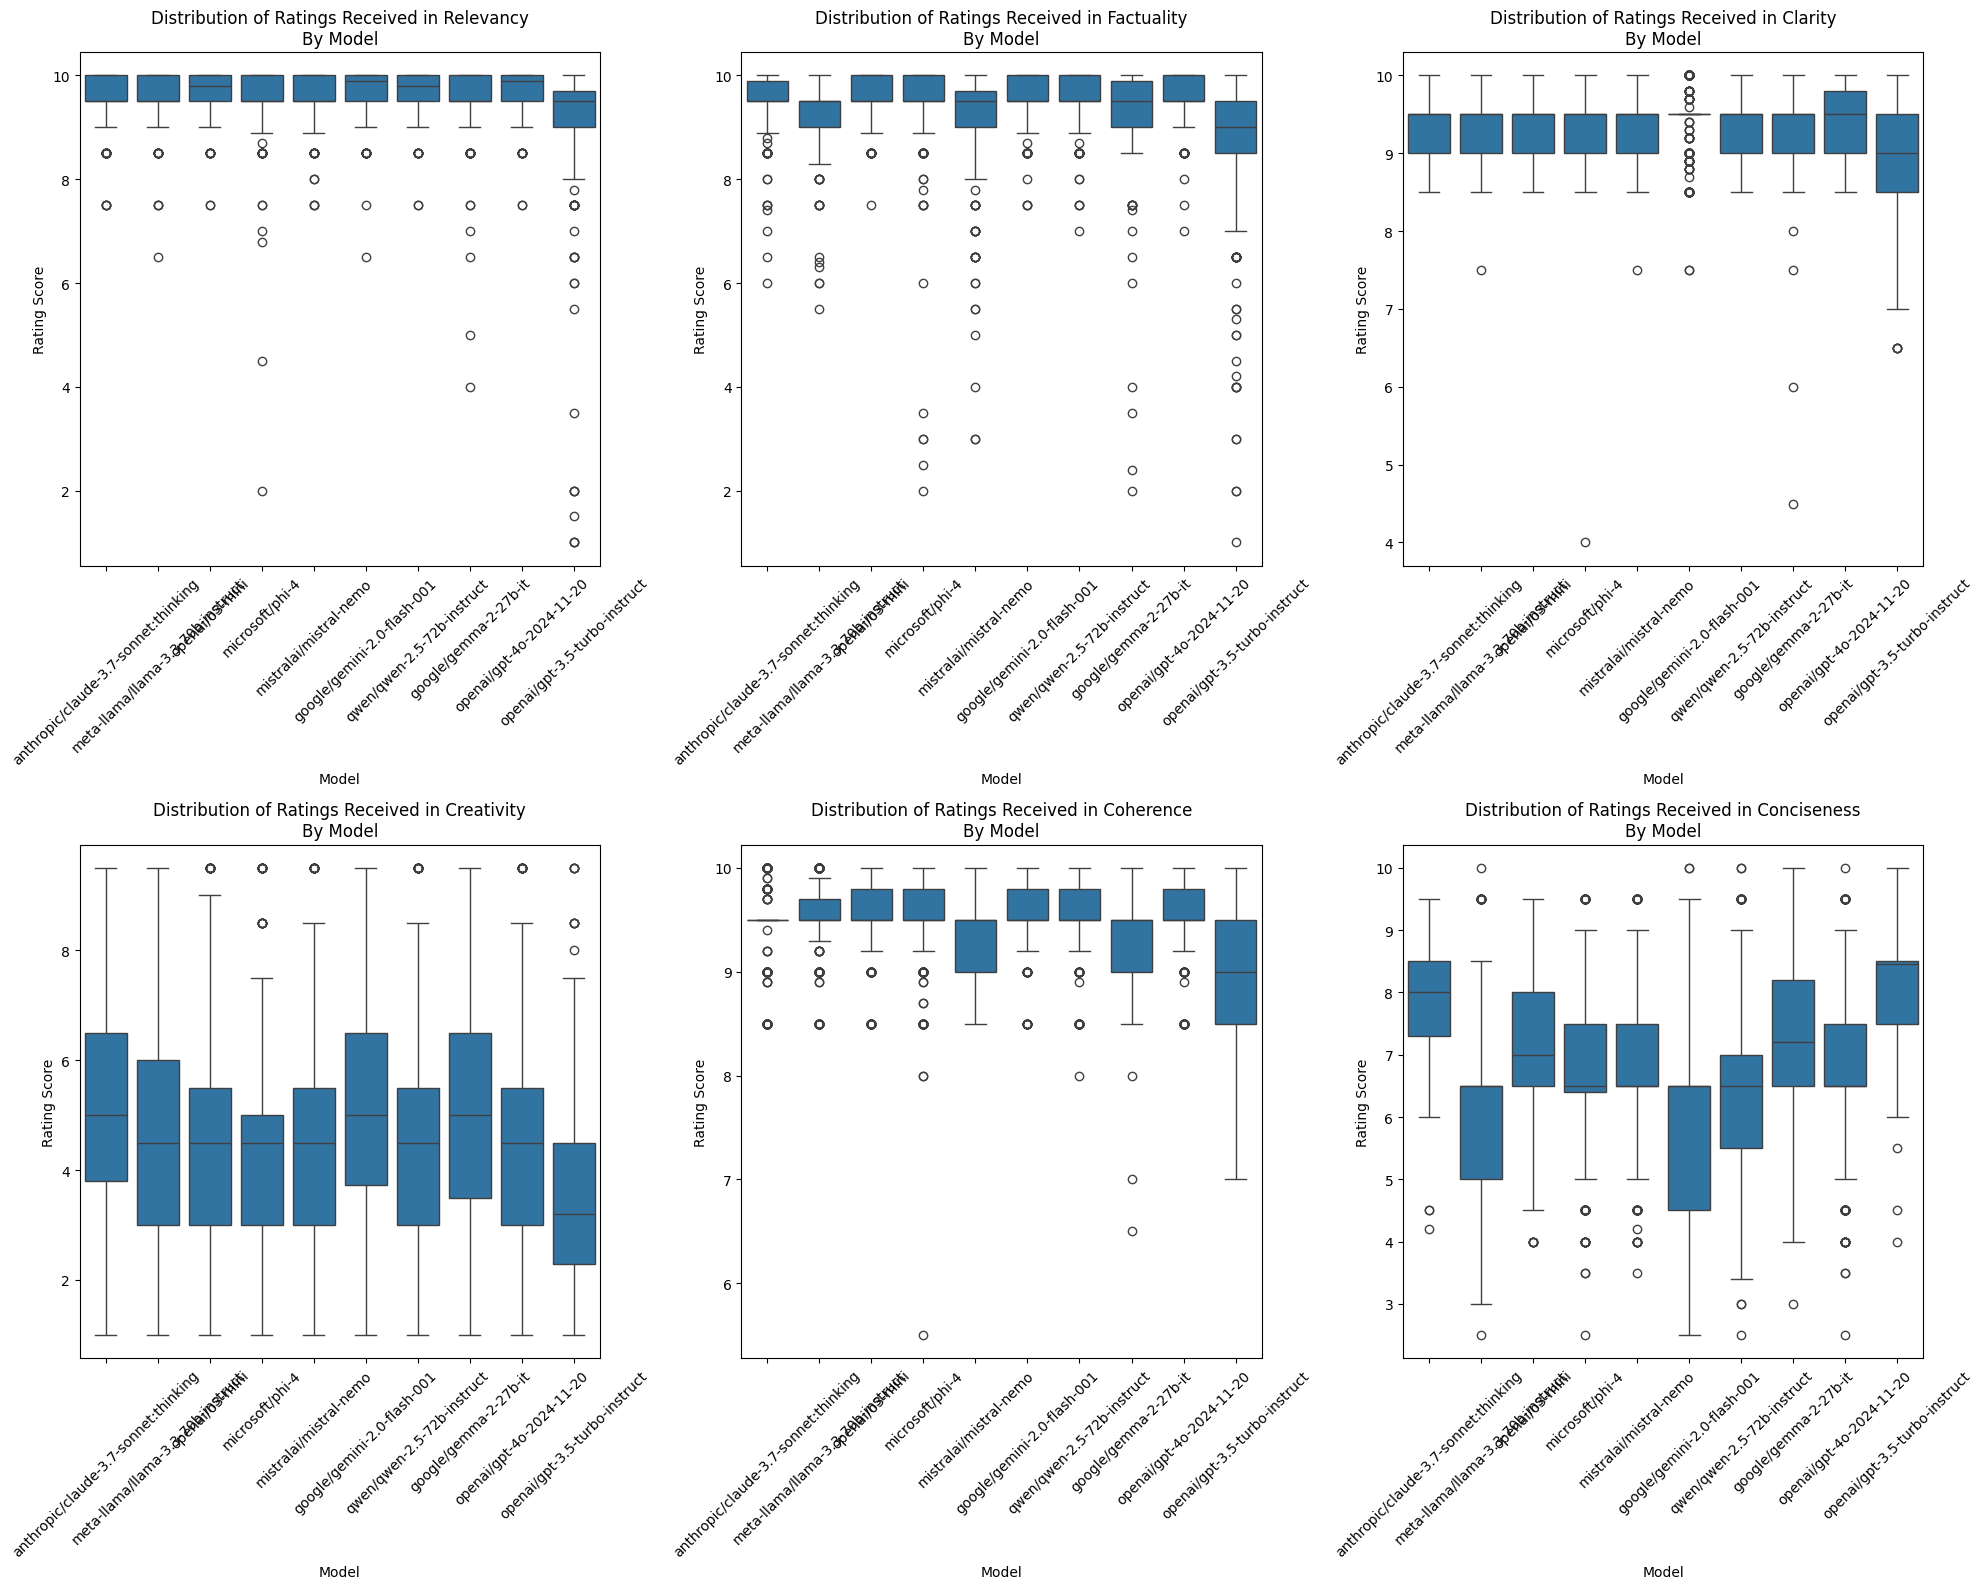


Standard deviation of ratings received by each model per criteria:
response_model  anthropic/claude-3.7-sonnet:thinking  \
criteria                                               
Clarity                                         0.46   
Coherence                                       0.43   
Conciseness                                     0.99   
Creativity                                      1.87   
Factuality                                      0.51   
Relevancy                                       0.43   

response_model  google/gemini-2.0-flash-001  google/gemma-2-27b-it  \
criteria                                                             
Clarity                                0.42                   0.53   
Coherence                              0.31                   0.45   
Conciseness                            1.72                   1.24   
Creativity                             2.05                   1.88   
Factuality                             0.43                   0

In [28]:
# Create figure with subplots for each criteria showing boxplots of received ratings by model
plt.figure(figsize=(20,16))

# Get unique models and criteria 
models = qa_lm_df['response_model'].unique()
criteria_list = qa_lm_df['criteria'].unique()

# Create subplot for each criteria
for i, criteria in enumerate(criteria_list):
    criteria_ratings = qa_lm_df[qa_lm_df['criteria'] == criteria]
    
    plt.subplot(2, 3, i+1)
    
    # Create box plot for each model's received ratings
    sns.boxplot(data=criteria_ratings, x='response_model', y='judge_rating')
    
    plt.title(f'Distribution of Ratings Received in {criteria}\nBy Model')
    plt.ylabel('Rating Score')
    plt.xlabel('Model')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print standard deviation of ratings received by each model per criteria
print("\nStandard deviation of ratings received by each model per criteria:")
print(qa_lm_df.groupby(['criteria', 'response_model'])['judge_rating'].std().round(2).unstack())


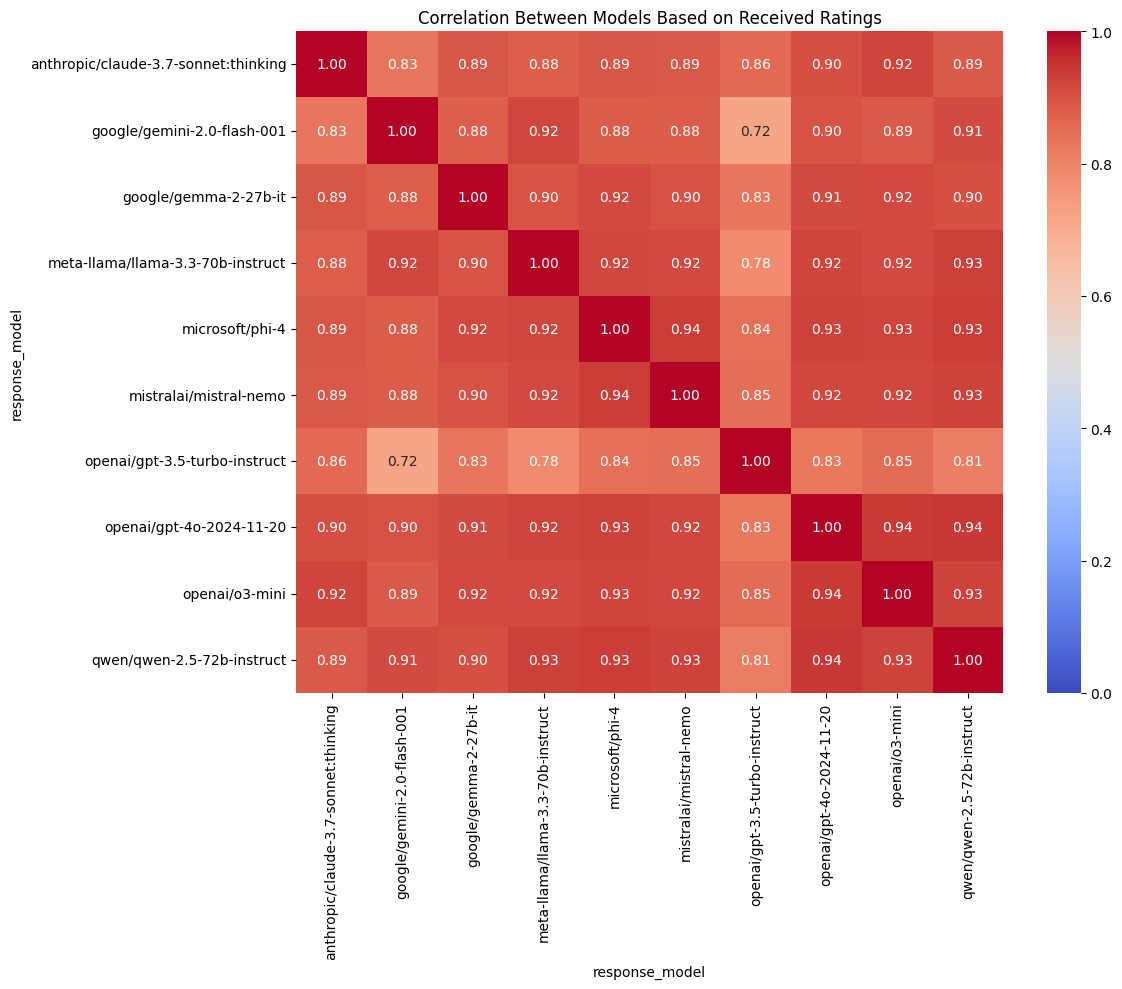

In [29]:
model_ratings = qa_lm_df.pivot_table(
    index=['question_id', 'criteria', 'judge_model'], 
    columns='response_model', 
    values='judge_rating'
)

# Calculate correlation between models based on received ratings
model_corr = model_ratings.corr()

# Visualization
plt.figure(figsize=(12, 10))
sns.heatmap(model_corr, 
            annot=True, 
            cmap='coolwarm',
            vmin=0.0,    # Adjusted minimum value
            vmax=1.0,
            fmt='.2f')   # Show 2 decimal places
plt.title('Correlation Between Models Based on Received Ratings')
plt.tight_layout()
plt.show()

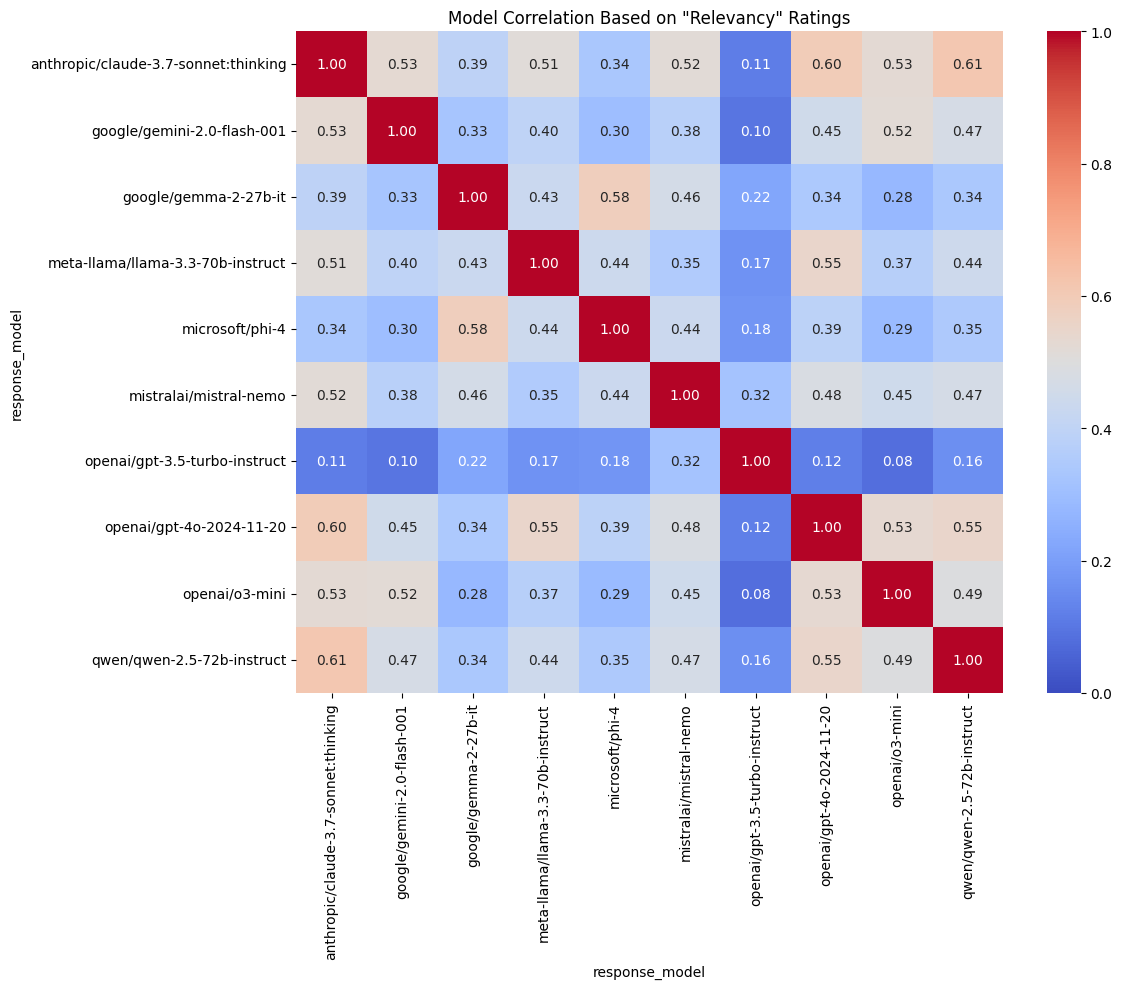

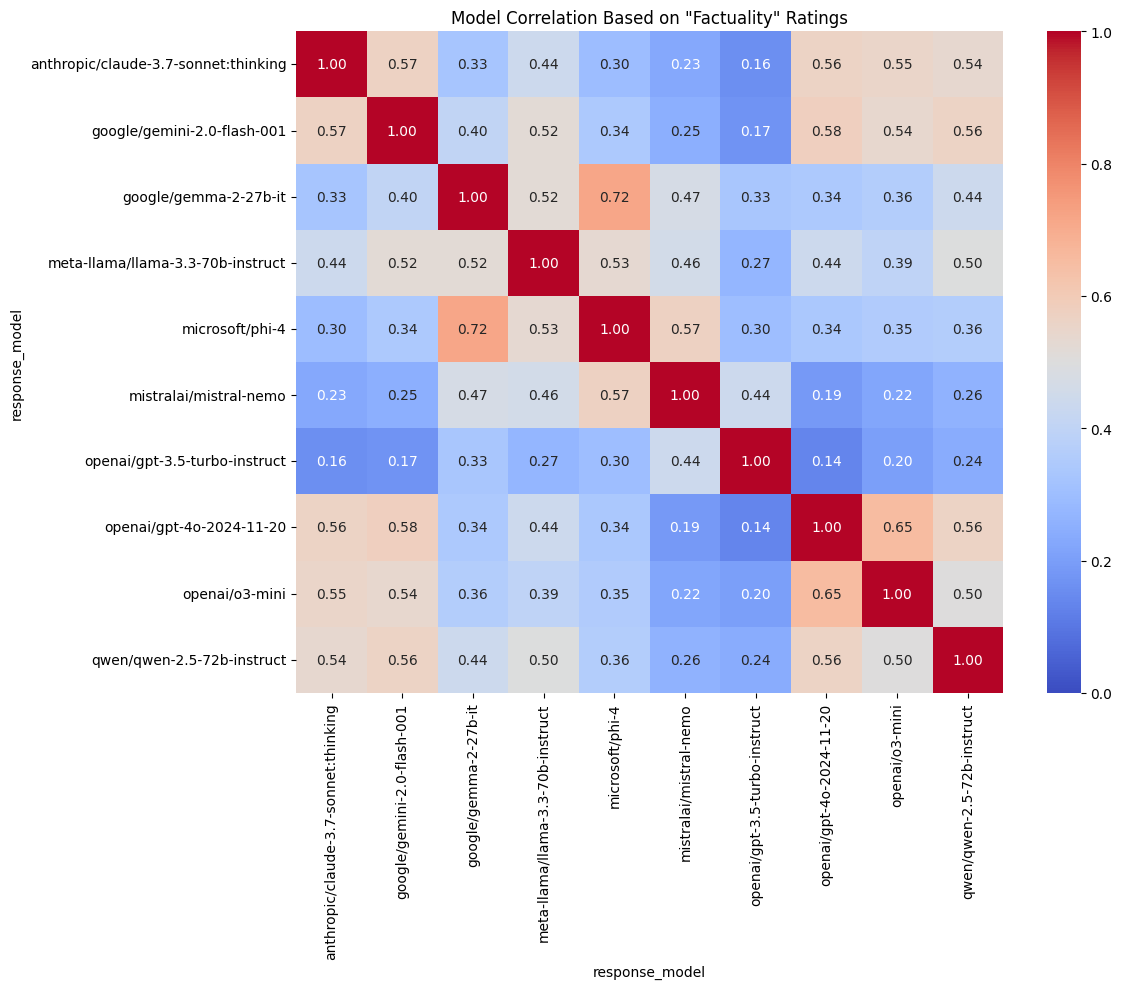

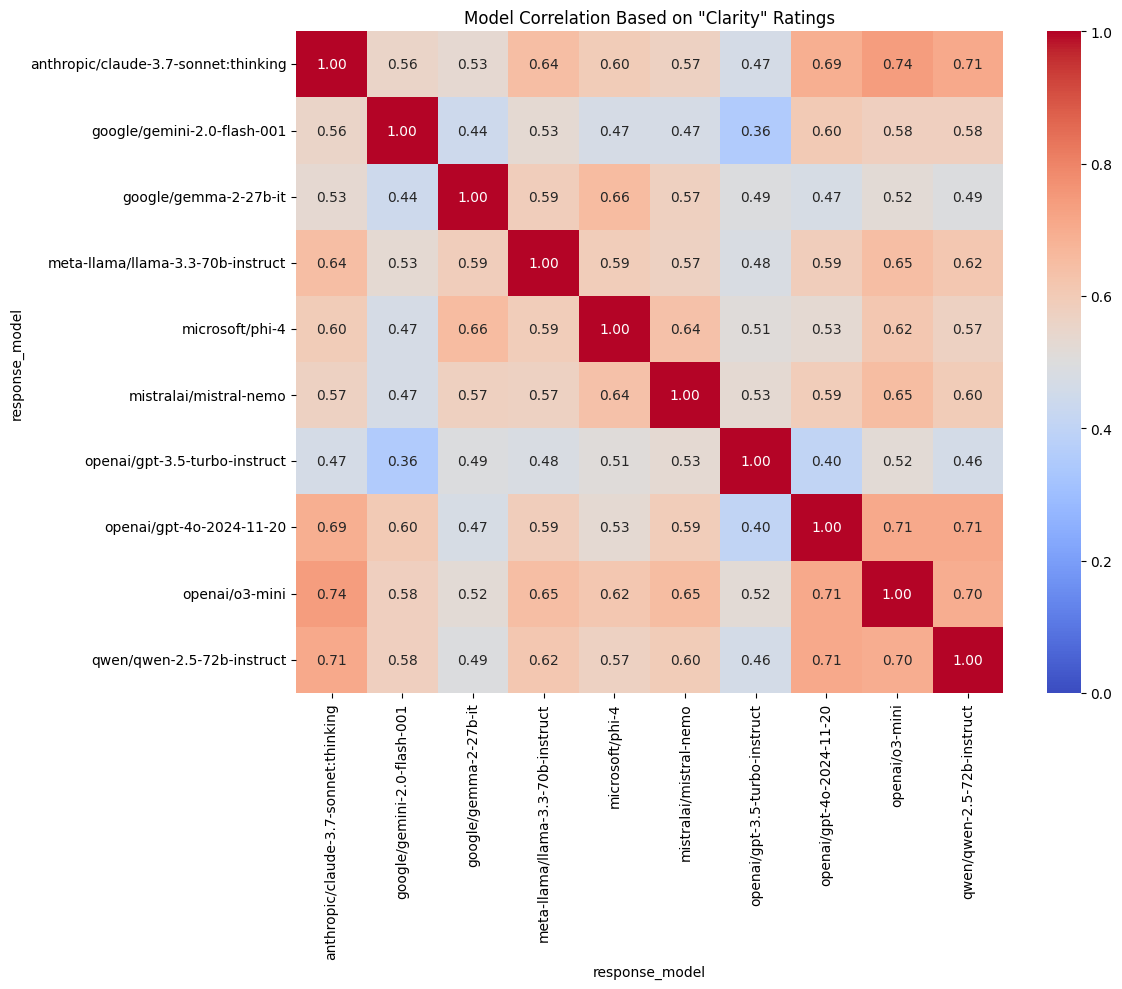

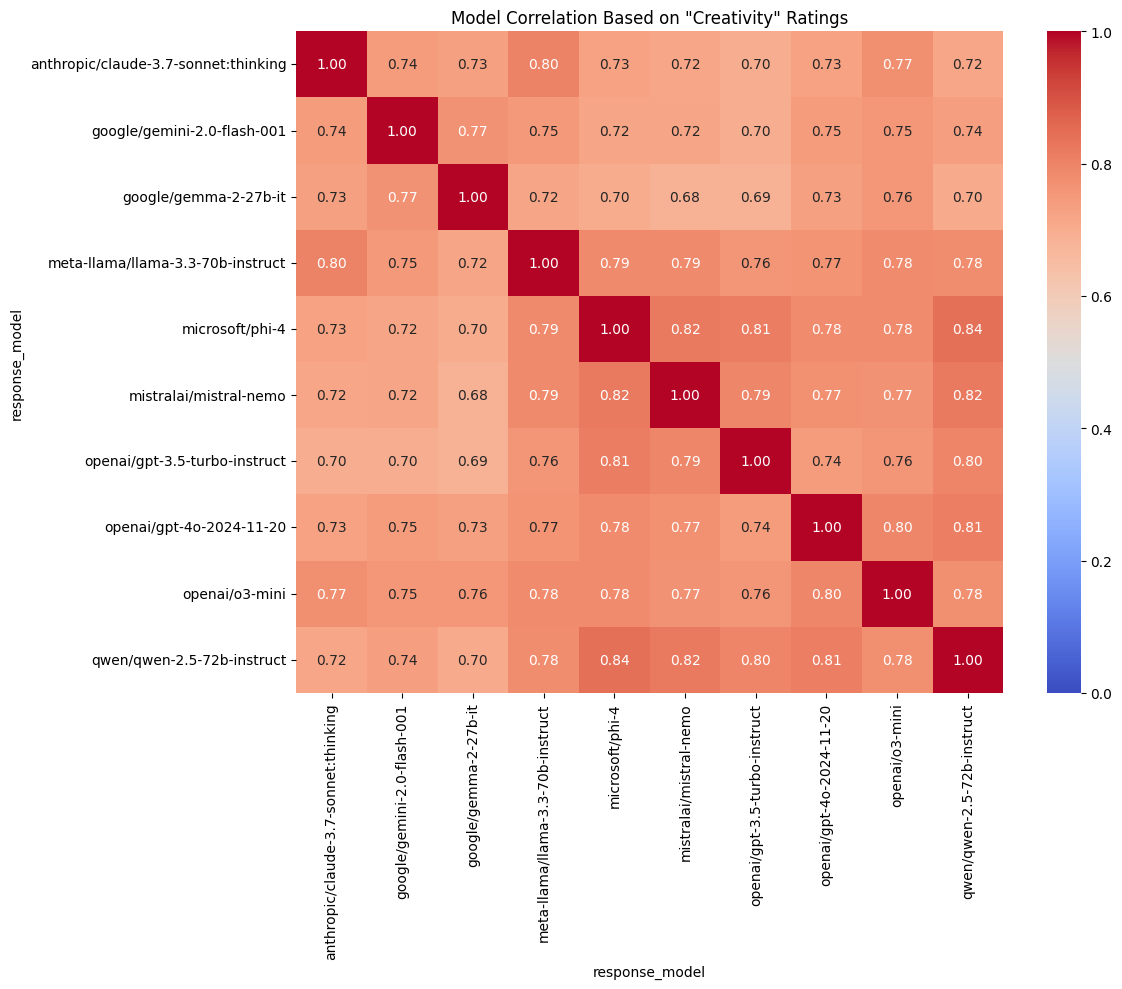

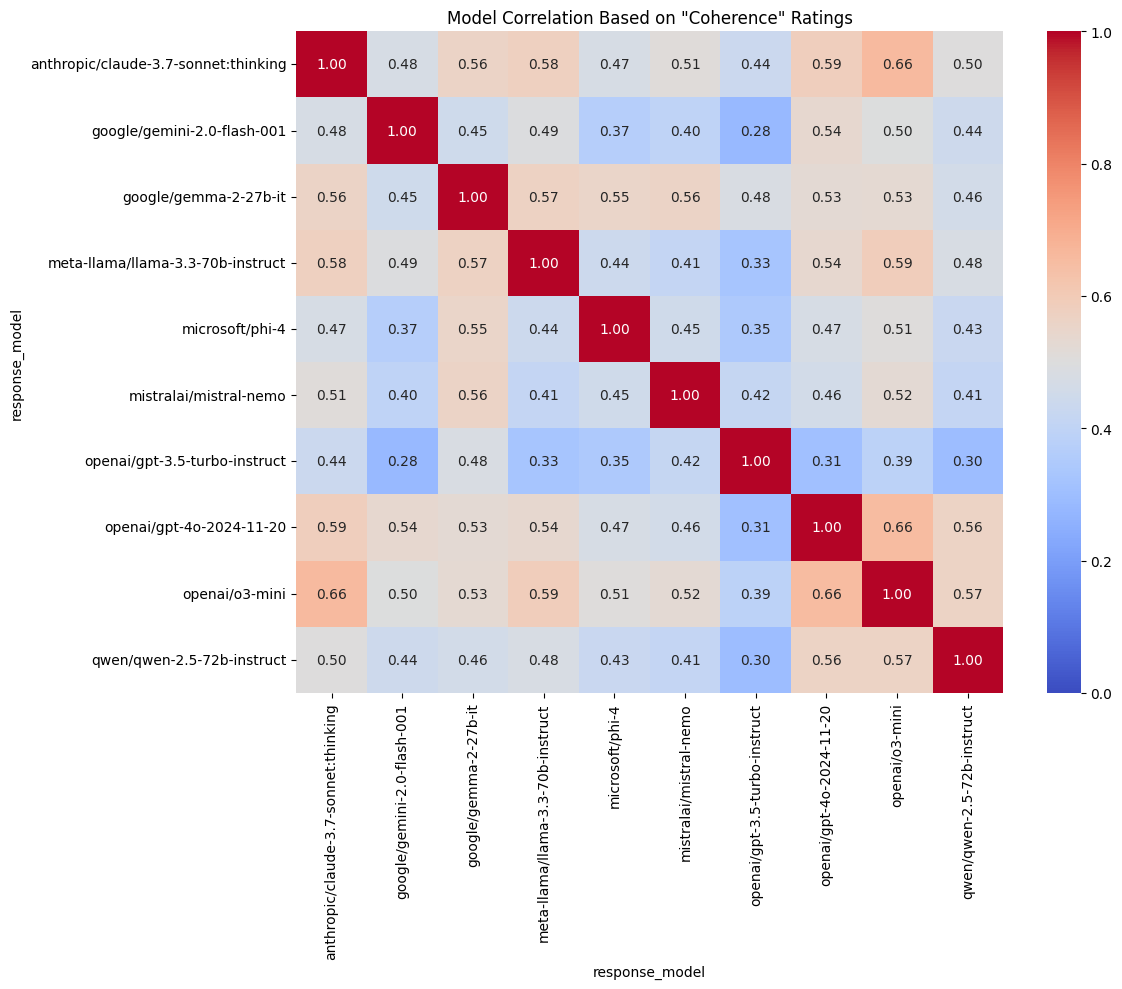

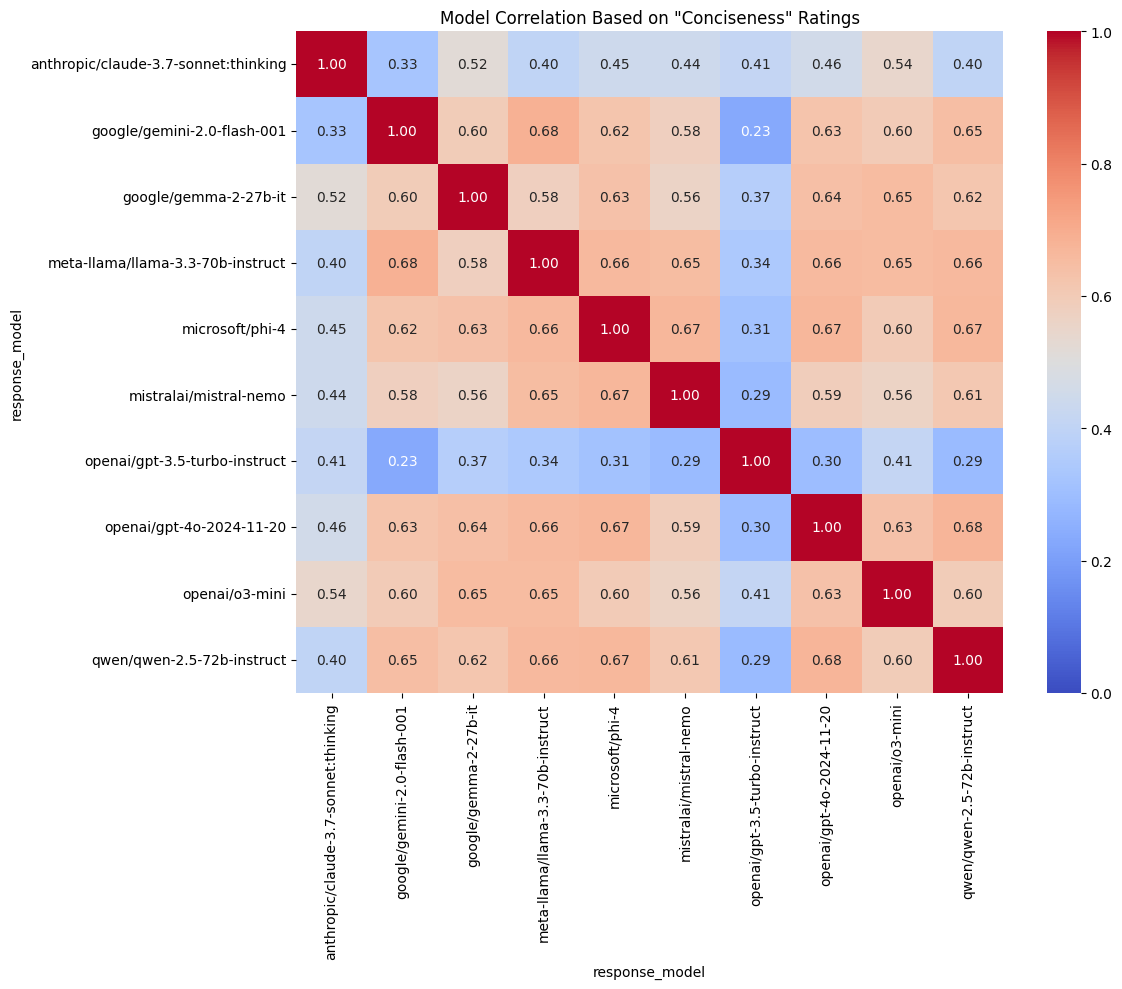

In [30]:
for criterion in qa_lm_df['criteria'].unique():
    # Filter data for this criterion
    criterion_data = qa_lm_df[qa_lm_df['criteria'] == criterion]
    
    # Create pivot table
    model_ratings = criterion_data.pivot_table(
        index=['question_id', 'judge_model'], 
        columns='response_model', 
        values='judge_rating'
    )
    
    # Calculate correlation
    model_corr = model_ratings.corr()
    
    # Visualization
    plt.figure(figsize=(12, 10))
    sns.heatmap(model_corr, 
                annot=True, 
                cmap='coolwarm',
                vmin=0.0,    # Adjusted minimum value
                vmax=1.0,
                fmt='.2f')   # Show 2 decimal places
    plt.title(f'Model Correlation Based on "{criterion}" Ratings')
    plt.tight_layout()
    plt.show()

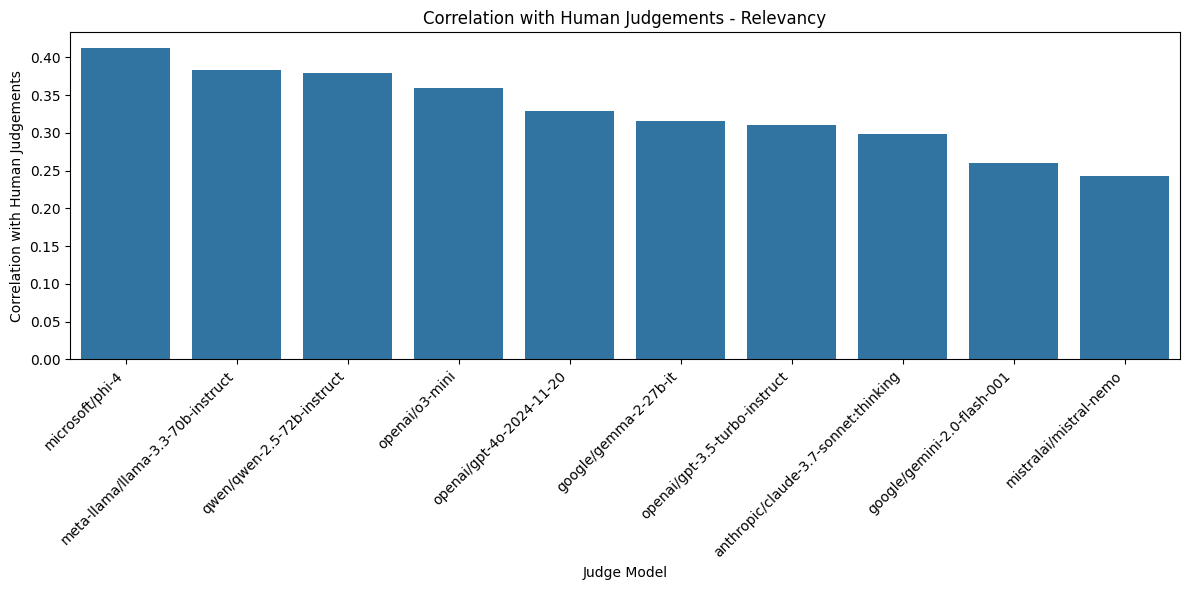


Correlations with Human Judgements for Relevancy:
judge_model
microsoft/phi-4                         0.412
meta-llama/llama-3.3-70b-instruct       0.383
qwen/qwen-2.5-72b-instruct              0.380
openai/o3-mini                          0.359
openai/gpt-4o-2024-11-20                0.329
google/gemma-2-27b-it                   0.316
openai/gpt-3.5-turbo-instruct           0.310
anthropic/claude-3.7-sonnet:thinking    0.299
google/gemini-2.0-flash-001             0.260
mistralai/mistral-nemo                  0.243
Name: human, dtype: float64


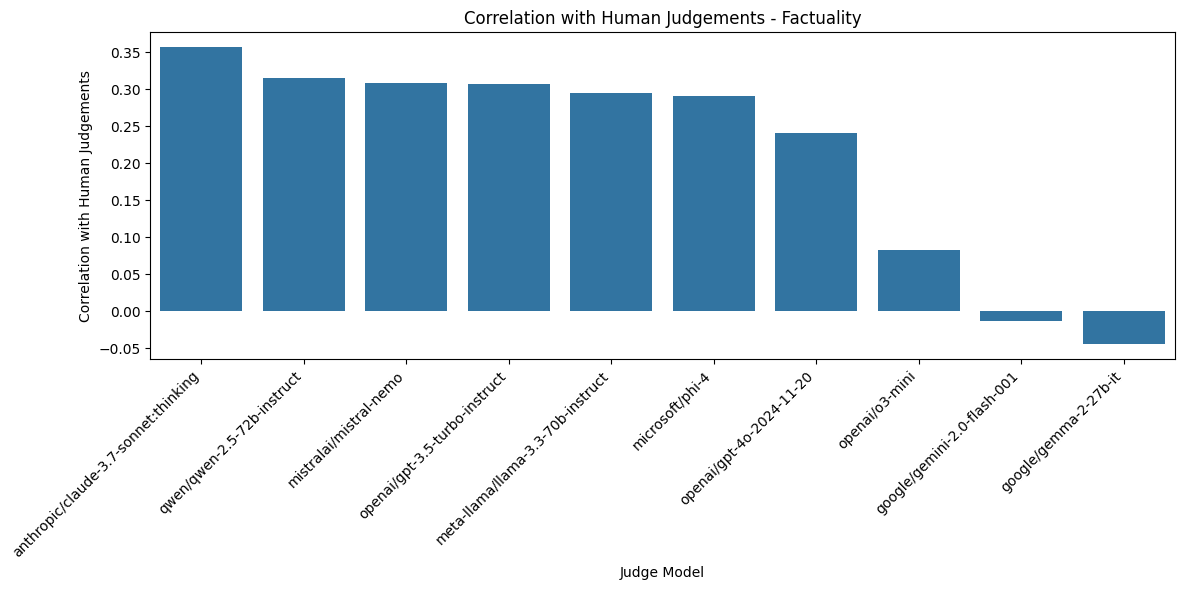


Correlations with Human Judgements for Factuality:
judge_model
anthropic/claude-3.7-sonnet:thinking    0.357
qwen/qwen-2.5-72b-instruct              0.315
mistralai/mistral-nemo                  0.309
openai/gpt-3.5-turbo-instruct           0.307
meta-llama/llama-3.3-70b-instruct       0.296
microsoft/phi-4                         0.292
openai/gpt-4o-2024-11-20                0.241
openai/o3-mini                          0.082
google/gemini-2.0-flash-001            -0.013
google/gemma-2-27b-it                  -0.045
Name: human, dtype: float64


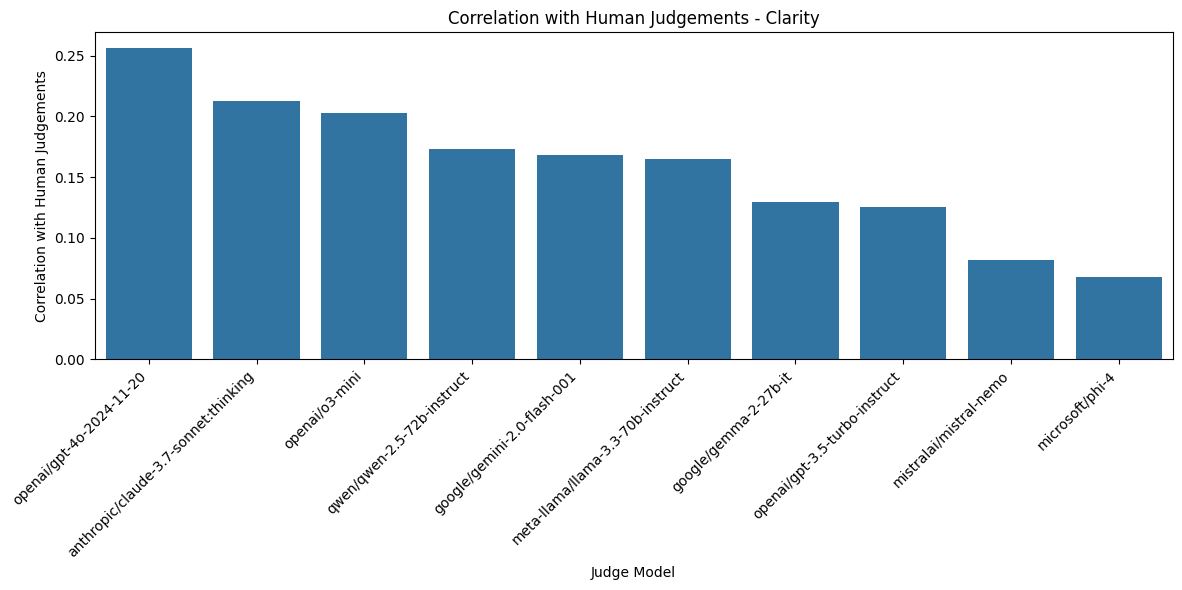


Correlations with Human Judgements for Clarity:
judge_model
openai/gpt-4o-2024-11-20                0.256
anthropic/claude-3.7-sonnet:thinking    0.212
openai/o3-mini                          0.202
qwen/qwen-2.5-72b-instruct              0.173
google/gemini-2.0-flash-001             0.168
meta-llama/llama-3.3-70b-instruct       0.164
google/gemma-2-27b-it                   0.130
openai/gpt-3.5-turbo-instruct           0.126
mistralai/mistral-nemo                  0.082
microsoft/phi-4                         0.068
Name: human, dtype: float64


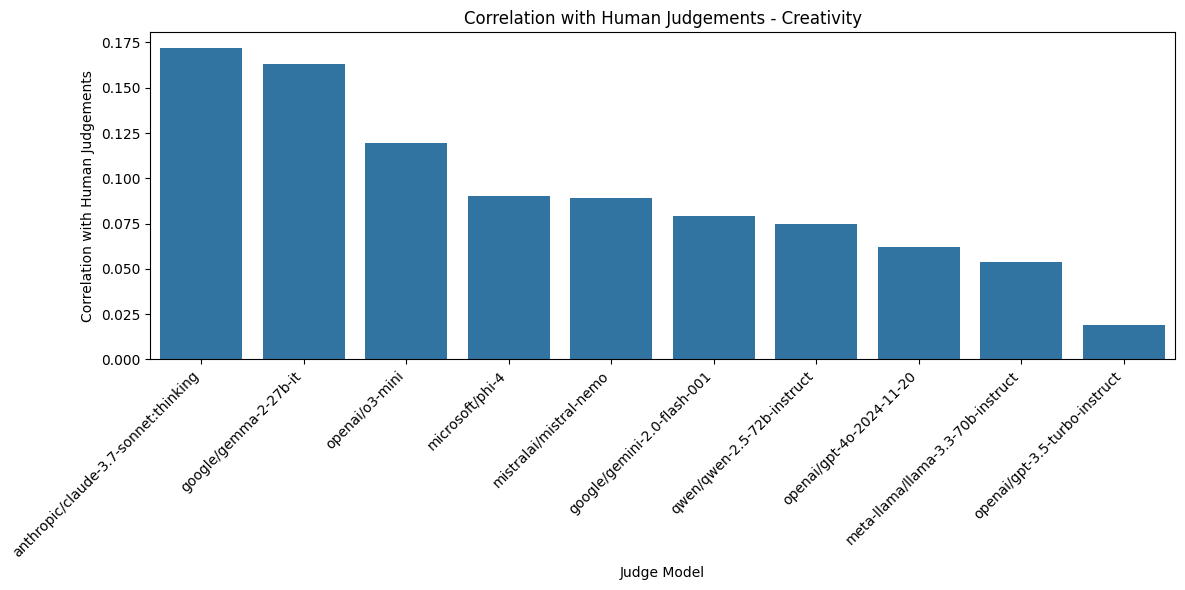


Correlations with Human Judgements for Creativity:
judge_model
anthropic/claude-3.7-sonnet:thinking    0.172
google/gemma-2-27b-it                   0.163
openai/o3-mini                          0.120
microsoft/phi-4                         0.090
mistralai/mistral-nemo                  0.089
google/gemini-2.0-flash-001             0.079
qwen/qwen-2.5-72b-instruct              0.075
openai/gpt-4o-2024-11-20                0.062
meta-llama/llama-3.3-70b-instruct       0.054
openai/gpt-3.5-turbo-instruct           0.019
Name: human, dtype: float64


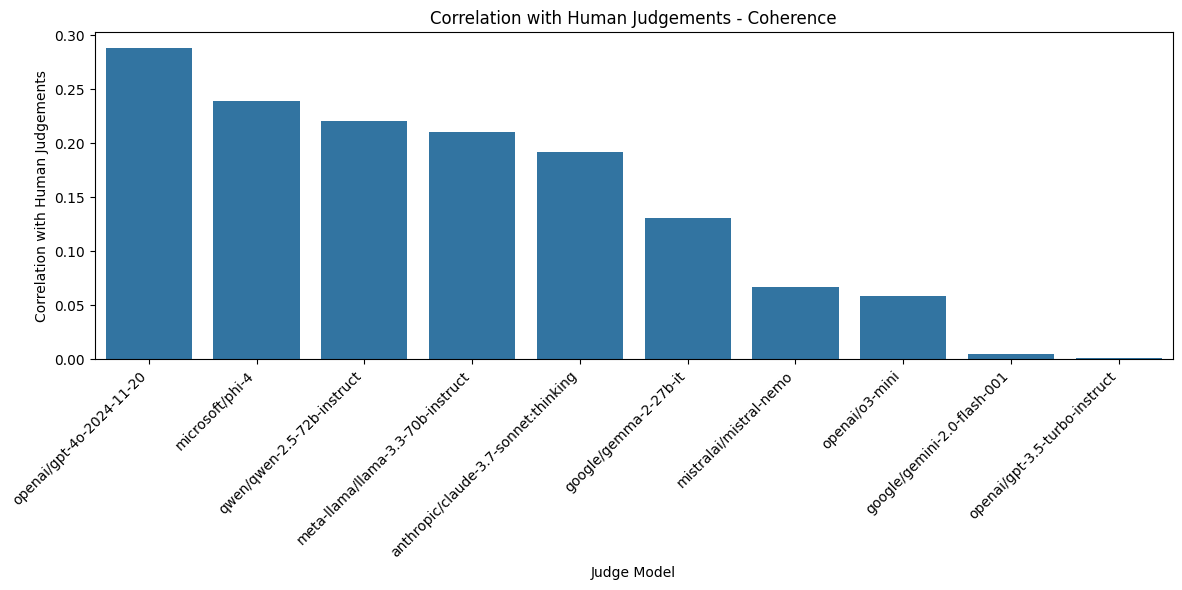


Correlations with Human Judgements for Coherence:
judge_model
openai/gpt-4o-2024-11-20                0.288
microsoft/phi-4                         0.239
qwen/qwen-2.5-72b-instruct              0.221
meta-llama/llama-3.3-70b-instruct       0.211
anthropic/claude-3.7-sonnet:thinking    0.192
google/gemma-2-27b-it                   0.131
mistralai/mistral-nemo                  0.067
openai/o3-mini                          0.059
google/gemini-2.0-flash-001             0.005
openai/gpt-3.5-turbo-instruct           0.001
Name: human, dtype: float64


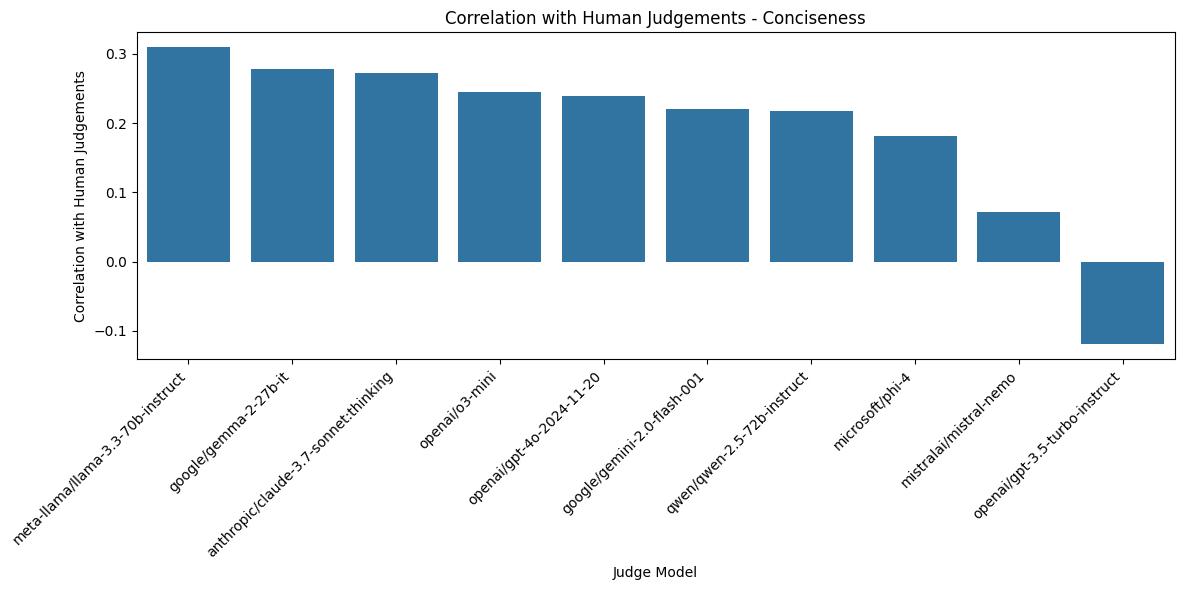


Correlations with Human Judgements for Conciseness:
judge_model
meta-llama/llama-3.3-70b-instruct       0.309
google/gemma-2-27b-it                   0.277
anthropic/claude-3.7-sonnet:thinking    0.272
openai/o3-mini                          0.245
openai/gpt-4o-2024-11-20                0.239
google/gemini-2.0-flash-001             0.221
qwen/qwen-2.5-72b-instruct              0.217
microsoft/phi-4                         0.181
mistralai/mistral-nemo                  0.072
openai/gpt-3.5-turbo-instruct          -0.120
Name: human, dtype: float64


In [31]:
# Which models are most simlar to human judgements?

# Get correlations between human and model judgements for each criterion
for criterion in qa_combo_filtered_df['criteria'].unique():
    # Filter data for this criterion
    criterion_data = qa_combo_filtered_df[qa_combo_filtered_df['criteria'] == criterion]
    
    # Create pivot table with human and model judgements
    judge_ratings = criterion_data.pivot_table(
        index=['question_id', 'response_id'], 
        columns='judge_model',
        values='judge_rating'
    )
    
    # Calculate correlations with human judgements
    human_correlations = judge_ratings.corr()['human'].sort_values(ascending=False)
    
    # Remove self-correlation
    human_correlations = human_correlations[human_correlations.index != 'human']
    
    # Visualization
    plt.figure(figsize=(12, 6))
    sns.barplot(x=human_correlations.index, y=human_correlations.values)
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Correlation with Human Judgements - {criterion}')
    plt.xlabel('Judge Model')
    plt.ylabel('Correlation with Human Judgements')
    plt.tight_layout()
    plt.show()
    
    print(f"\nCorrelations with Human Judgements for {criterion}:")
    print(human_correlations.round(3))


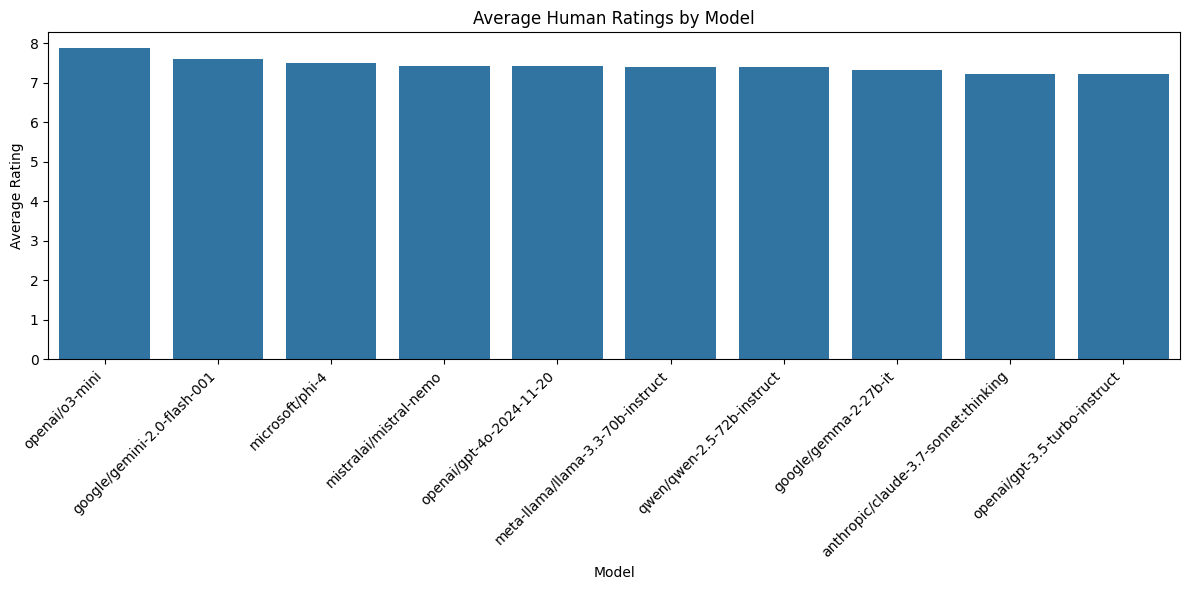


Average Human Ratings by Model:
response_model
openai/o3-mini                          7.883333
google/gemini-2.0-flash-001             7.591667
microsoft/phi-4                         7.491667
mistralai/mistral-nemo                  7.420833
openai/gpt-4o-2024-11-20                7.413333
meta-llama/llama-3.3-70b-instruct       7.400000
qwen/qwen-2.5-72b-instruct              7.391667
google/gemma-2-27b-it                   7.334167
anthropic/claude-3.7-sonnet:thinking    7.225000
openai/gpt-3.5-turbo-instruct           7.210084
Name: judge_rating, dtype: float64


In [37]:
# Get average human judgements per model
human_avg_ratings = qa_human_df.groupby('response_model')['judge_rating'].mean().sort_values(ascending=False)

# Create bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=human_avg_ratings.index, y=human_avg_ratings.values)
plt.xticks(rotation=45, ha='right')
plt.title('Average Human Ratings by Model')
plt.xlabel('Model')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()

# Display the actual values
print("\nAverage Human Ratings by Model:")
print(human_avg_ratings)


/var/folders/4d/c4bjvqc12m5gv209fjx295j40000gn/T/ipykernel_99696/850263939.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(data.index, rotation=45, ha='right')
/var/folders/4d/c4bjvqc12m5gv209fjx295j40000gn/T/ipykernel_99696/850263939.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(data.index, rotation=45, ha='right')
/var/folders/4d/c4bjvqc12m5gv209fjx295j40000gn/T/ipykernel_99696/850263939.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(data.index, rotation=45, ha='right')
/var/folders/4d/c4bjvqc12m5gv209fjx295j40000gn/T/ipykernel_99696/850263939.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_tick

<Figure size 2000x1600 with 0 Axes>

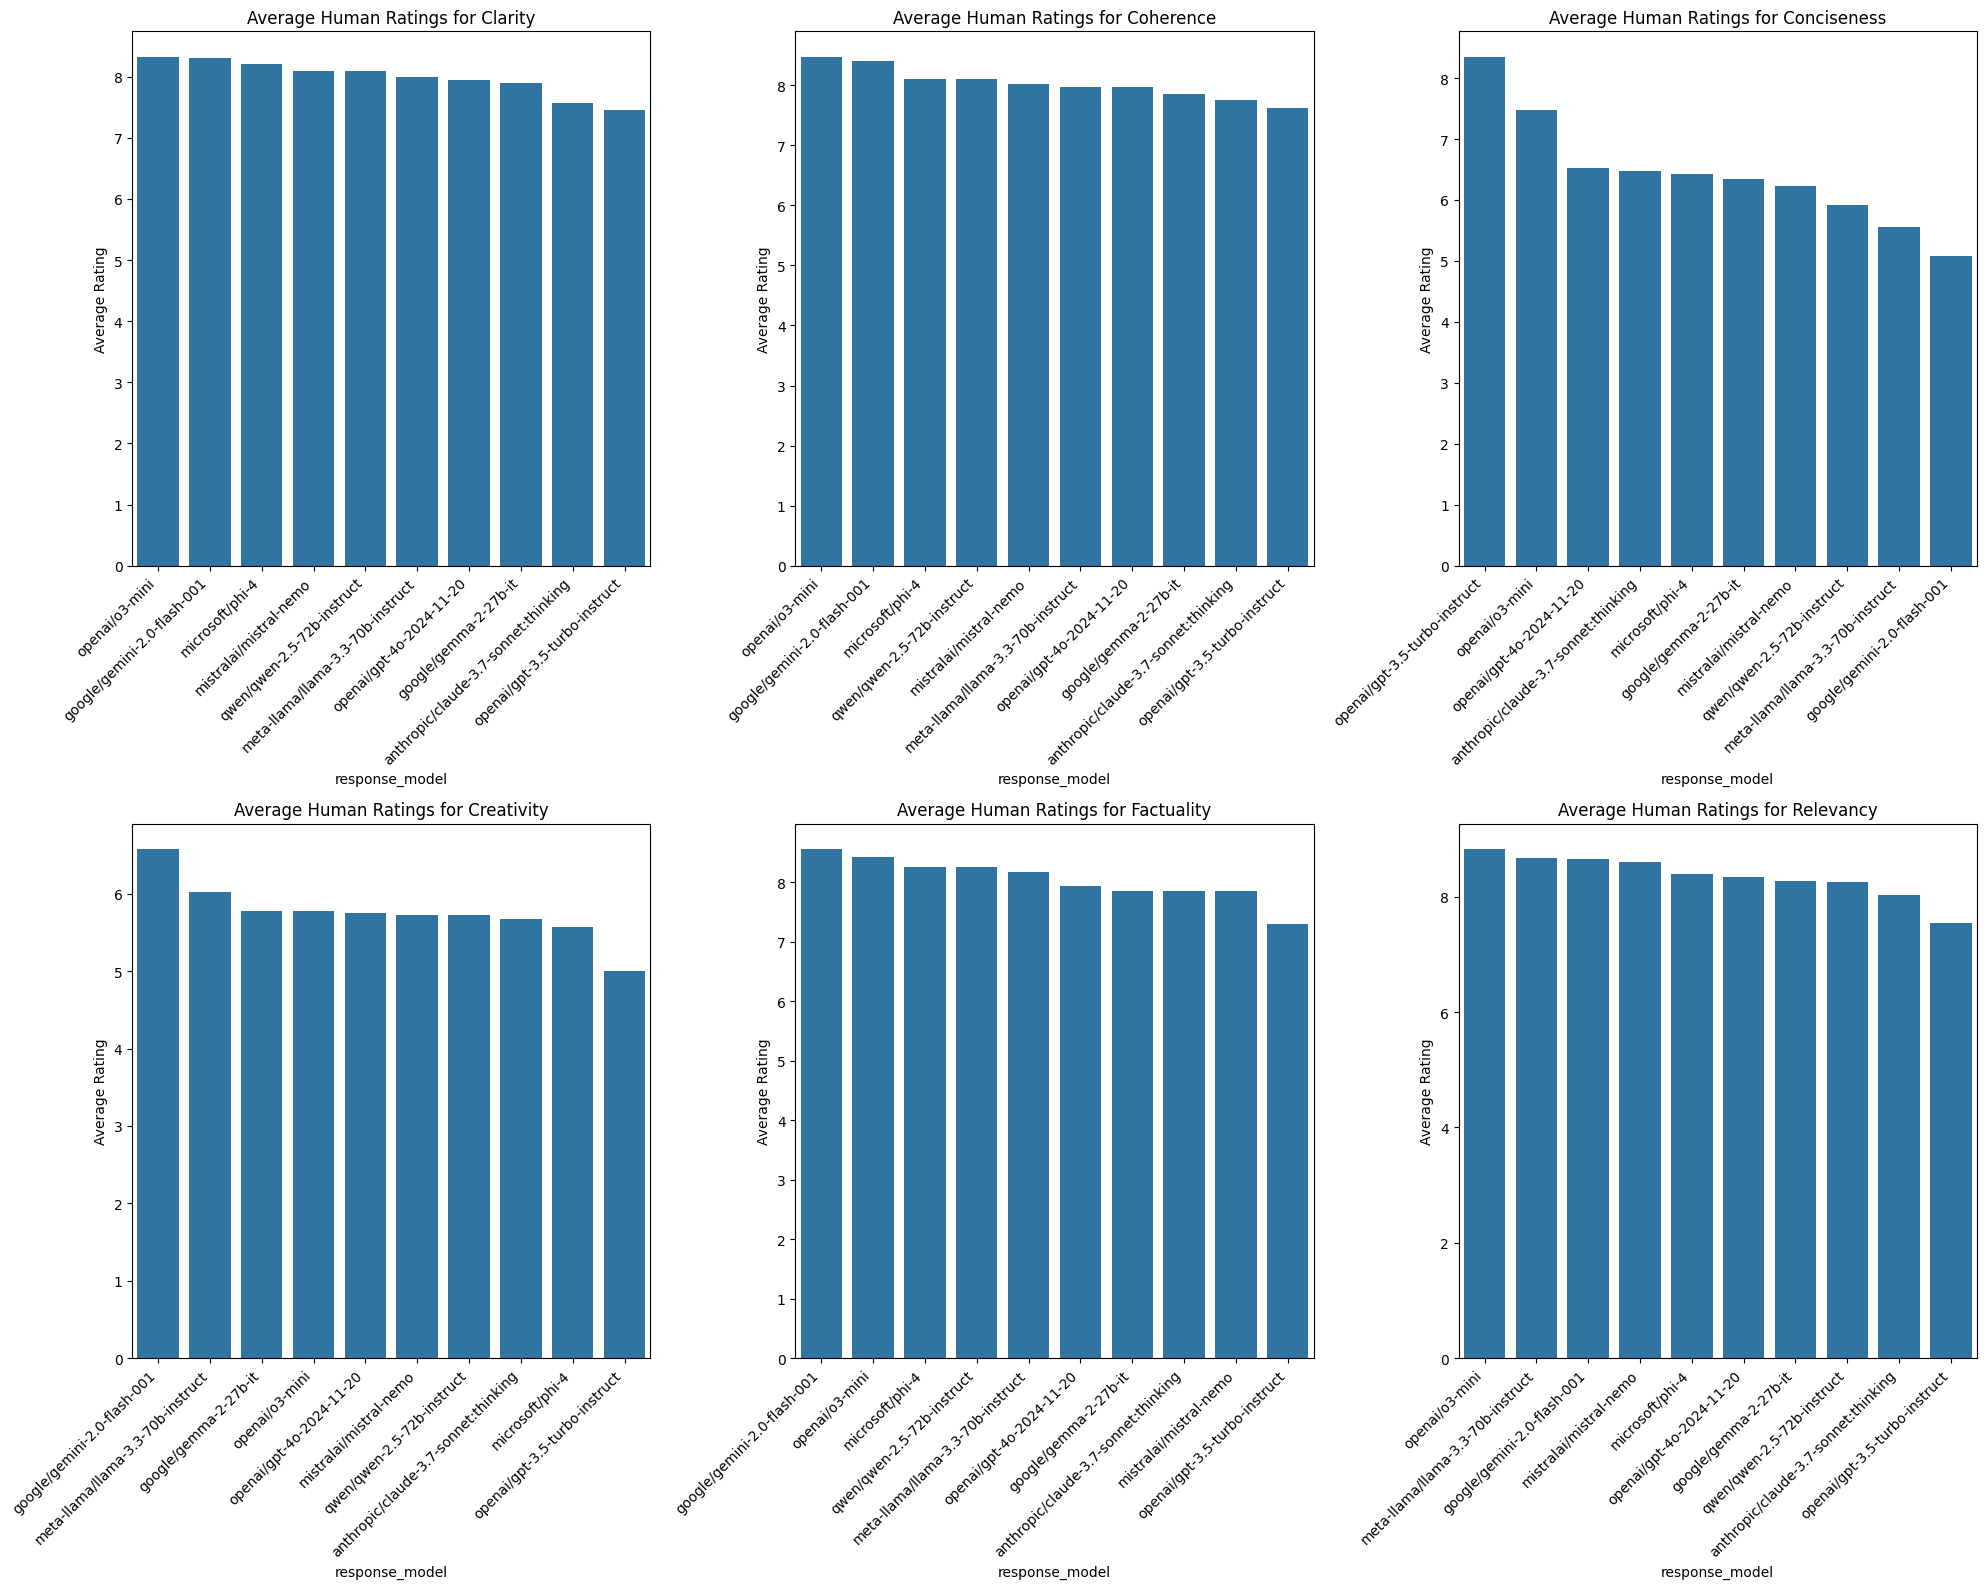


Average Human Ratings by Model and Criteria:
criteria                              Clarity  Coherence  Conciseness  \
response_model                                                          
anthropic/claude-3.7-sonnet:thinking    7.575      7.750        6.475   
google/gemini-2.0-flash-001             8.300      8.400        5.075   
google/gemma-2-27b-it                   7.900      7.850        6.350   
meta-llama/llama-3.3-70b-instruct       8.000      7.975        5.550   
microsoft/phi-4                         8.200      8.100        6.425   
mistralai/mistral-nemo                  8.100      8.025        6.225   
openai/gpt-3.5-turbo-instruct           7.450      7.625        8.350   
openai/gpt-4o-2024-11-20                7.950      7.975        6.525   
openai/o3-mini                          8.325      8.475        7.475   
qwen/qwen-2.5-72b-instruct              8.100      8.100        5.925   

criteria                              Creativity  Factuality  Relevancy  
res

In [38]:
# Get average human judgements per model and criteria
human_avg_by_criteria = qa_human_df.groupby(['response_model', 'criteria'])['judge_rating'].mean().unstack()

# Create bar plot with criteria side by side
plt.figure(figsize=(20, 16))

# Create subplots for each criteria
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 16))
axes = axes.flatten()

# Plot each criteria in its own subplot
for i, criteria in enumerate(human_avg_by_criteria.columns):
    data = human_avg_by_criteria[criteria].sort_values(ascending=False)
    sns.barplot(x=data.index, y=data.values, ax=axes[i])
    axes[i].set_title(f'Average Human Ratings for {criteria}')
    axes[i].set_xticklabels(data.index, rotation=45, ha='right')
    axes[i].set_ylabel('Average Rating')

plt.tight_layout()
plt.show()

# Display the actual values
print("\nAverage Human Ratings by Model and Criteria:")
print(human_avg_by_criteria.round(3))


/var/folders/4d/c4bjvqc12m5gv209fjx295j40000gn/T/ipykernel_99696/2873594013.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  annotator_ratings = qa_human_df.groupby(['response_model', 'annotator_group'])['judge_rating'].mean().unstack()


<Figure size 1200x600 with 0 Axes>

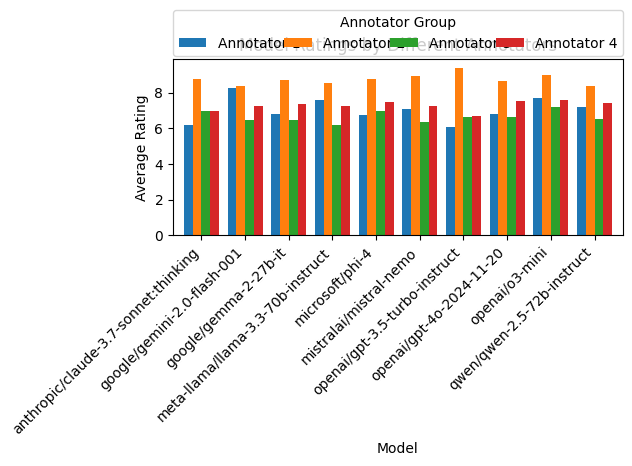

/var/folders/4d/c4bjvqc12m5gv209fjx295j40000gn/T/ipykernel_99696/2873594013.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  criteria_ratings = criteria_data.groupby(['response_model', 'annotator_group'])['judge_rating'].mean().unstack()
/var/folders/4d/c4bjvqc12m5gv209fjx295j40000gn/T/ipykernel_99696/2873594013.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  criteria_ratings = criteria_data.groupby(['response_model', 'annotator_group'])['judge_rating'].mean().unstack()
/var/folders/4d/c4bjvqc12m5gv209fjx295j40000gn/T/ipykernel_99696/2873594013.py:39: FutureWarning: The default of observed=False is d


Variability in Ratings Between Annotators (Standard Deviation):
response_model
openai/gpt-3.5-turbo-instruct           1.489
anthropic/claude-3.7-sonnet:thinking    1.108
mistralai/mistral-nemo                  1.096
meta-llama/llama-3.3-70b-instruct       0.990
google/gemma-2-27b-it                   0.989
openai/gpt-4o-2024-11-20                0.916
google/gemini-2.0-flash-001             0.913
microsoft/phi-4                         0.903
openai/o3-mini                          0.774
qwen/qwen-2.5-72b-instruct              0.753
dtype: float64


/var/folders/4d/c4bjvqc12m5gv209fjx295j40000gn/T/ipykernel_99696/2873594013.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  criteria_ratings = criteria_data.groupby(['response_model', 'annotator_group'])['judge_rating'].mean().unstack()
/var/folders/4d/c4bjvqc12m5gv209fjx295j40000gn/T/ipykernel_99696/2873594013.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  criteria_ratings = criteria_data.groupby(['response_model', 'annotator_group'])['judge_rating'].mean().unstack()
/var/folders/4d/c4bjvqc12m5gv209fjx295j40000gn/T/ipykernel_99696/2873594013.py:39: FutureWarning: The default of observed=False is d

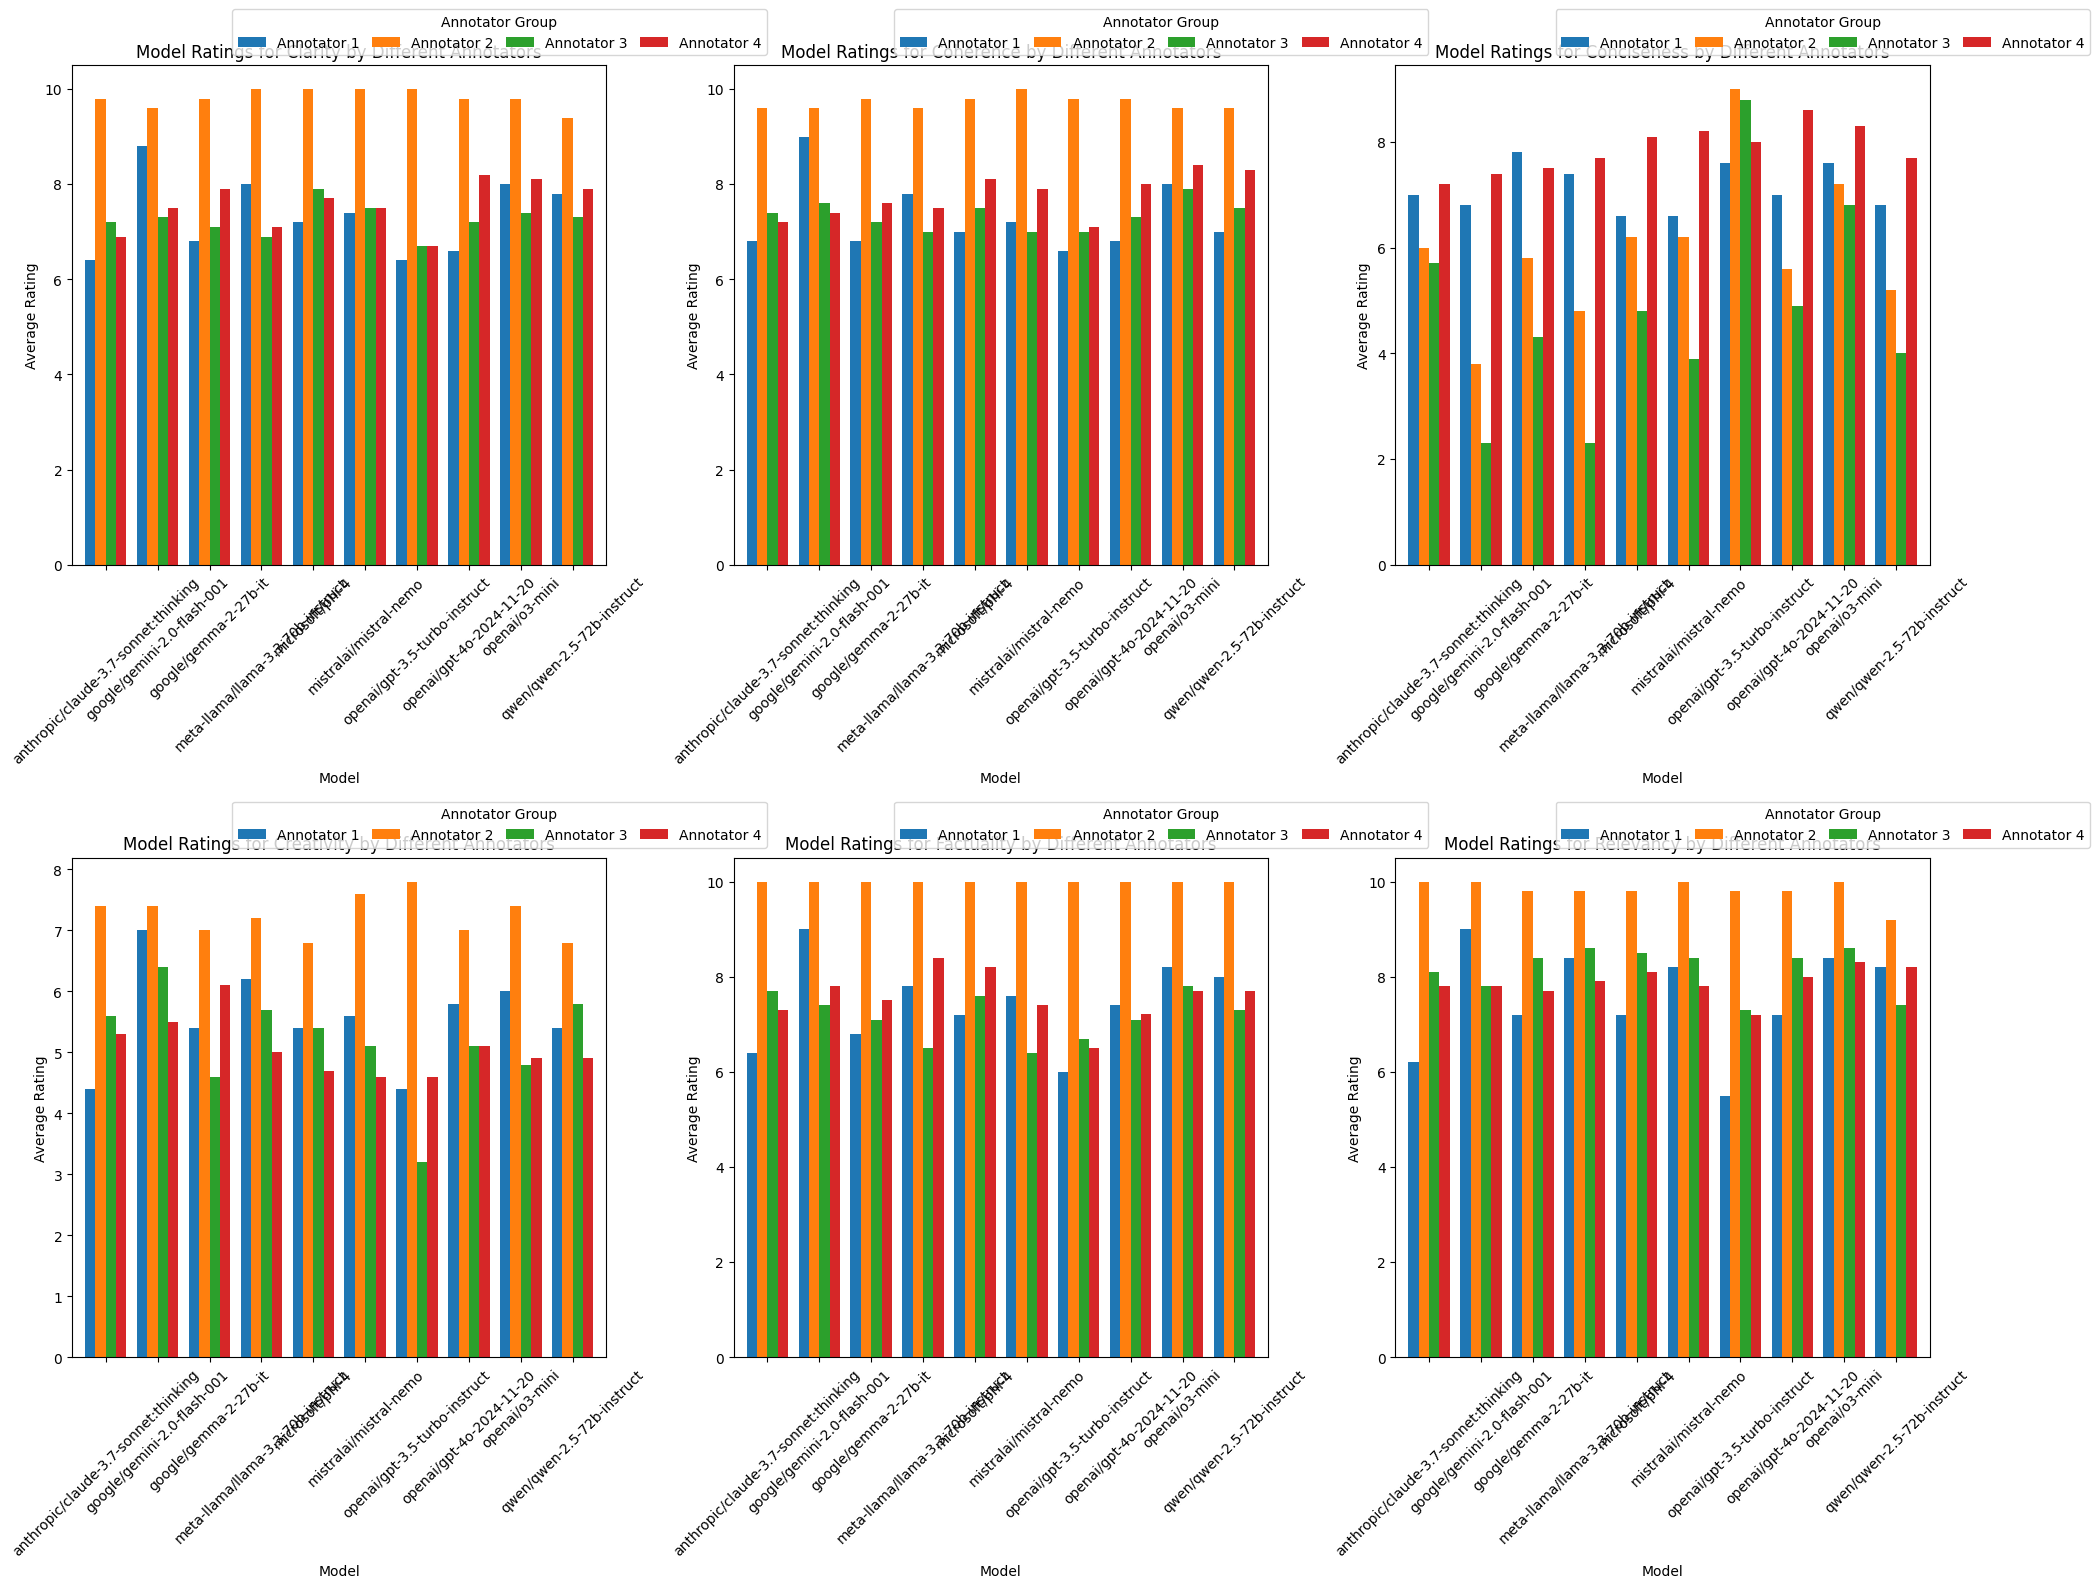


Overall Average Rating by Annotator:
annotator_group
Annotator 1    7.057
Annotator 2    8.763
Annotator 3    6.642
Annotator 4    7.282
Name: judge_rating, dtype: float64


/var/folders/4d/c4bjvqc12m5gv209fjx295j40000gn/T/ipykernel_99696/2873594013.py:56: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(qa_human_df.groupby('annotator_group')['judge_rating'].mean().round(3))


In [40]:
# Group questions by annotator blocks (0-4, 5-9, 10-14, 15-19)
qa_human_df['annotator_group'] = pd.cut(qa_human_df['question_id'], 
                                       bins=[-1, 4, 9, 14, 19], 
                                       labels=['Annotator 1', 'Annotator 2', 'Annotator 3', 'Annotator 4'])

# Calculate average ratings per model per annotator
annotator_ratings = qa_human_df.groupby(['response_model', 'annotator_group'])['judge_rating'].mean().unstack()

# Create bar plot with annotators side by side
plt.figure(figsize=(12, 6))
annotator_ratings.plot(kind='bar', width=0.8)
plt.title('Model Ratings by Different Annotators')
plt.xlabel('Model')
plt.ylabel('Average Rating')
plt.legend(title='Annotator Group', bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
          ncol=4, mode="expand", borderaxespad=0.)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Calculate the standard deviation of ratings between annotators for each model
# This helps identify which models had the most disagreement between annotators
annotator_std = annotator_ratings.std(axis=1).sort_values(ascending=False)

print("\nVariability in Ratings Between Annotators (Standard Deviation):")
print(annotator_std.round(3))

# Create a grid of bar plots showing how different annotators rated each model on each criteria
# This visualization helps identify:
# 1. If certain annotators were consistently more harsh/lenient
# 2. If there was more agreement on certain criteria
# 3. Which models had the most consistent/inconsistent ratings across annotators
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 16))
axes = axes.flatten()

for i, criteria in enumerate(qa_human_df['criteria'].unique()):
    # For each criteria, calculate the average rating given by each annotator for each model
    criteria_data = qa_human_df[qa_human_df['criteria'] == criteria]
    criteria_ratings = criteria_data.groupby(['response_model', 'annotator_group'])['judge_rating'].mean().unstack()
    
    # Create grouped bar plot where each group is a model and bars represent different annotators
    criteria_ratings.plot(kind='bar', ax=axes[i], width=0.8)
    axes[i].set_title(f'Model Ratings for {criteria} by Different Annotators')
    axes[i].set_xlabel('Model')
    axes[i].set_ylabel('Average Rating')
    axes[i].legend(title='Annotator Group', bbox_to_anchor=(0.3, 1.02, 1., .102), loc='lower left',
                  ncol=4, mode="expand", borderaxespad=0.)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Calculate the overall average rating given by each annotator
# This helps identify if any annotators were consistently more harsh or lenient in their ratings
print("\nOverall Average Rating by Annotator:")
print(qa_human_df.groupby('annotator_group')['judge_rating'].mean().round(3))



Average Rating by Annotator for Each Criteria:

Clarity:
annotator_group
Annotator 1    7.34
Annotator 2    9.82
Annotator 3    7.25
Annotator 4    7.55
Name: judge_rating, dtype: float64

Coherence:
annotator_group
Annotator 1    7.30
Annotator 2    9.72
Annotator 3    7.34
Annotator 4    7.75
Name: judge_rating, dtype: float64

Conciseness:
annotator_group
Annotator 1    7.12
Annotator 2    5.98
Annotator 3    4.78
Annotator 4    7.87
Name: judge_rating, dtype: float64

Creativity:
annotator_group
Annotator 1    5.56
Annotator 2    7.24
Annotator 3    5.17
Annotator 4    5.07
Name: judge_rating, dtype: float64

Factuality:
annotator_group
Annotator 1     7.440
Annotator 2    10.000
Annotator 3     7.160
Annotator 4     7.574
Name: judge_rating, dtype: float64

Relevancy:
annotator_group
Annotator 1    7.592
Annotator 2    9.820
Annotator 3    8.150
Annotator 4    7.880
Name: judge_rating, dtype: float64


/var/folders/4d/c4bjvqc12m5gv209fjx295j40000gn/T/ipykernel_99696/3047488742.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(criteria_data.groupby('annotator_group')['judge_rating'].mean().round(3))


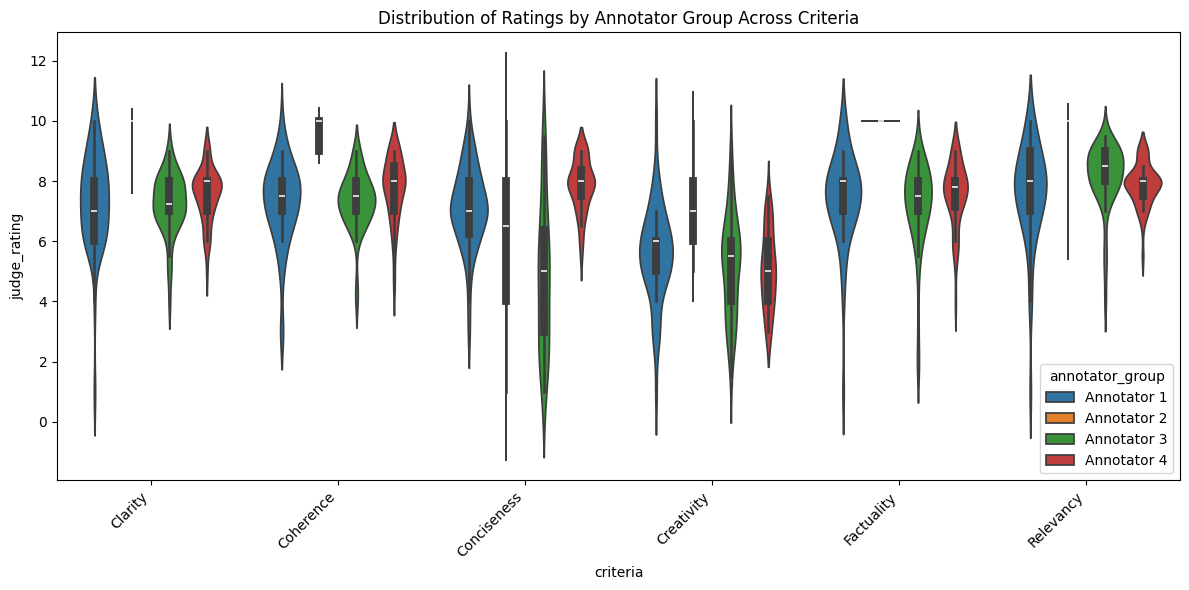

/var/folders/4d/c4bjvqc12m5gv209fjx295j40000gn/T/ipykernel_99696/3047488742.py:17: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  avg_ratings = qa_human_df.pivot_table(


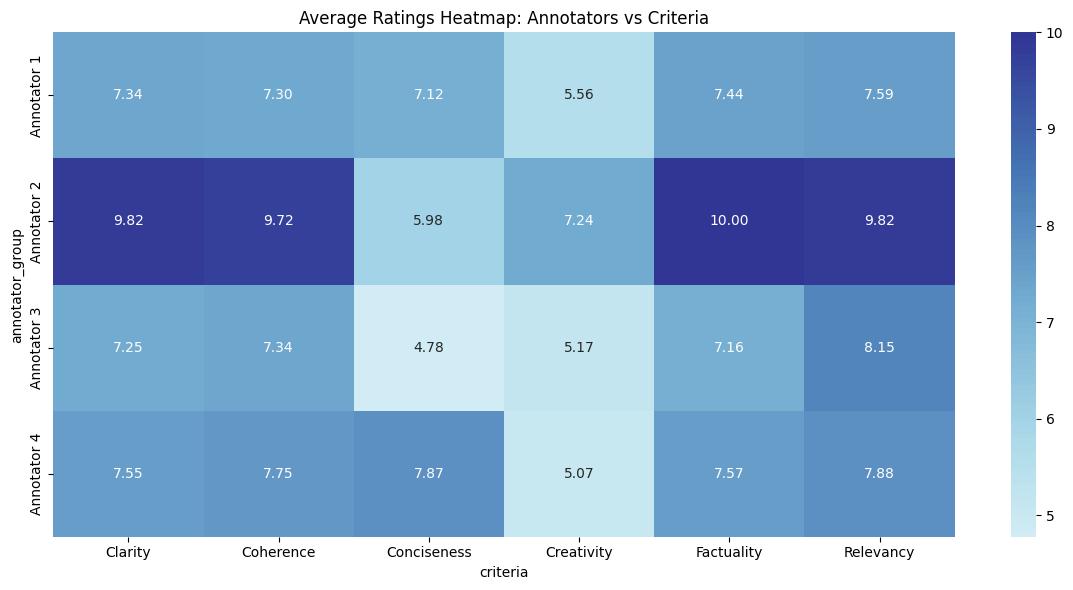

In [41]:
# Calculate average rating by annotator for each criteria
print("\nAverage Rating by Annotator for Each Criteria:")
for criteria in qa_human_df['criteria'].unique():
    print(f"\n{criteria}:")
    criteria_data = qa_human_df[qa_human_df['criteria'] == criteria]
    print(criteria_data.groupby('annotator_group')['judge_rating'].mean().round(3))

# Create a violin plot showing the distribution of ratings by annotator for each criteria
plt.figure(figsize=(12, 6))
sns.violinplot(data=qa_human_df, x='criteria', y='judge_rating', hue='annotator_group')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Ratings by Annotator Group Across Criteria')
plt.tight_layout()
plt.show()

# Create a heatmap showing average ratings by annotator and criteria
avg_ratings = qa_human_df.pivot_table(
    values='judge_rating', 
    index='annotator_group',
    columns='criteria',
    aggfunc='mean'
)

plt.figure(figsize=(12, 6))
sns.heatmap(avg_ratings, annot=True, fmt='.2f', cmap='RdYlBu', center=3)
plt.title('Average Ratings Heatmap: Annotators vs Criteria')
plt.tight_layout()
plt.show()


In [42]:
# Calculate the overall average rating given by each annotator for LM judges
print("\nOverall Average Rating by LM Judge:")
print(qa_lm_df.groupby('judge_model')['judge_rating'].mean().round(3))



Overall Average Rating by LM Judge:
judge_model
anthropic/claude-3.7-sonnet:thinking    8.103
google/gemini-2.0-flash-001             8.334
google/gemma-2-27b-it                   7.818
meta-llama/llama-3.3-70b-instruct       7.973
microsoft/phi-4                         8.073
mistralai/mistral-nemo                  8.048
openai/gpt-3.5-turbo-instruct           9.090
openai/gpt-4o-2024-11-20                8.348
openai/o3-mini                          8.199
qwen/qwen-2.5-72b-instruct              8.243
Name: judge_rating, dtype: float64



Comparison of Self Ratings vs Ratings by Others:
                                      Self Rating  Rating by Others  \
response_model                                                        
anthropic/claude-3.7-sonnet:thinking        8.558             8.482   
google/gemini-2.0-flash-001                 8.393             8.236   
google/gemma-2-27b-it                       7.957             8.376   
meta-llama/llama-3.3-70b-instruct           7.818             8.159   
microsoft/phi-4                             7.958             8.174   
mistralai/mistral-nemo                      8.025             8.171   
openai/gpt-3.5-turbo-instruct               8.820             7.828   
openai/gpt-4o-2024-11-20                    8.527             8.271   
openai/o3-mini                              8.403             8.330   
qwen/qwen-2.5-72b-instruct                  8.185             8.158   

                                      Difference  
response_model                                

<Figure size 1200x600 with 0 Axes>

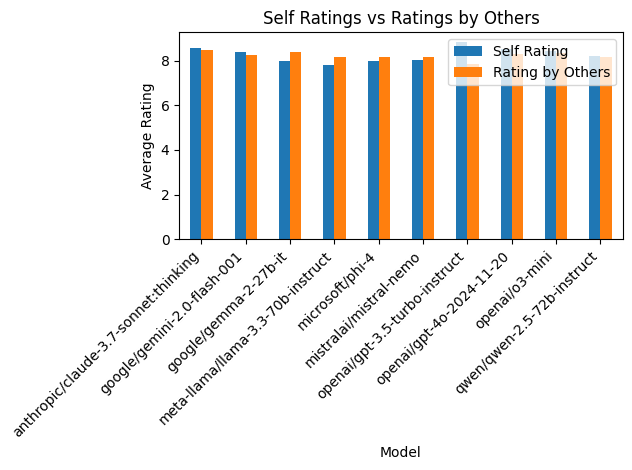

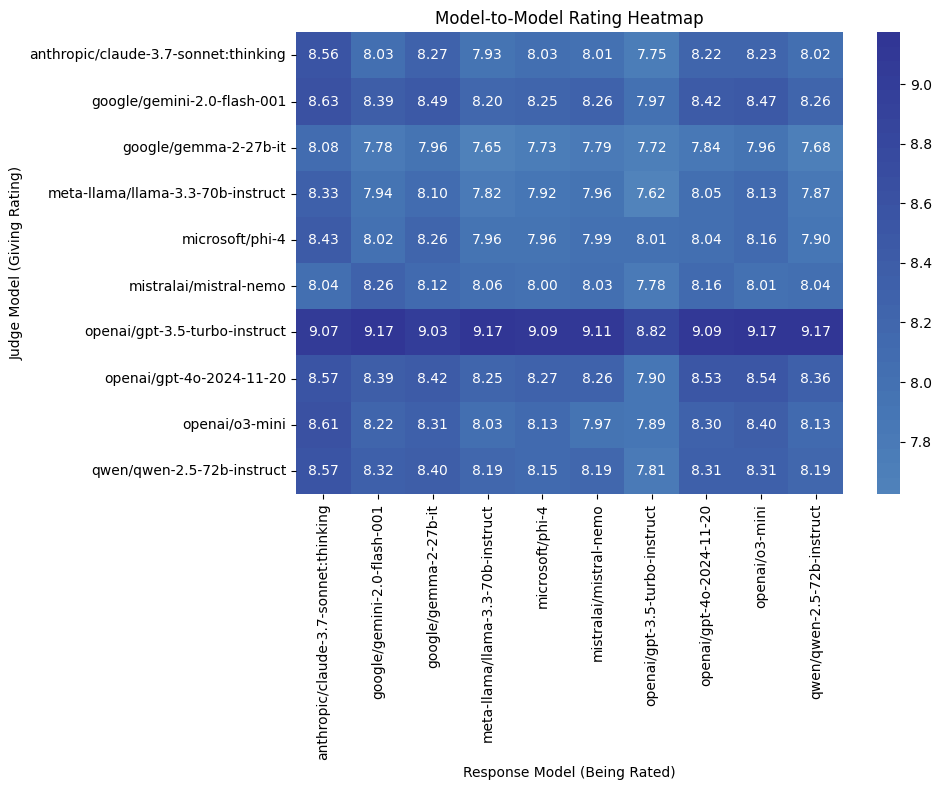

In [43]:
# Create a dataframe for self-ratings (where judge_model == response_model)
self_ratings = qa_lm_df[qa_lm_df['judge_model'] == qa_lm_df['response_model']]
self_avg = self_ratings.groupby('response_model')['judge_rating'].mean()

# Create a dataframe for ratings from other models
other_ratings = qa_lm_df[qa_lm_df['judge_model'] != qa_lm_df['response_model']] 
other_avg = other_ratings.groupby('response_model')['judge_rating'].mean()

# Combine into a comparison dataframe
comparison_df = pd.DataFrame({
    'Self Rating': self_avg,
    'Rating by Others': other_avg
})
comparison_df['Difference'] = comparison_df['Self Rating'] - comparison_df['Rating by Others']

print("\nComparison of Self Ratings vs Ratings by Others:")
print(comparison_df.round(3))

# Visualize the comparison
plt.figure(figsize=(12, 6))
comparison_df[['Self Rating', 'Rating by Others']].plot(kind='bar')
plt.title('Self Ratings vs Ratings by Others')
plt.xlabel('Model')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Create a heatmap showing all model-to-model ratings
model_ratings = qa_lm_df.pivot_table(
    values='judge_rating',
    index='judge_model',
    columns='response_model',
    aggfunc='mean'
)

plt.figure(figsize=(10, 8))
sns.heatmap(model_ratings, annot=True, fmt='.2f', cmap='RdYlBu', center=3)
plt.title('Model-to-Model Rating Heatmap')
plt.xlabel('Response Model (Being Rated)')
plt.ylabel('Judge Model (Giving Rating)')
plt.tight_layout()
plt.show()


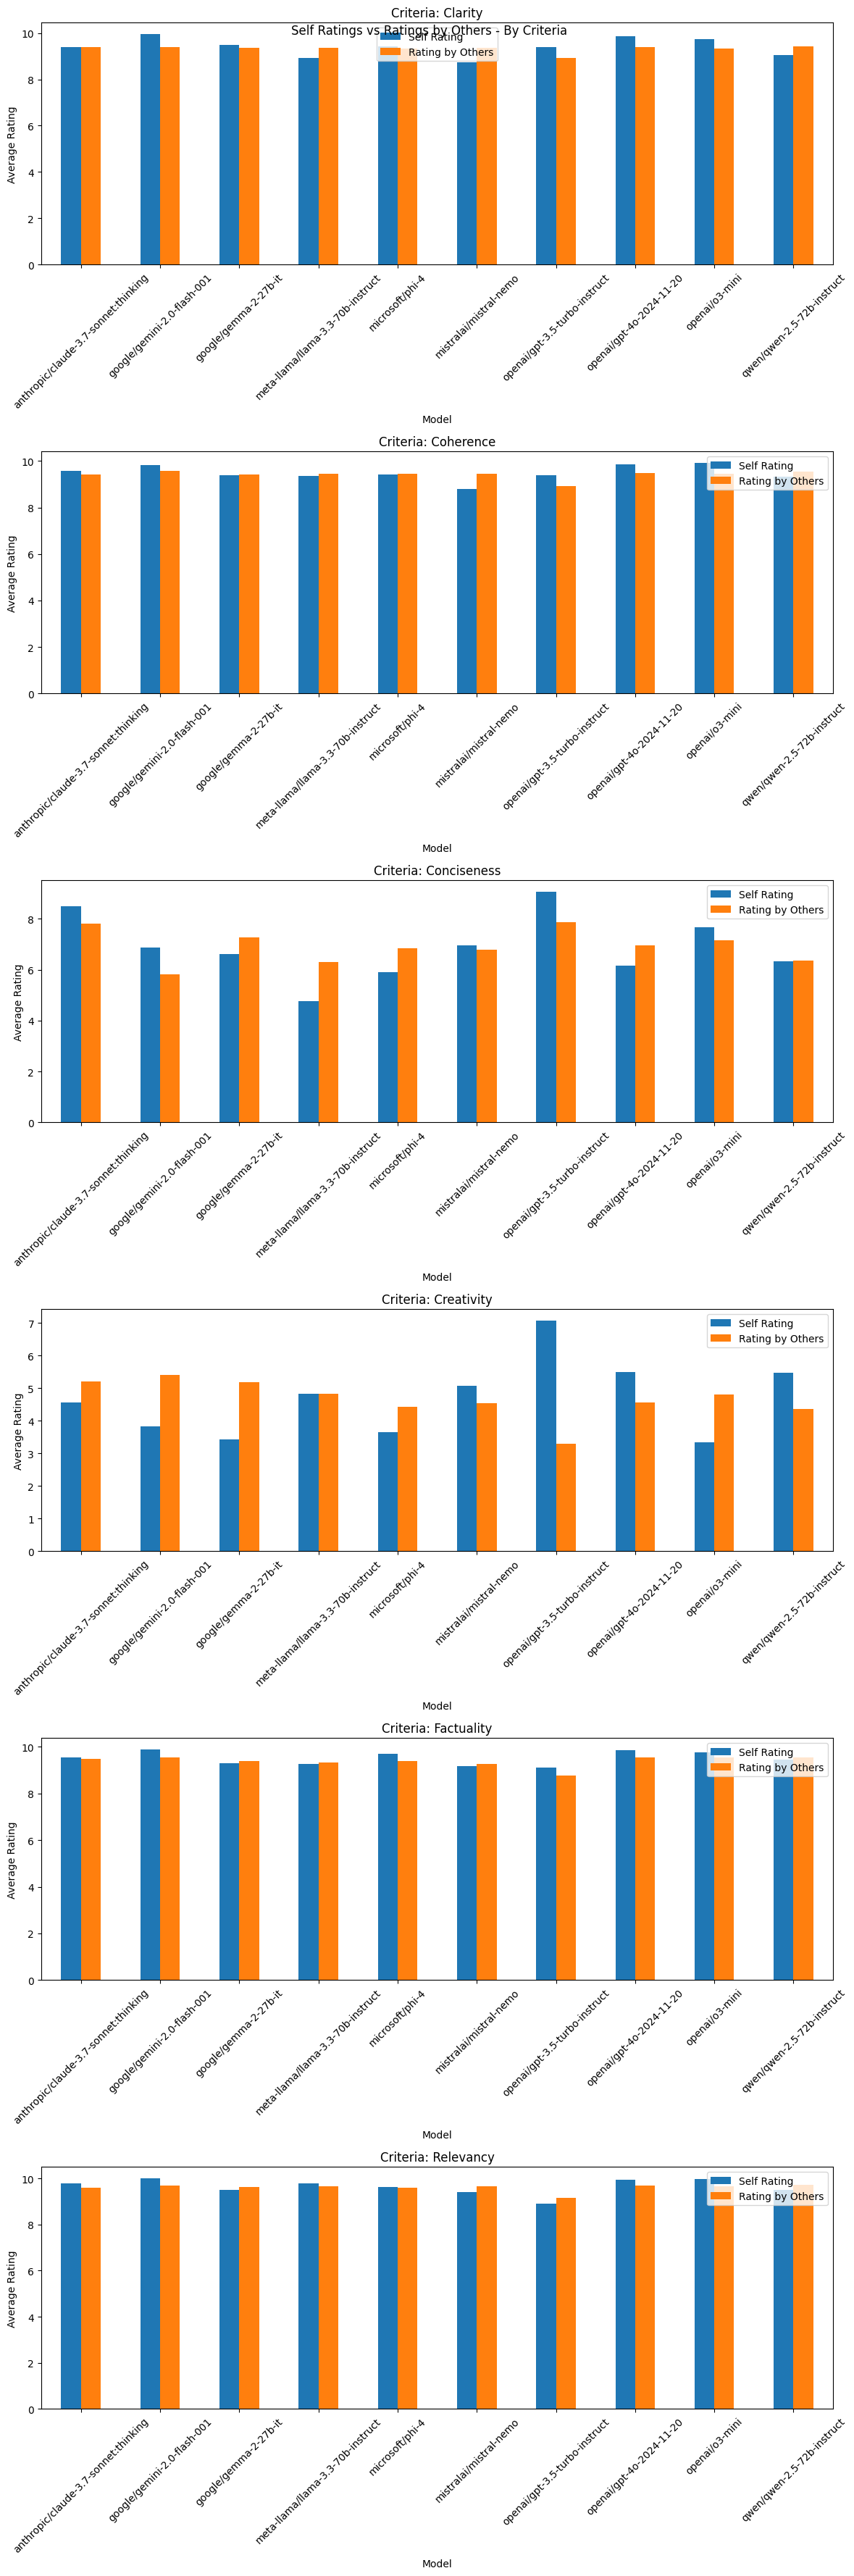


Detailed Comparison by Criteria:

Criteria: Clarity
                                      Self Rating  Rating by Others Criteria  \
response_model                                                                 
anthropic/claude-3.7-sonnet:thinking        9.382             9.386  Clarity   
google/gemini-2.0-flash-001                 9.950             9.396  Clarity   
google/gemma-2-27b-it                       9.490             9.367  Clarity   
meta-llama/llama-3.3-70b-instruct           8.920             9.375  Clarity   
microsoft/phi-4                             9.420             9.318  Clarity   
mistralai/mistral-nemo                      8.750             9.348  Clarity   
openai/gpt-3.5-turbo-instruct               9.390             8.927  Clarity   
openai/gpt-4o-2024-11-20                    9.856             9.387  Clarity   
openai/o3-mini                              9.750             9.330  Clarity   
qwen/qwen-2.5-72b-instruct                  9.046             9.428

In [44]:
# Create comparison by criteria
criteria_comparisons = []

for criteria_name in qa_lm_df['criteria'].unique():
    # Filter for this criteria
    criteria_data = qa_lm_df[qa_lm_df['criteria'] == criteria_name]
    
    # Get self ratings
    self_ratings = criteria_data[criteria_data['judge_model'] == criteria_data['response_model']]
    self_avg = self_ratings.groupby('response_model')['judge_rating'].mean()
    
    # Get ratings from others
    other_ratings = criteria_data[criteria_data['judge_model'] != criteria_data['response_model']]
    other_avg = other_ratings.groupby('response_model')['judge_rating'].mean()
    
    # Combine into comparison df
    comparison = pd.DataFrame({
        'Self Rating': self_avg,
        'Rating by Others': other_avg,
        'Criteria': criteria_name
    })
    comparison['Difference'] = comparison['Self Rating'] - comparison['Rating by Others']
    
    criteria_comparisons.append(comparison)

# Combine all criteria comparisons
all_criteria_comparisons = pd.concat(criteria_comparisons)

# Create subplot for each criteria
criteria_count = len(qa_lm_df['criteria'].unique())
fig, axes = plt.subplots(criteria_count, 1, figsize=(12, 6*criteria_count))
fig.suptitle('Self Ratings vs Ratings by Others - By Criteria')

for i, (criteria_name, data) in enumerate(all_criteria_comparisons.groupby('Criteria')):
    data[['Self Rating', 'Rating by Others']].plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Criteria: {criteria_name}')
    axes[i].set_xlabel('Model')
    axes[i].set_ylabel('Average Rating')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend()

plt.tight_layout()
plt.show()

# Print detailed comparison for each criteria
print("\nDetailed Comparison by Criteria:")
for criteria_name, data in all_criteria_comparisons.groupby('Criteria'):
    print(f"\nCriteria: {criteria_name}")
    print(data.round(3))



Overall correlation between reasoning length and rating: 0.051

Correlation by judge model:
judge_model
anthropic/claude-3.7-sonnet:thinking    0.042
google/gemini-2.0-flash-001             0.122
google/gemma-2-27b-it                   0.400
meta-llama/llama-3.3-70b-instruct       0.326
microsoft/phi-4                         0.282
mistralai/mistral-nemo                  0.401
openai/gpt-3.5-turbo-instruct          -0.124
openai/gpt-4o-2024-11-20                0.132
openai/o3-mini                          0.138
qwen/qwen-2.5-72b-instruct              0.240
dtype: float64


/var/folders/4d/c4bjvqc12m5gv209fjx295j40000gn/T/ipykernel_99696/3112130293.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  judge_corrs = qa_lm_df.groupby('judge_model').apply(


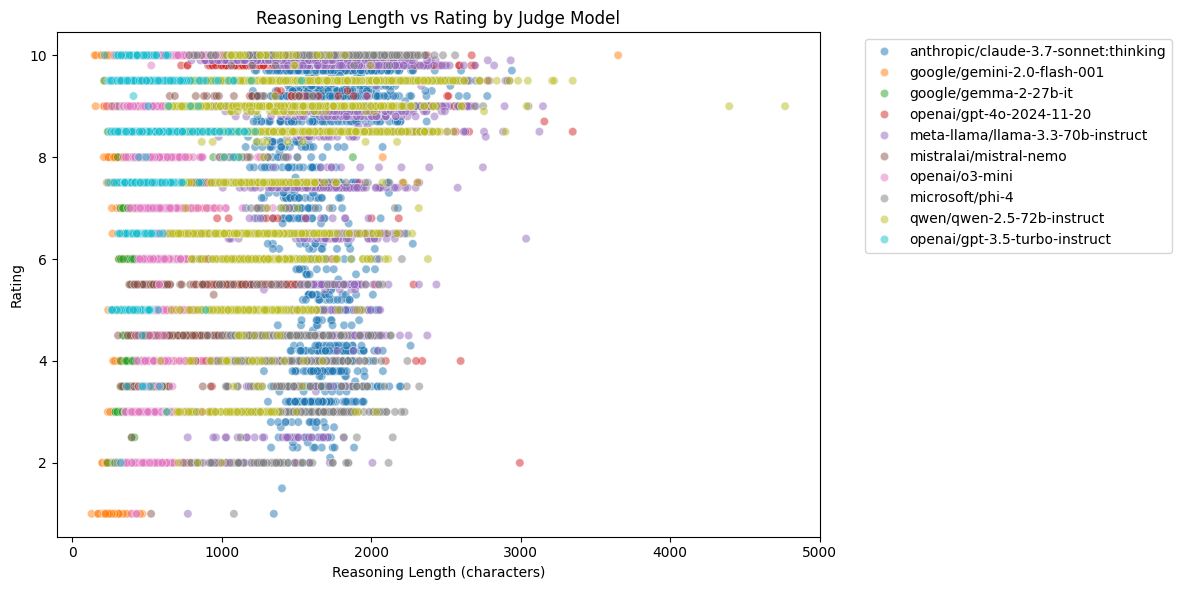

In [45]:
# Calculate correlation between reasoning length and rating
qa_lm_df['reasoning_length'] = qa_lm_df['judge_reasoning'].str.len()

# Overall correlation
overall_corr = qa_lm_df['reasoning_length'].corr(qa_lm_df['judge_rating'])
print("\nOverall correlation between reasoning length and rating:", round(overall_corr, 3))

# Per-judge correlation
judge_corrs = qa_lm_df.groupby('judge_model').apply(
    lambda x: x['reasoning_length'].corr(x['judge_rating'])
).round(3)

print("\nCorrelation by judge model:")
print(judge_corrs)

# Visualize with scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=qa_lm_df, x='reasoning_length', y='judge_rating', hue='judge_model', alpha=0.5)
plt.title('Reasoning Length vs Rating by Judge Model')
plt.xlabel('Reasoning Length (characters)')
plt.ylabel('Rating')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# TODO: How does length of reasoning correlate with rating?
# TODO: How does length of generation correlate with rating?


Overall correlation between response length and rating: -0.01

Correlation by judge model:
judge_model
anthropic/claude-3.7-sonnet:thinking   -0.029
google/gemini-2.0-flash-001            -0.002
google/gemma-2-27b-it                  -0.025
meta-llama/llama-3.3-70b-instruct      -0.027
microsoft/phi-4                        -0.050
mistralai/mistral-nemo                  0.053
openai/gpt-3.5-turbo-instruct           0.062
openai/gpt-4o-2024-11-20                0.001
openai/o3-mini                         -0.026
qwen/qwen-2.5-72b-instruct              0.011
dtype: float64


/var/folders/4d/c4bjvqc12m5gv209fjx295j40000gn/T/ipykernel_99696/1097598146.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  judge_resp_corrs = qa_lm_df.groupby('judge_model').apply(


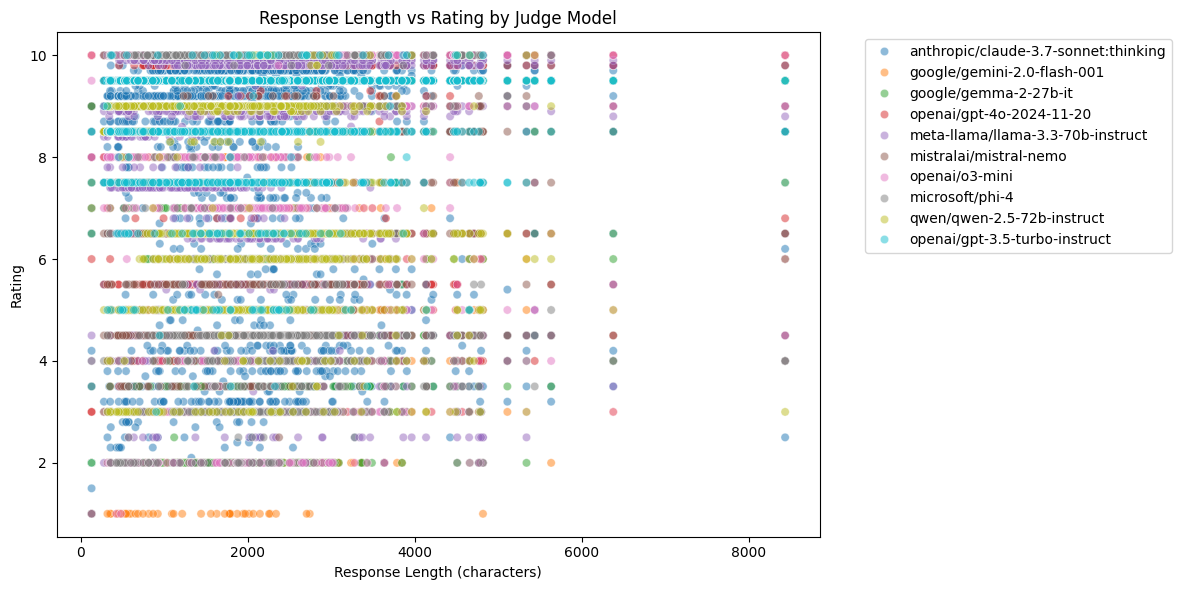

In [46]:
# Calculate correlation between response length and rating
qa_lm_df['response_length'] = qa_lm_df['response'].str.len()

# Overall correlation
overall_resp_corr = qa_lm_df['response_length'].corr(qa_lm_df['judge_rating'])
print("\nOverall correlation between response length and rating:", round(overall_resp_corr, 3))

# Per-judge correlation
judge_resp_corrs = qa_lm_df.groupby('judge_model').apply(
    lambda x: x['response_length'].corr(x['judge_rating'])
).round(3)

print("\nCorrelation by judge model:")
print(judge_resp_corrs)

# Visualize with scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=qa_lm_df, x='response_length', y='judge_rating', hue='judge_model', alpha=0.5)
plt.title('Response Length vs Rating by Judge Model')
plt.xlabel('Response Length (characters)')
plt.ylabel('Rating')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


/var/folders/4d/c4bjvqc12m5gv209fjx295j40000gn/T/ipykernel_99696/1971440999.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  judge_corrs = criteria_data.groupby('judge_model').apply(
/var/folders/4d/c4bjvqc12m5gv209fjx295j40000gn/T/ipykernel_99696/1971440999.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  judge_corrs = criteria_data.groupby('judge_model').apply(
/var/folders/4d/c4bjvqc12m5gv209fjx2


=== Relevancy ===
Overall correlation: 0.166

By judge model:
judge_model
anthropic/claude-3.7-sonnet:thinking    0.205
google/gemini-2.0-flash-001             0.158
google/gemma-2-27b-it                   0.071
meta-llama/llama-3.3-70b-instruct       0.275
microsoft/phi-4                         0.156
mistralai/mistral-nemo                  0.111
openai/gpt-3.5-turbo-instruct           0.170
openai/gpt-4o-2024-11-20                0.183
openai/o3-mini                          0.200
qwen/qwen-2.5-72b-instruct              0.294
dtype: float64

=== Factuality ===
Overall correlation: 0.132

By judge model:
judge_model
anthropic/claude-3.7-sonnet:thinking    0.246
google/gemini-2.0-flash-001             0.027
google/gemma-2-27b-it                  -0.104
meta-llama/llama-3.3-70b-instruct       0.226
microsoft/phi-4                         0.063
mistralai/mistral-nemo                  0.110
openai/gpt-3.5-turbo-instruct           0.140
openai/gpt-4o-2024-11-20                0.169
openai

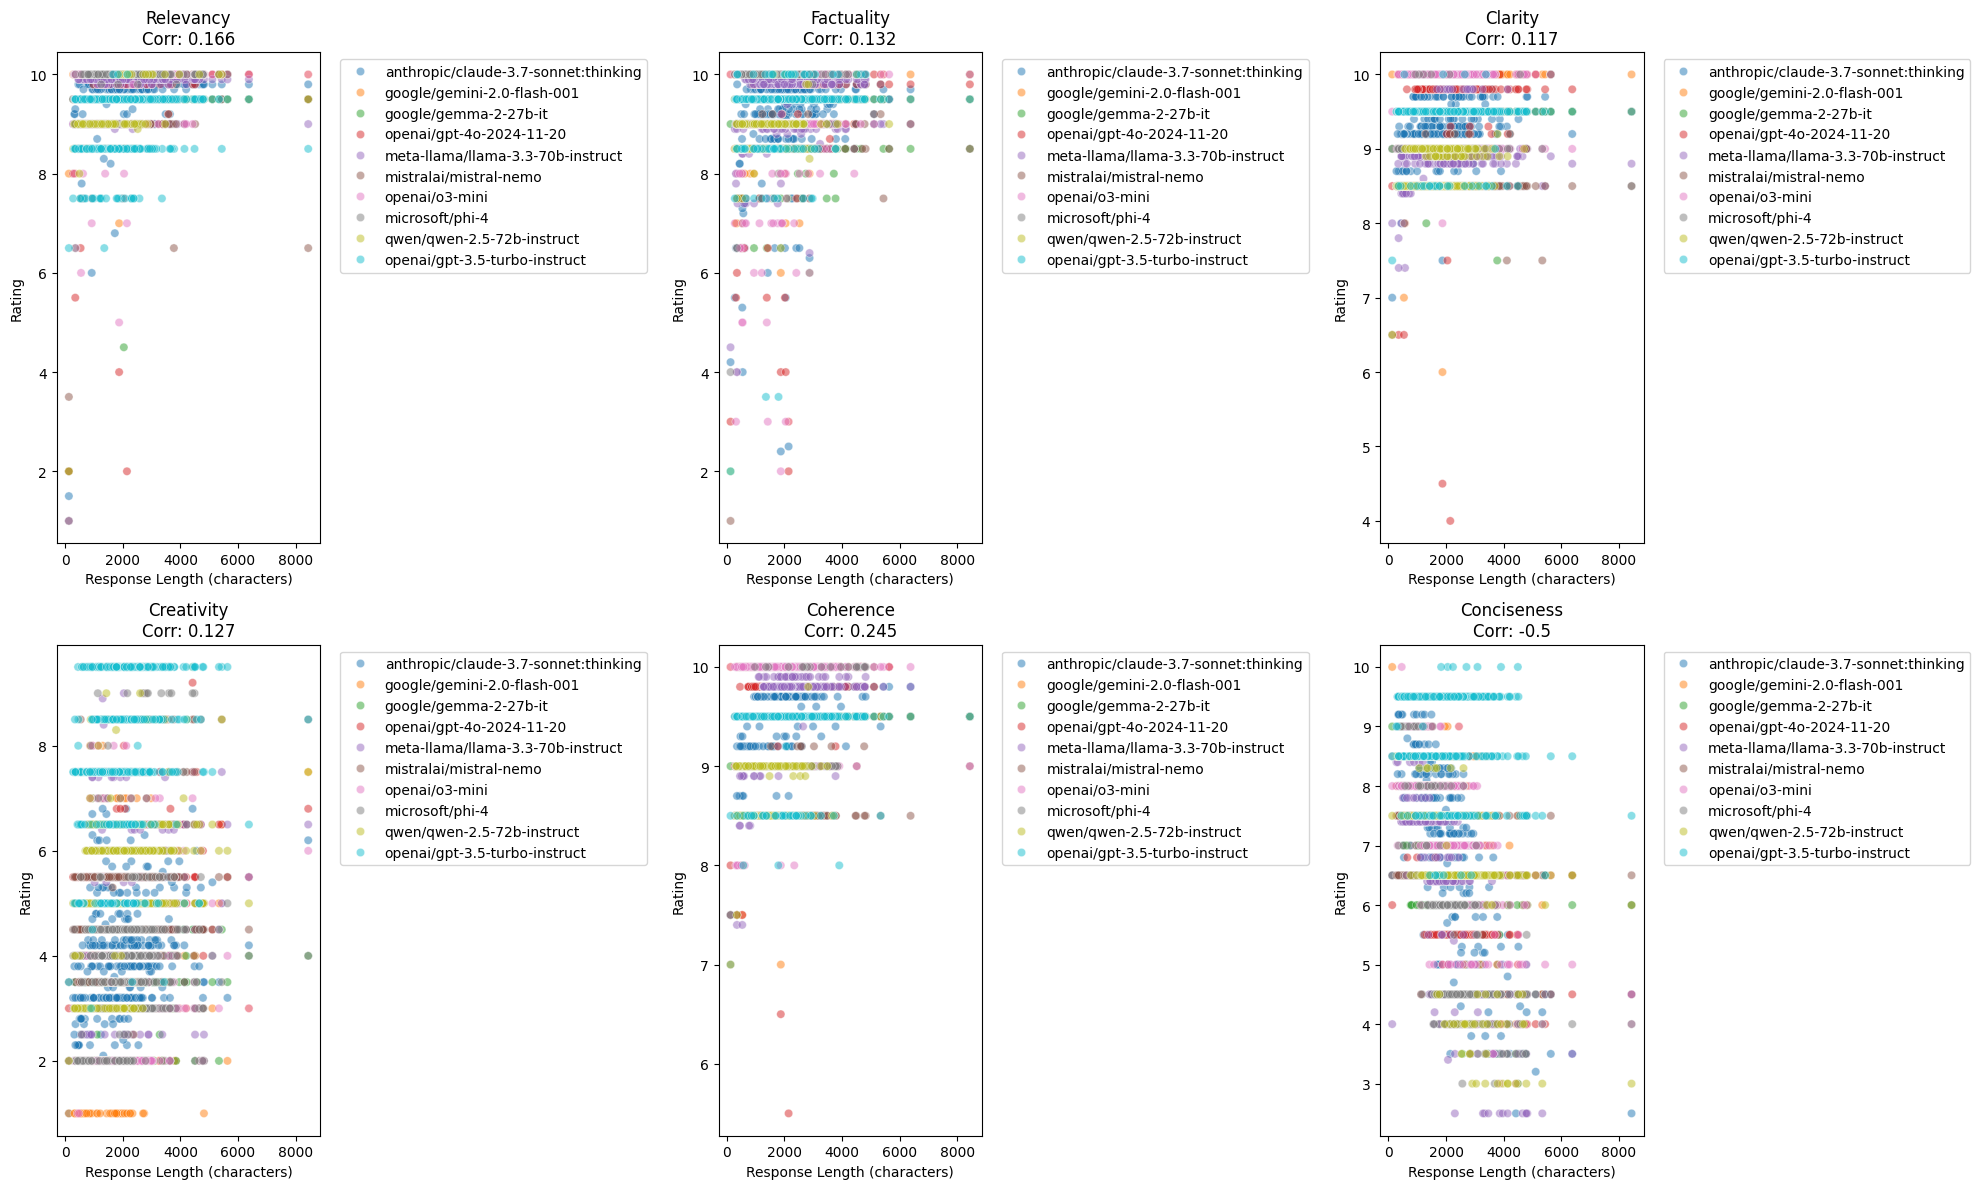

In [47]:
# Calculate correlations between response length and ratings per criteria
criteria_correlations = {}
for criteria in qa_lm_df['criteria'].unique():
    criteria_data = qa_lm_df[qa_lm_df['criteria'] == criteria]
    
    # Overall correlation for this criteria
    overall_corr = criteria_data['response_length'].corr(criteria_data['judge_rating'])
    
    # Per-judge correlations for this criteria
    judge_corrs = criteria_data.groupby('judge_model').apply(
        lambda x: x['response_length'].corr(x['judge_rating'])
    ).round(3)
    
    criteria_correlations[criteria] = {
        'overall': round(overall_corr, 3),
        'by_judge': judge_corrs
    }

# Print results
for criteria, corrs in criteria_correlations.items():
    print(f"\n=== {criteria} ===")
    print(f"Overall correlation: {corrs['overall']}")
    print("\nBy judge model:")
    print(corrs['by_judge'])

# Visualize with faceted scatter plots
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for i, criteria in enumerate(qa_lm_df['criteria'].unique()):
    criteria_data = qa_lm_df[qa_lm_df['criteria'] == criteria]
    
    sns.scatterplot(
        data=criteria_data,
        x='response_length',
        y='judge_rating',
        hue='judge_model',
        alpha=0.5,
        ax=axes[i]
    )
    
    axes[i].set_title(f'{criteria}\nCorr: {criteria_correlations[criteria]["overall"]}')
    axes[i].set_xlabel('Response Length (characters)')
    axes[i].set_ylabel('Rating')
    axes[i].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
# TODO: Find cases where the humans and (averaged) models maximally disagreed?
# Or maybe just treat every response-judgement as its own thing and find maximal disagreemtns.
# can be averaged or per criteria

In [8]:
# Average scores received by each response model for each criteria
response_models = qa_lm_df['response_model'].unique()

for response_model in response_models:
    model_scores = qa_lm_df[qa_lm_df['response_model'] == response_model].groupby('criteria')['judge_rating'].mean().round(2)
    
    print(f"\nAverage scores received by {response_model} for each criteria:")
    print(model_scores)



Average scores received by anthropic/claude-3.7-sonnet:thinking for each criteria:
criteria
Clarity        9.39
Coherence      9.43
Conciseness    7.89
Creativity     5.14
Factuality     9.48
Relevancy      9.61
Name: judge_rating, dtype: float64

Average scores received by meta-llama/llama-3.3-70b-instruct for each criteria:
criteria
Clarity        9.33
Coherence      9.45
Conciseness    6.15
Creativity     4.83
Factuality     9.33
Relevancy      9.66
Name: judge_rating, dtype: float64

Average scores received by openai/o3-mini for each criteria:
criteria
Clarity        9.37
Coherence      9.51
Conciseness    7.20
Creativity     4.67
Factuality     9.58
Relevancy      9.70
Name: judge_rating, dtype: float64

Average scores received by microsoft/phi-4 for each criteria:
criteria
Clarity        9.33
Coherence      9.44
Conciseness    6.76
Creativity     4.35
Factuality     9.43
Relevancy      9.60
Name: judge_rating, dtype: float64

Average scores received by mistralai/mistral-nemo for


Overall correlations between model and human ratings:
anthropic/claude-3.7-sonnet:thinking: 0.54
google/gemini-2.0-flash-001: 0.48
google/gemma-2-27b-it: 0.514
openai/gpt-4o-2024-11-20: 0.532
meta-llama/llama-3.3-70b-instruct: 0.541
mistralai/mistral-nemo: 0.499
openai/o3-mini: 0.506
microsoft/phi-4: 0.517
qwen/qwen-2.5-72b-instruct: 0.518
openai/gpt-3.5-turbo-instruct: 0.274


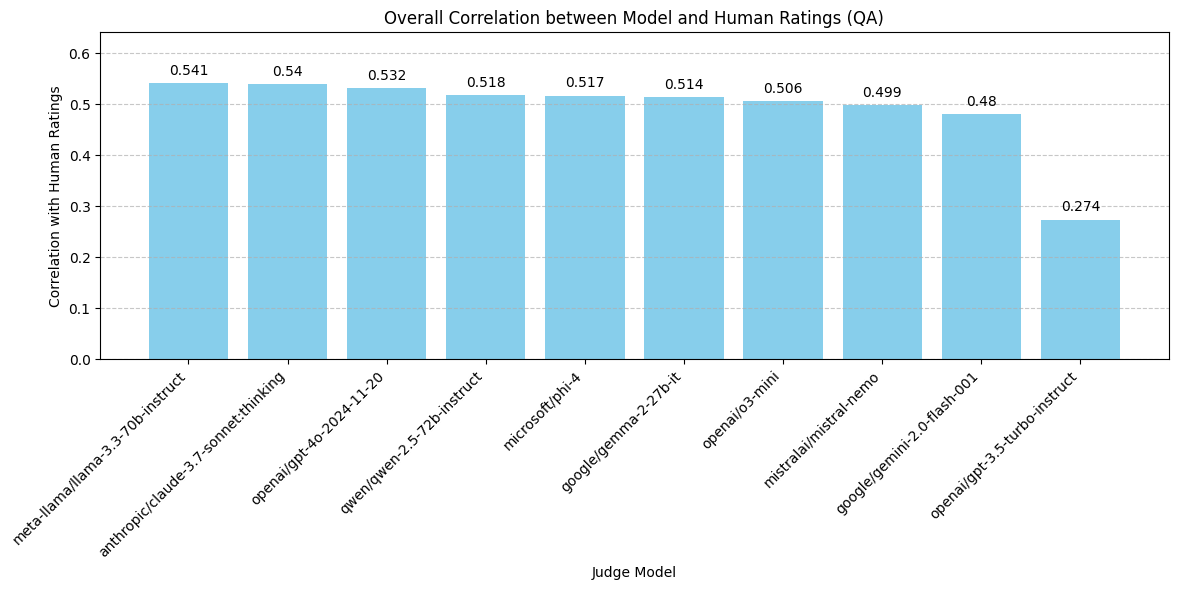

In [12]:
# Calculate overall correlation between each model and human annotators
model_human_corrs = {}

# Get unique judge models that aren't human annotators
judge_models = qa_combo_filtered_df[qa_combo_filtered_df['judge_model'] != 'human']['judge_model'].unique()

for judge_model in judge_models:
    model_data = qa_combo_filtered_df[qa_combo_filtered_df['judge_model'] == judge_model]
    human_data = qa_combo_filtered_df[qa_combo_filtered_df['judge_model'] == 'human']
    
    # Get average ratings for each question/response/criteria combination
    # This ensures we're comparing the same responses
    model_ratings = model_data.groupby(['question_id', 'response_id', 'criteria'])['judge_rating'].mean()
    human_ratings = human_data.groupby(['question_id', 'response_id', 'criteria'])['judge_rating'].mean()
    
    # Align the indices and drop any rows that don't appear in both datasets
    aligned_data = pd.DataFrame({'model': model_ratings, 'human': human_ratings}).dropna()
    
    # Calculate correlation only if we have matching data points
    if len(aligned_data) > 0:
        corr = aligned_data['model'].corr(aligned_data['human'])
        model_human_corrs[judge_model] = round(corr, 3)
    else:
        model_human_corrs[judge_model] = float('nan')

print("\nOverall correlations between model and human ratings:")
for model, corr in model_human_corrs.items():
    print(f"{model}: {corr}")

# Create a bar plot of the correlations between model and human ratings
plt.figure(figsize=(12, 6))
models = list(model_human_corrs.keys())
correlations = list(model_human_corrs.values())

# Sort by correlation value in descending order
sorted_indices = np.argsort(correlations)[::-1]  # Reverse to get descending order
sorted_models = [models[i] for i in sorted_indices]
sorted_correlations = [correlations[i] for i in sorted_indices]

# Create the bar plot
bars = plt.bar(sorted_models, sorted_correlations, color='skyblue')

# Add correlation values on top of bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{sorted_correlations[i]}',
             ha='center', va='bottom', fontsize=10)

plt.xlabel('Judge Model')
plt.ylabel('Correlation with Human Ratings')
plt.title('Overall Correlation between Model and Human Ratings (QA)')
plt.ylim(0, max(correlations) + 0.1)  # Add some space for the text
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [8]:
# Calculate correlations between each model and human annotators per criteria
model_human_corrs_by_criteria = {}

# Get unique judge models that aren't human annotators
judge_models = qa_combo_filtered_df[qa_combo_filtered_df['judge_model'] != 'human']['judge_model'].unique()
criteria_list = qa_combo_filtered_df['criteria'].unique()

for judge_model in judge_models:
    model_human_corrs_by_criteria[judge_model] = {}
    
    for criteria in criteria_list:
        # Filter data for current model and criteria
        model_data = qa_combo_filtered_df[
            (qa_combo_filtered_df['judge_model'] == judge_model) & 
            (qa_combo_filtered_df['criteria'] == criteria)
        ]
        human_data = qa_combo_filtered_df[
            (qa_combo_filtered_df['judge_model'] == 'human') & 
            (qa_combo_filtered_df['criteria'] == criteria)
        ]
        
        # Get average ratings for each question/response combination
        model_ratings = model_data.groupby(['question_id', 'response_id'])['judge_rating'].mean()
        human_ratings = human_data.groupby(['question_id', 'response_id'])['judge_rating'].mean()
        
        # Align the indices and drop any rows that don't appear in both datasets
        aligned_data = pd.DataFrame({'model': model_ratings, 'human': human_ratings}).dropna()
        
        # Calculate correlation only if we have matching data points
        if len(aligned_data) > 0:
            corr = aligned_data['model'].corr(aligned_data['human'])
            model_human_corrs_by_criteria[judge_model][criteria] = round(corr, 3)
        else:
            model_human_corrs_by_criteria[judge_model][criteria] = float('nan')

print("\nCorrelations between model and human ratings by criteria:")
for model in model_human_corrs_by_criteria:
    print(f"\n{model}:")
    for criteria, corr in model_human_corrs_by_criteria[model].items():
        print(f"  {criteria}: {corr}")



Correlations between model and human ratings by criteria:

anthropic/claude-3.7-sonnet:thinking:
  Relevancy: 0.299
  Factuality: 0.357
  Clarity: 0.212
  Creativity: 0.172
  Coherence: 0.192
  Conciseness: 0.272

google/gemini-2.0-flash-001:
  Relevancy: 0.26
  Factuality: -0.013
  Clarity: 0.168
  Creativity: 0.079
  Coherence: 0.005
  Conciseness: 0.221

google/gemma-2-27b-it:
  Relevancy: 0.316
  Factuality: -0.045
  Clarity: 0.13
  Creativity: 0.163
  Coherence: 0.131
  Conciseness: 0.277

openai/gpt-4o-2024-11-20:
  Relevancy: 0.329
  Factuality: 0.241
  Clarity: 0.256
  Creativity: 0.062
  Coherence: 0.288
  Conciseness: 0.239

meta-llama/llama-3.3-70b-instruct:
  Relevancy: 0.383
  Factuality: 0.296
  Clarity: 0.164
  Creativity: 0.054
  Coherence: 0.211
  Conciseness: 0.309

mistralai/mistral-nemo:
  Relevancy: 0.243
  Factuality: 0.309
  Clarity: 0.082
  Creativity: 0.089
  Coherence: 0.067
  Conciseness: 0.072

openai/o3-mini:
  Relevancy: 0.359
  Factuality: 0.082
  Clarit